In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [44]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0
    
    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    #print(x.shape)
    y = y.reshape((batch_size, -1))

    return (x, y)
tmp=generateData()

(5, 10000)


In [45]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])


In [48]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [51]:
# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [52]:
# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat(1, [current_input, current_state])  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
current_state = next_state

TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 1.07125


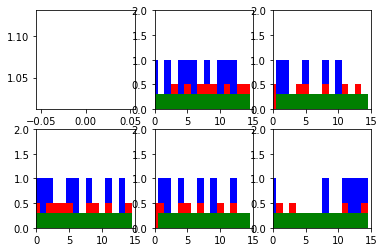

Step 100 Loss 0.693241


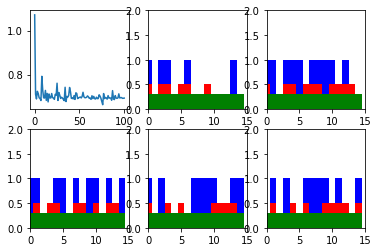

Step 200 Loss 0.36993


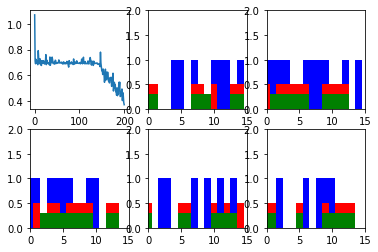

Step 300 Loss 0.0164067


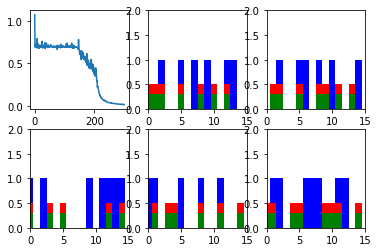

Step 400 Loss 0.00814864


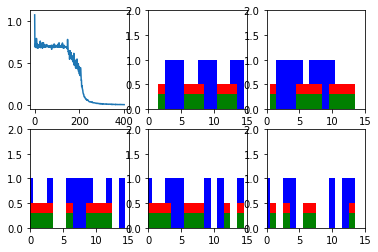

Step 500 Loss 0.0049567


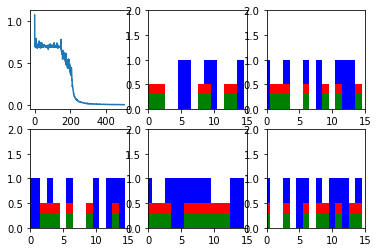

Step 600 Loss 0.00410617


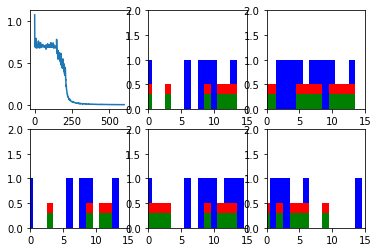

New data, epoch 1
Step 0 Loss 0.12148


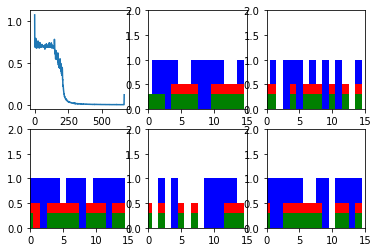

Step 100 Loss 0.0059931


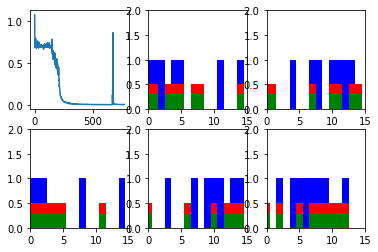

Step 200 Loss 0.00348456


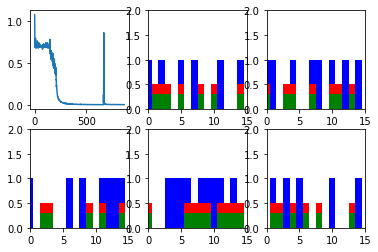

Step 300 Loss 0.00271249


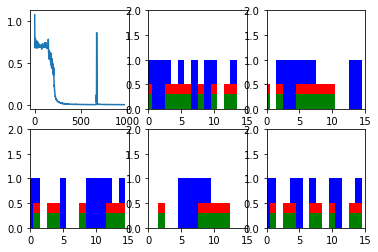

Step 400 Loss 0.00223826


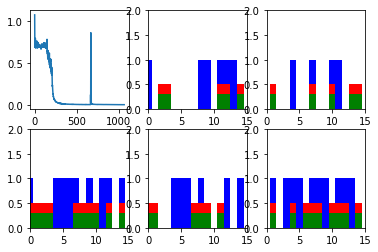

Step 500 Loss 0.00226034


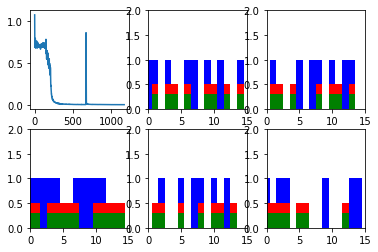

Step 600 Loss 0.00186489


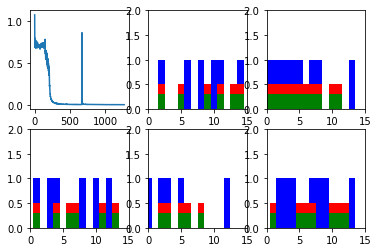

New data, epoch 2
Step 0 Loss 0.187685


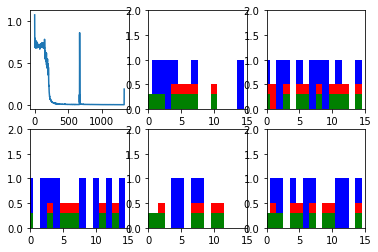

Step 100 Loss 0.00133134


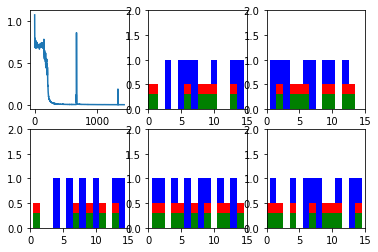

Step 200 Loss 0.00127057


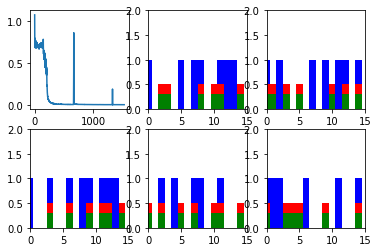

Step 300 Loss 0.00143714


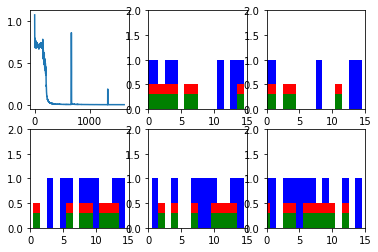

Step 400 Loss 0.00111574


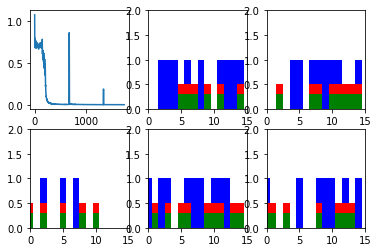

Step 500 Loss 0.00100028


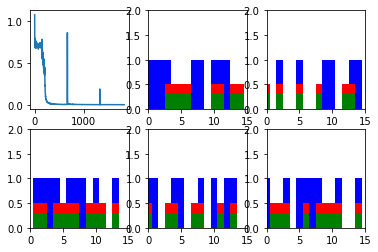

Step 600 Loss 0.0008697


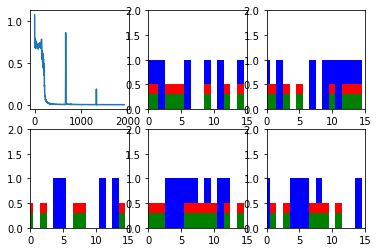

New data, epoch 3
Step 0 Loss 0.166001


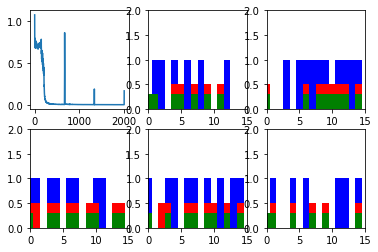

Step 100 Loss 0.000912137


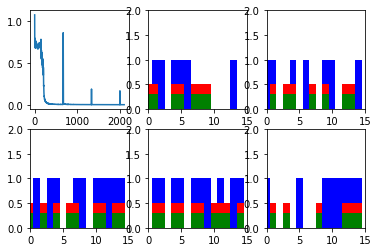

Step 200 Loss 0.000867449


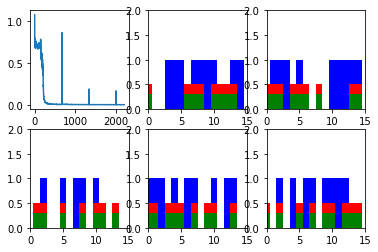

Step 300 Loss 0.000833183


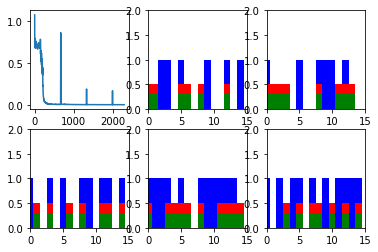

Step 400 Loss 0.00069551


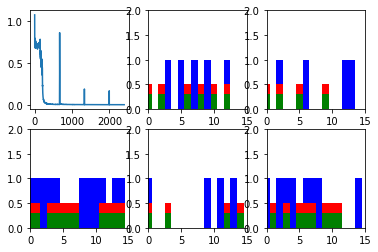

Step 500 Loss 0.000741409


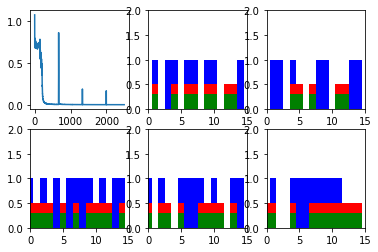

Step 600 Loss 0.000546224


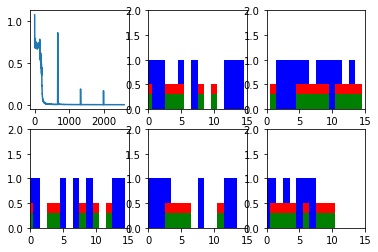

New data, epoch 4
Step 0 Loss 0.139698


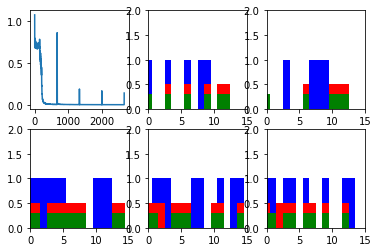

Step 100 Loss 0.000685644


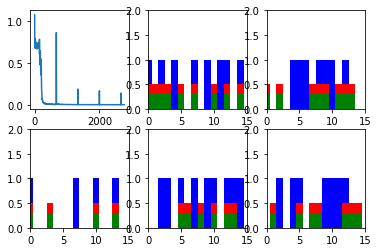

Step 200 Loss 0.000574397


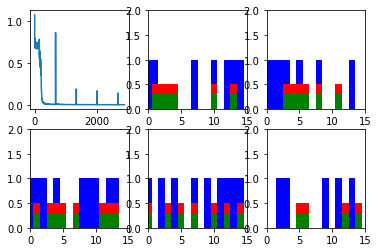

Step 300 Loss 0.000578429


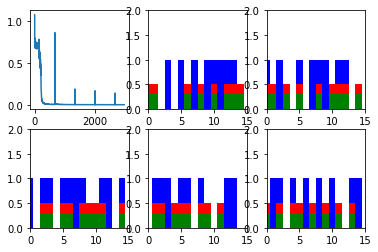

Step 400 Loss 0.000498919


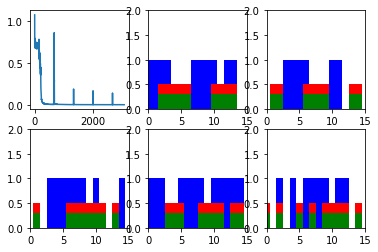

Step 500 Loss 0.000595561


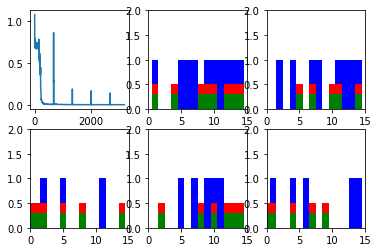

Step 600 Loss 0.000482958


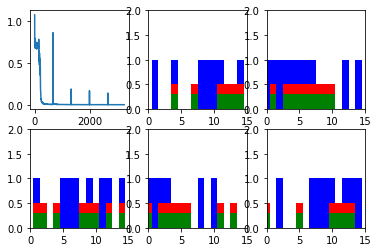

New data, epoch 5
Step 0 Loss 0.203901


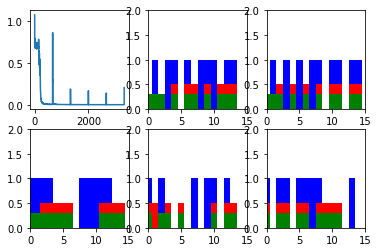

Step 100 Loss 0.000481904


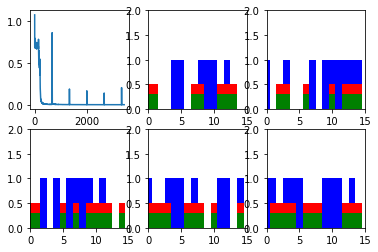

Step 200 Loss 0.000448492


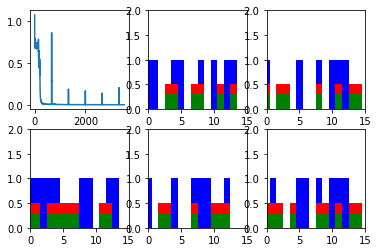

Step 300 Loss 0.000412147


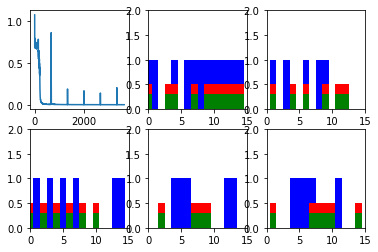

Step 400 Loss 0.000524883


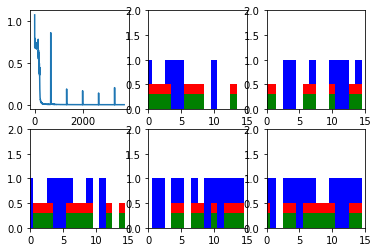

Step 500 Loss 0.000414415


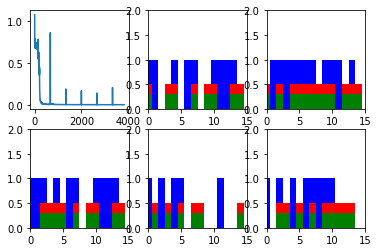

Step 600 Loss 0.000438884


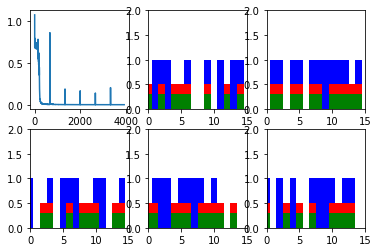

New data, epoch 6
Step 0 Loss 0.155198


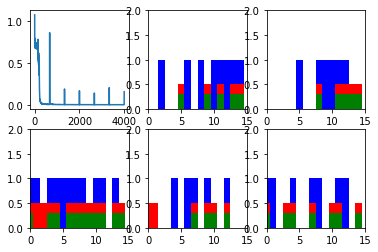

Step 100 Loss 0.000383026


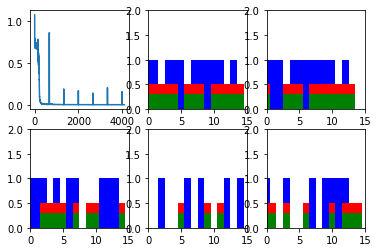

Step 200 Loss 0.000430898


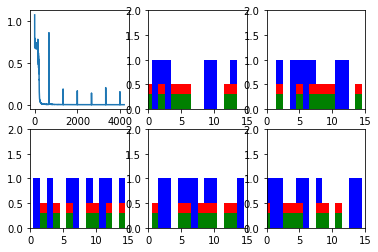

Step 300 Loss 0.000364003


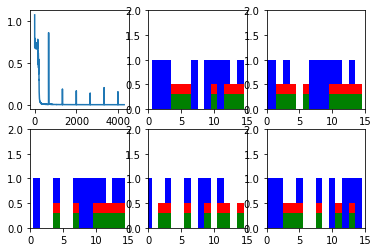

Step 400 Loss 0.000406275


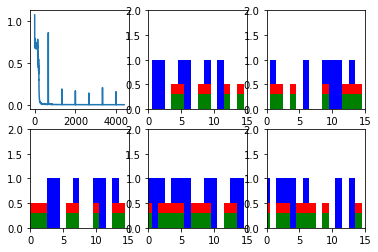

Step 500 Loss 0.000395748


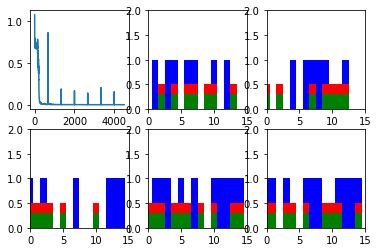

Step 600 Loss 0.000358205


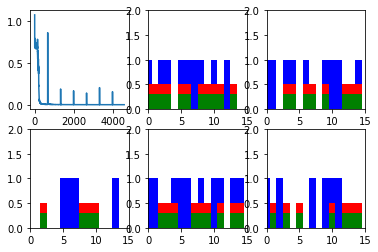

New data, epoch 7
Step 0 Loss 0.18041


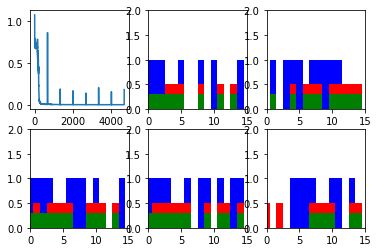

Step 100 Loss 0.000331059


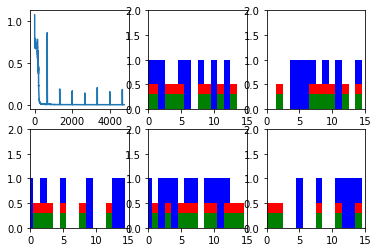

Step 200 Loss 0.000314816


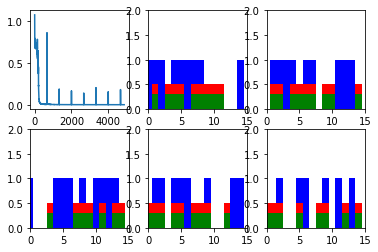

Step 300 Loss 0.000339814


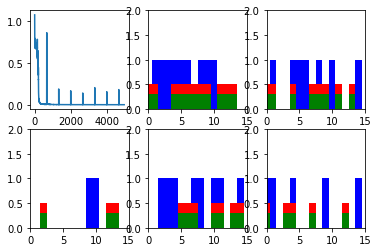

Step 400 Loss 0.000353175


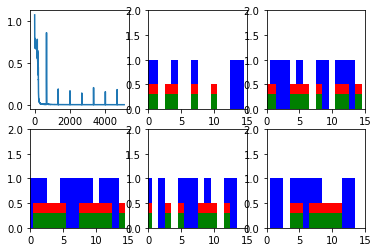

Step 500 Loss 0.000318253


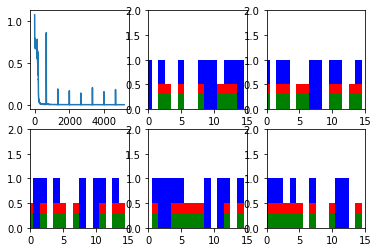

Step 600 Loss 0.000365742


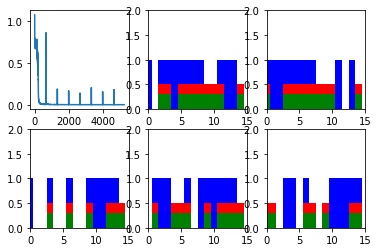

New data, epoch 8
Step 0 Loss 0.219404


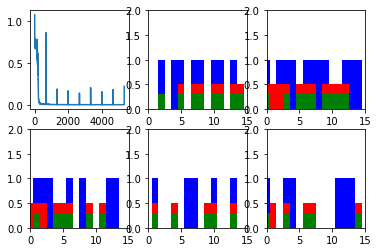

Step 100 Loss 0.00027422


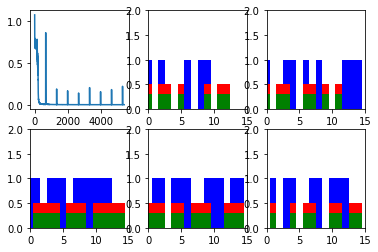

Step 200 Loss 0.00035519


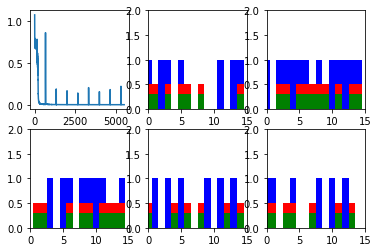

Step 300 Loss 0.000284643


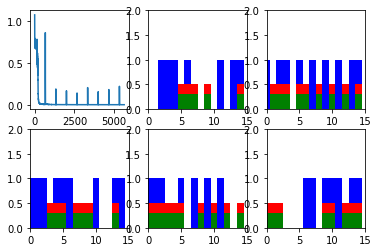

Step 400 Loss 0.000295539


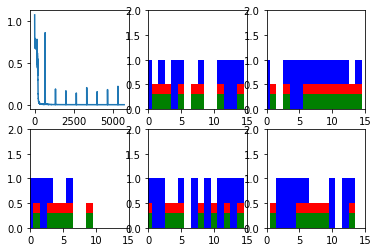

Step 500 Loss 0.000286519


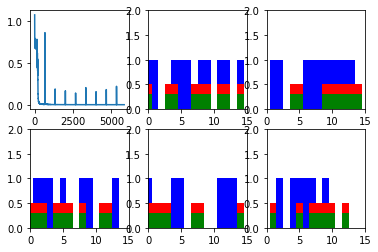

Step 600 Loss 0.000254551


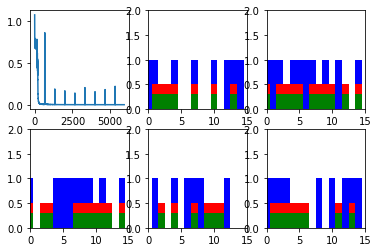

New data, epoch 9
Step 0 Loss 0.221185


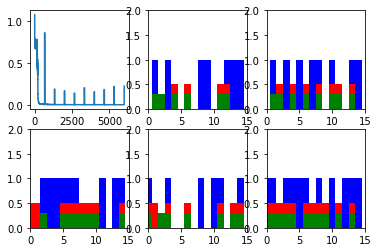

Step 100 Loss 0.000338885


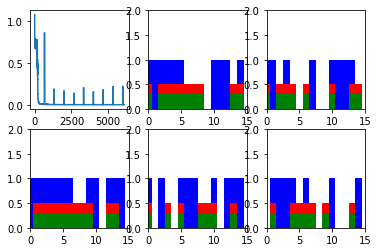

Step 200 Loss 0.000270251


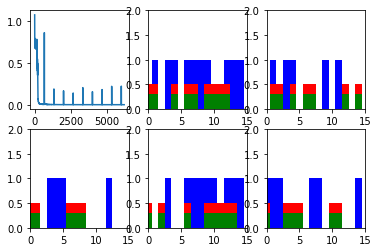

Step 300 Loss 0.000280382


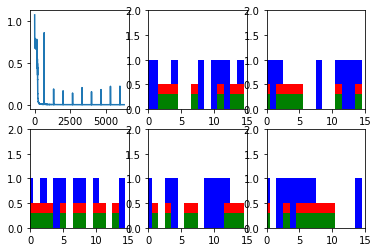

Step 400 Loss 0.000230942


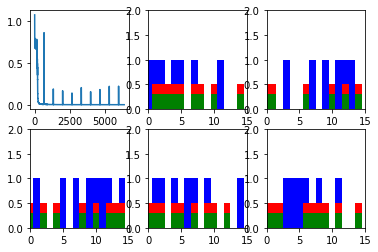

Step 500 Loss 0.000272087


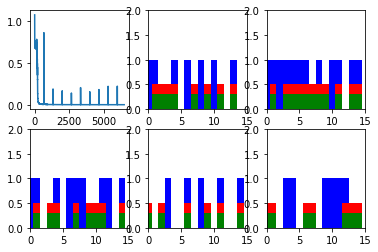

Step 600 Loss 0.000290121


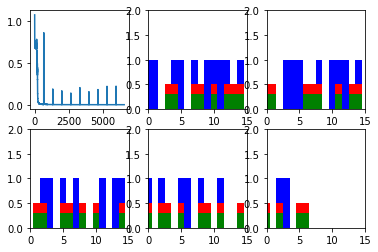

New data, epoch 10
Step 0 Loss 0.308103


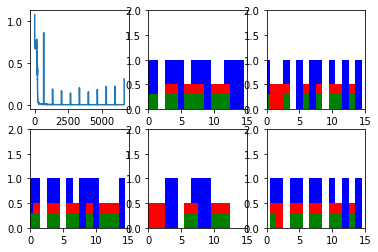

Step 100 Loss 0.000271362


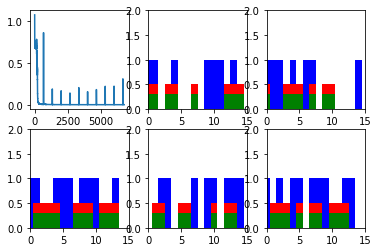

Step 200 Loss 0.000217331


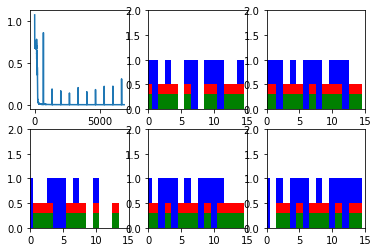

Step 300 Loss 0.000266937


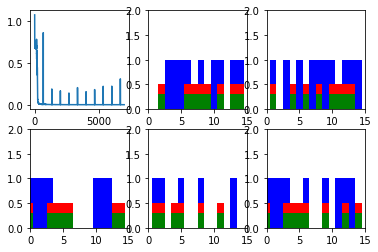

Step 400 Loss 0.000272792


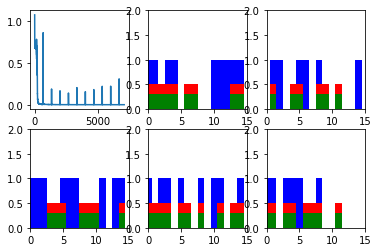

Step 500 Loss 0.000233873


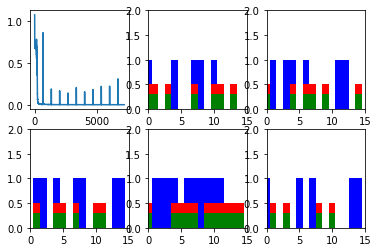

Step 600 Loss 0.00022395


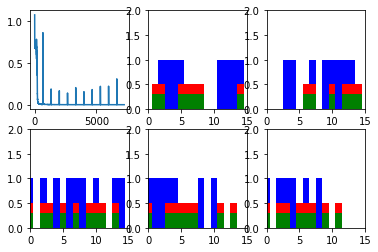

New data, epoch 11
Step 0 Loss 0.331107


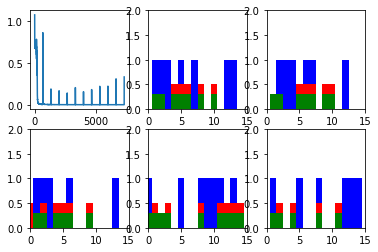

Step 100 Loss 0.000300824


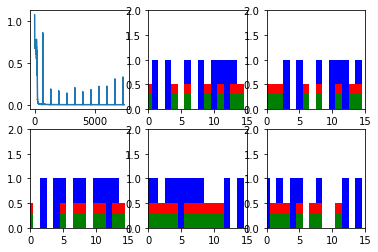

Step 200 Loss 0.000287699


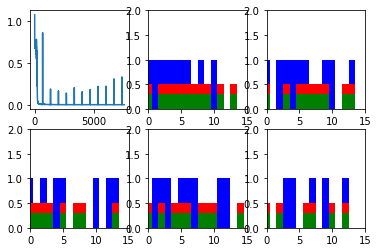

Step 300 Loss 0.000277439


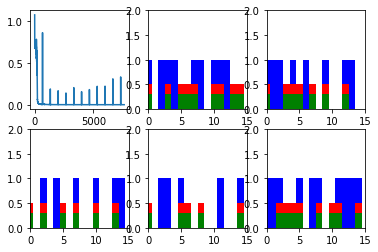

Step 400 Loss 0.000260206


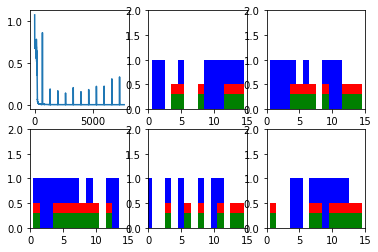

Step 500 Loss 0.000192886


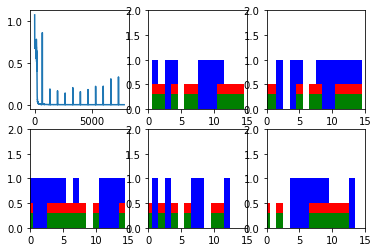

Step 600 Loss 0.00023299


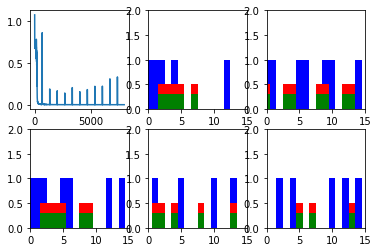

New data, epoch 12
Step 0 Loss 0.141896


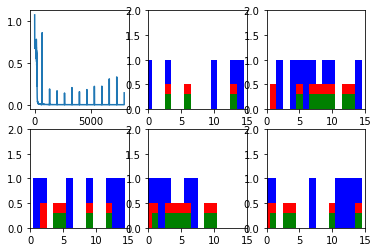

Step 100 Loss 0.000235209


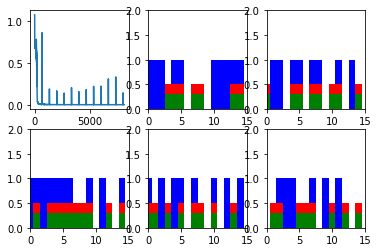

Step 200 Loss 0.000212689


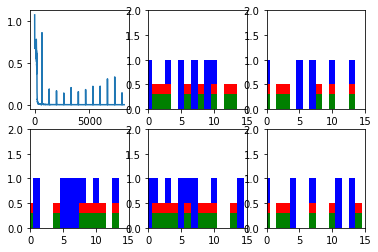

Step 300 Loss 0.000166708


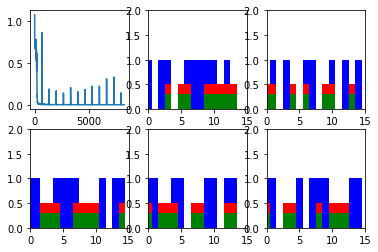

Step 400 Loss 0.000205341


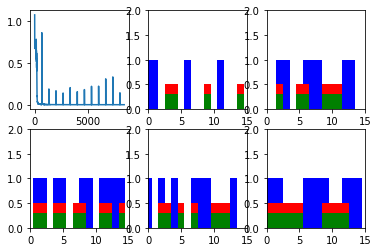

Step 500 Loss 0.000192494


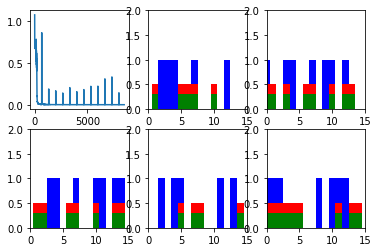

Step 600 Loss 0.000199206


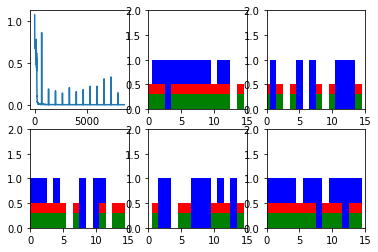

New data, epoch 13
Step 0 Loss 0.291513


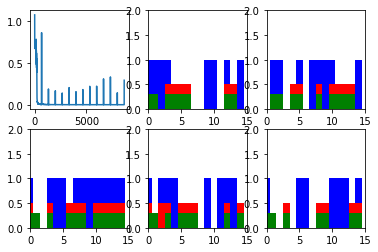

Step 100 Loss 0.000212753


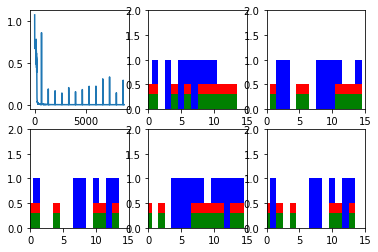

Step 200 Loss 0.000174835


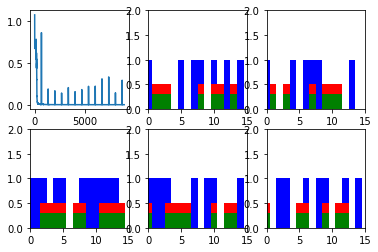

Step 300 Loss 0.000182657


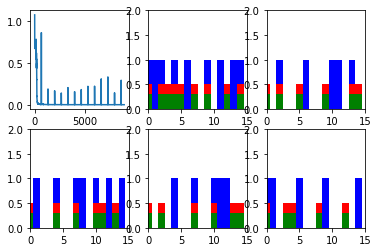

Step 400 Loss 0.000210347


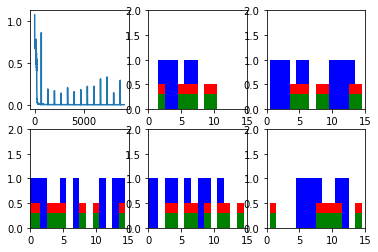

Step 500 Loss 0.000182589


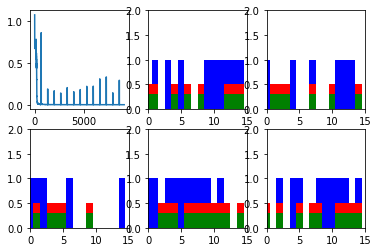

Step 600 Loss 0.000200661


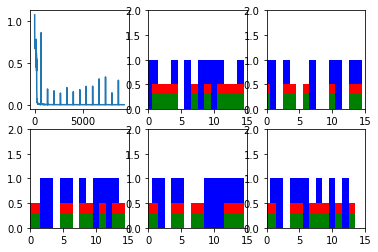

New data, epoch 14
Step 0 Loss 0.246003


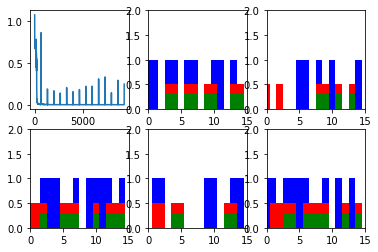

Step 100 Loss 0.000372684


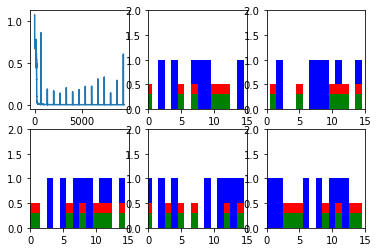

Step 200 Loss 0.000331586


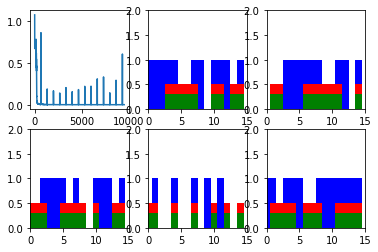

Step 300 Loss 0.000274042


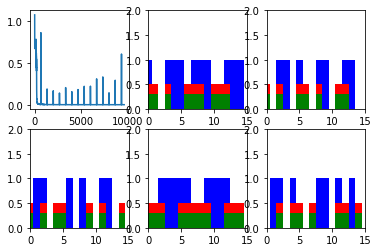

Step 400 Loss 0.000249324


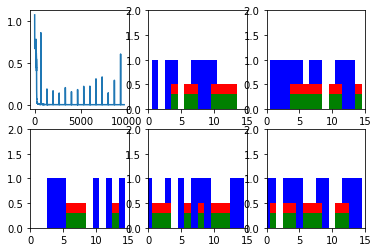

Step 500 Loss 0.000272519


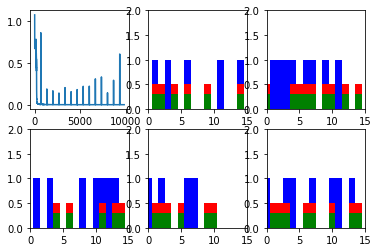

Step 600 Loss 0.000289381


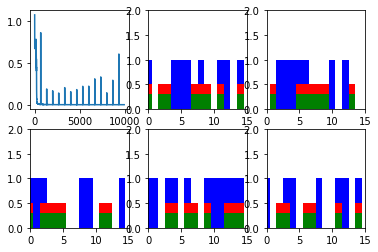

New data, epoch 15
Step 0 Loss 0.225238


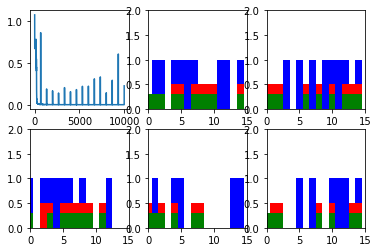

Step 100 Loss 0.000262286


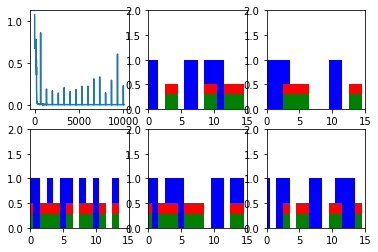

Step 200 Loss 0.000200126


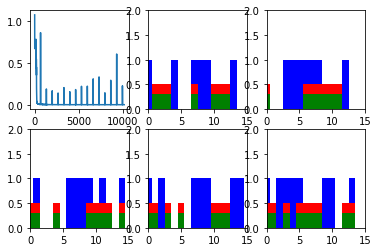

Step 300 Loss 0.000247869


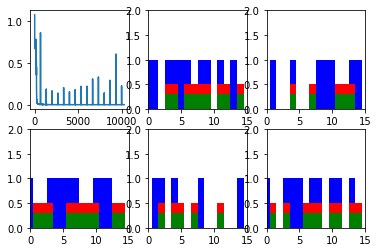

Step 400 Loss 0.000272037


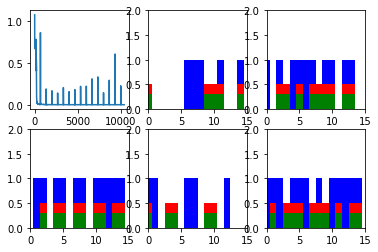

Step 500 Loss 0.000260008


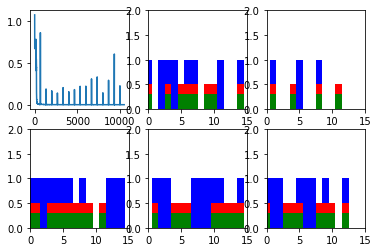

Step 600 Loss 0.000219859


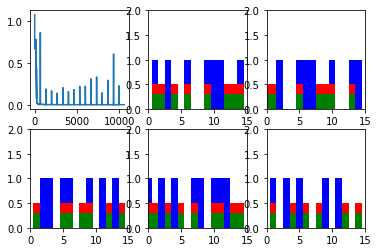

New data, epoch 16
Step 0 Loss 0.270356


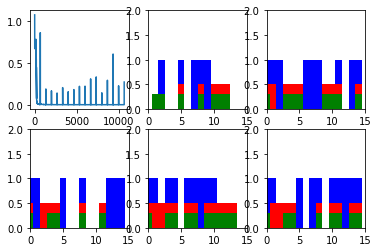

Step 100 Loss 0.000380753


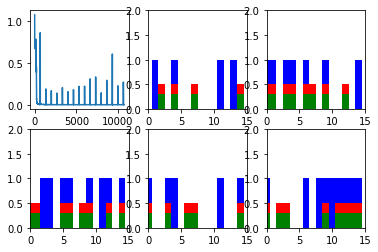

Step 200 Loss 0.000277417


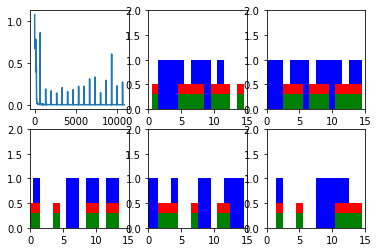

Step 300 Loss 0.000221937


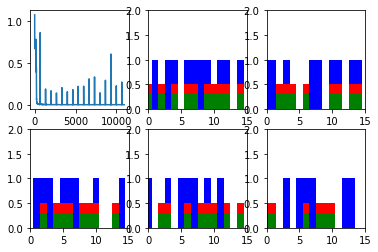

Step 400 Loss 0.00027703


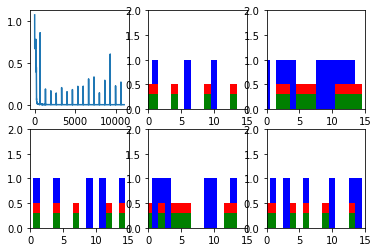

Step 500 Loss 0.000274809


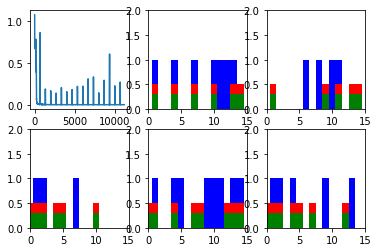

Step 600 Loss 0.000195551


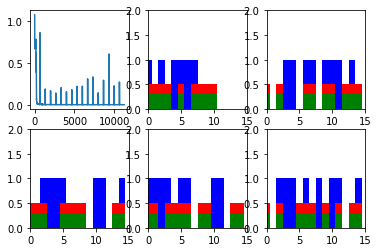

New data, epoch 17
Step 0 Loss 0.440584


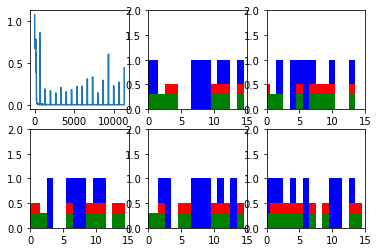

Step 100 Loss 0.000229126


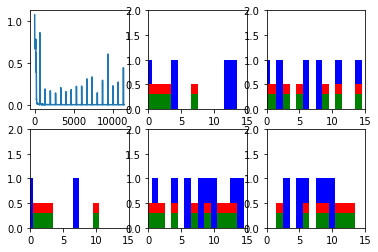

Step 200 Loss 0.000226006


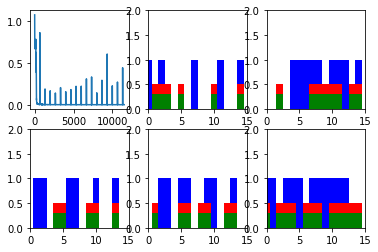

Step 300 Loss 0.000171144


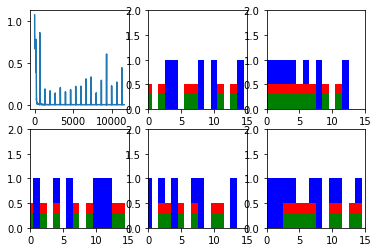

Step 400 Loss 0.000224091


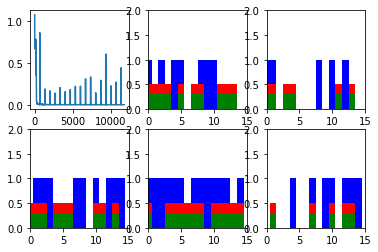

Step 500 Loss 0.000192797


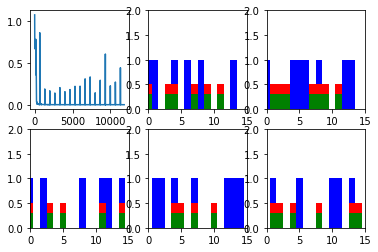

Step 600 Loss 0.000188206


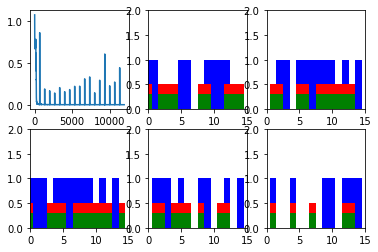

New data, epoch 18
Step 0 Loss 0.225576


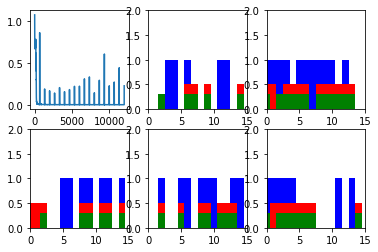

Step 100 Loss 0.00020749


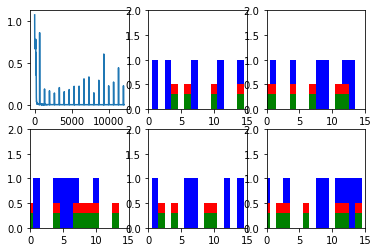

Step 200 Loss 0.000191182


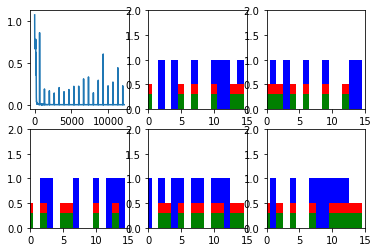

Step 300 Loss 0.000176672


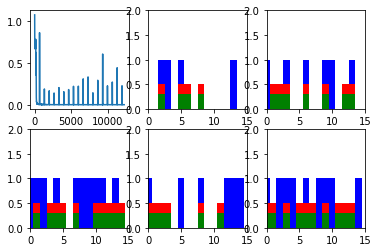

Step 400 Loss 0.000157556


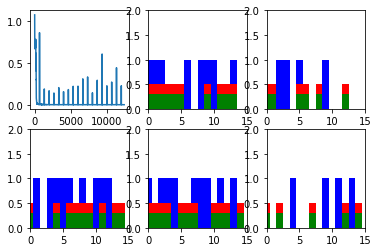

Step 500 Loss 0.000183912


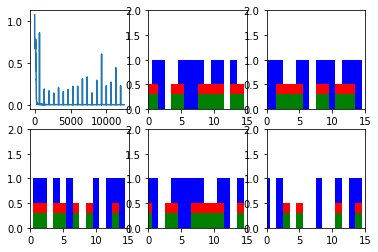

Step 600 Loss 0.000182434


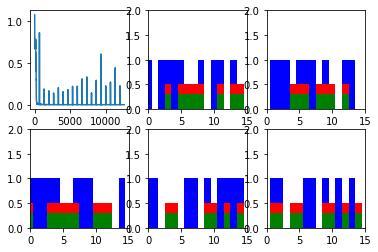

New data, epoch 19
Step 0 Loss 0.162119


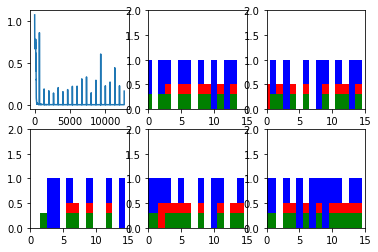

Step 100 Loss 0.000169445


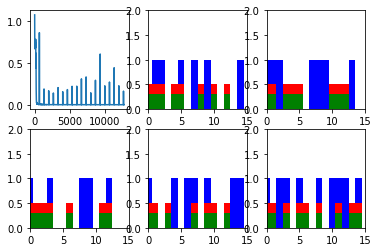

Step 200 Loss 0.000200583


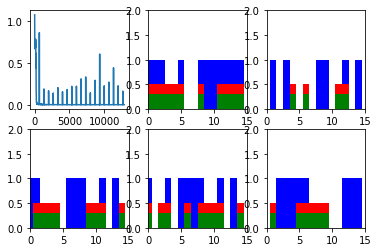

Step 300 Loss 0.000135114


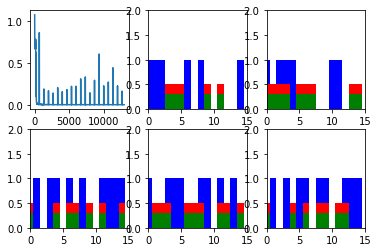

Step 400 Loss 0.000161292


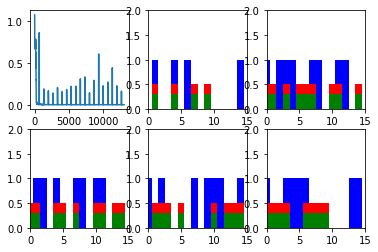

Step 500 Loss 0.000176606


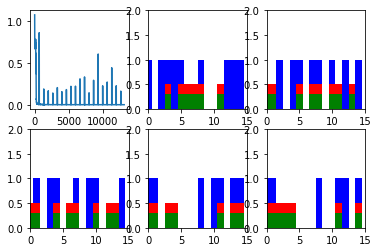

Step 600 Loss 0.000163995


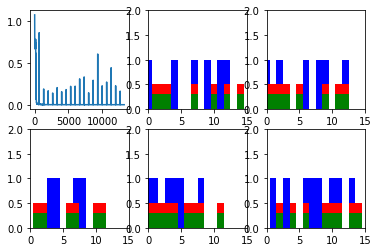

New data, epoch 20
Step 0 Loss 0.164526


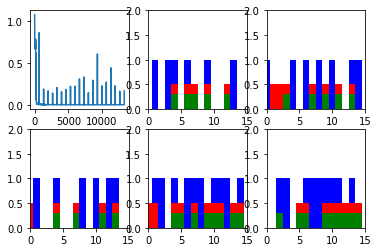

Step 100 Loss 0.000138933


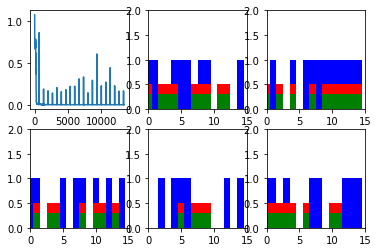

Step 200 Loss 0.000149985


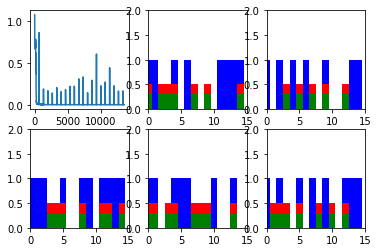

Step 300 Loss 0.000127172


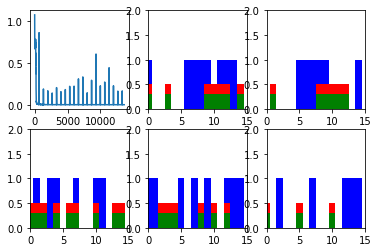

Step 400 Loss 0.000164089


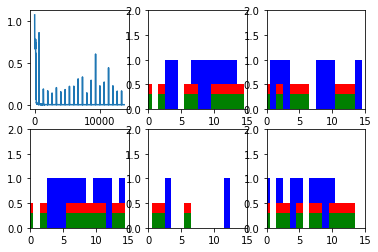

Step 500 Loss 0.000128529


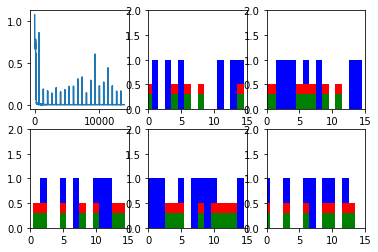

Step 600 Loss 0.0001648


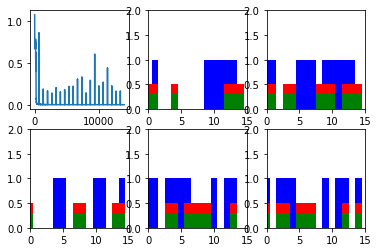

New data, epoch 21
Step 0 Loss 0.164585


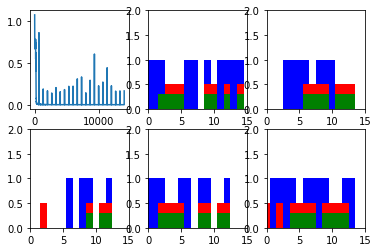

Step 100 Loss 0.000158746


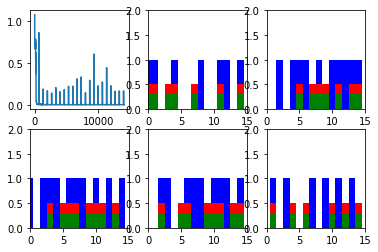

Step 200 Loss 0.000171799


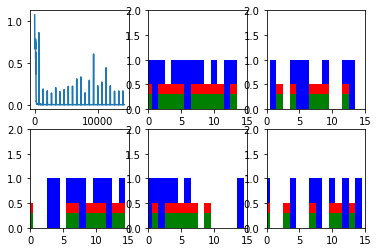

Step 300 Loss 0.000166205


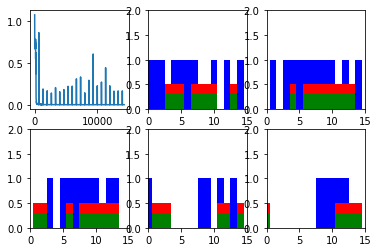

Step 400 Loss 0.000152365


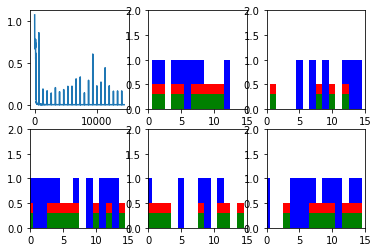

Step 500 Loss 0.000147098


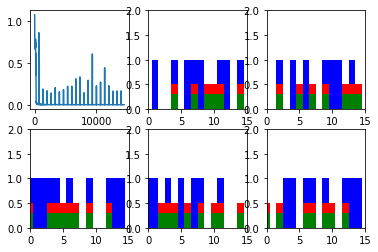

Step 600 Loss 0.000134242


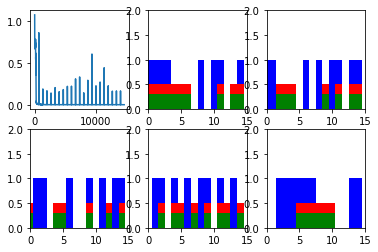

New data, epoch 22
Step 0 Loss 0.181048


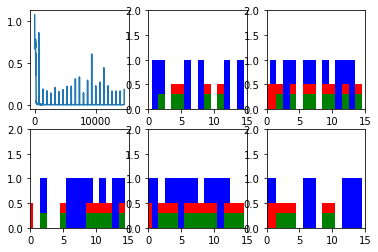

Step 100 Loss 0.000151645


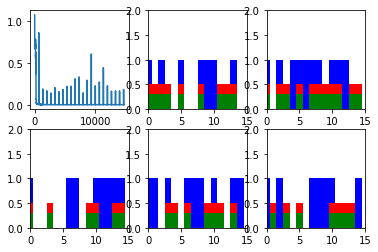

Step 200 Loss 0.000125166


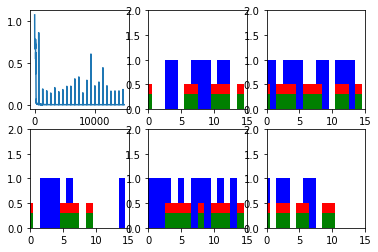

Step 300 Loss 0.00012803


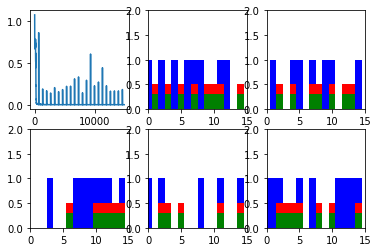

Step 400 Loss 0.000146927


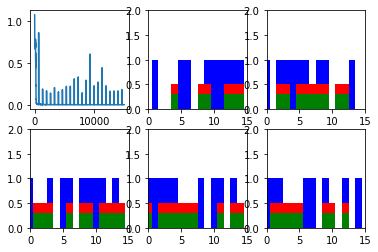

Step 500 Loss 0.000136423


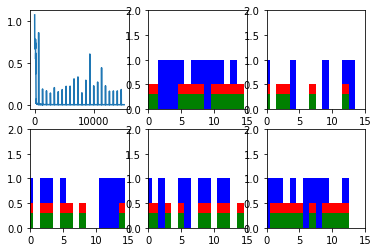

Step 600 Loss 0.000130542


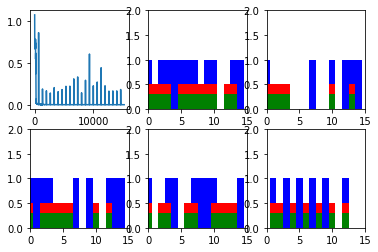

New data, epoch 23
Step 0 Loss 0.30059


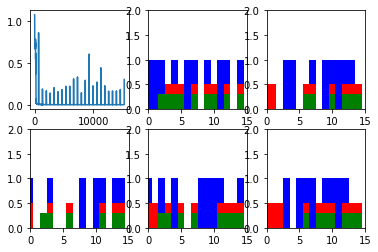

Step 100 Loss 0.000216857


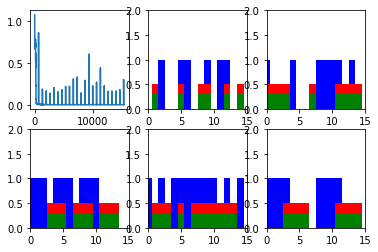

Step 200 Loss 0.000167216


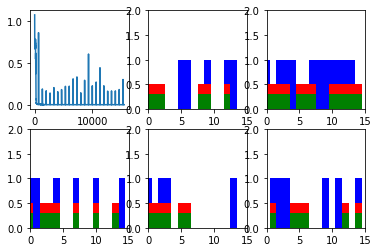

Step 300 Loss 0.000160883


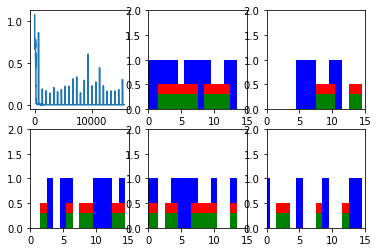

Step 400 Loss 0.000160866


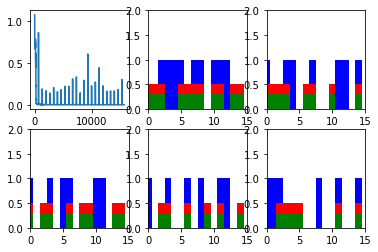

Step 500 Loss 0.000155595


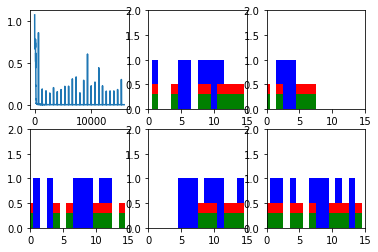

Step 600 Loss 0.000156014


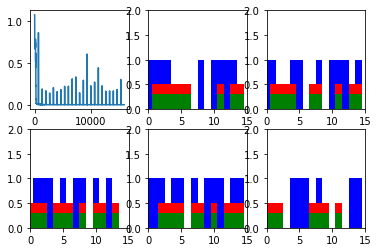

New data, epoch 24
Step 0 Loss 0.117854


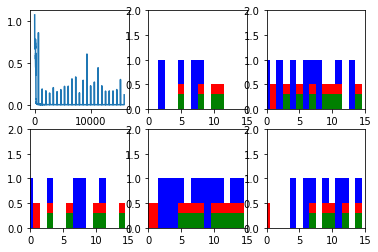

Step 100 Loss 0.000145224


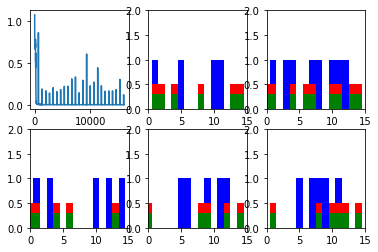

Step 200 Loss 0.000138245


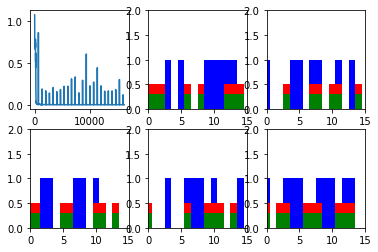

Step 300 Loss 0.000153729


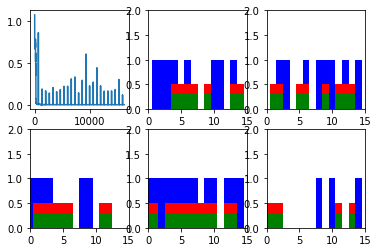

Step 400 Loss 0.000143988


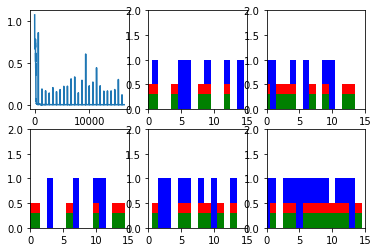

Step 500 Loss 0.000147034


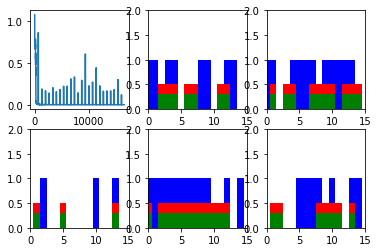

Step 600 Loss 0.000140519


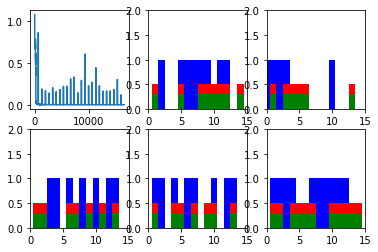

New data, epoch 25
Step 0 Loss 0.102775


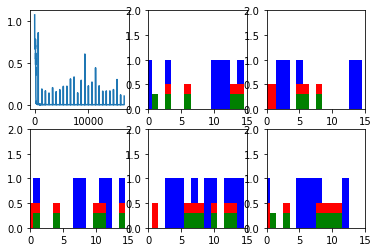

Step 100 Loss 0.000118676


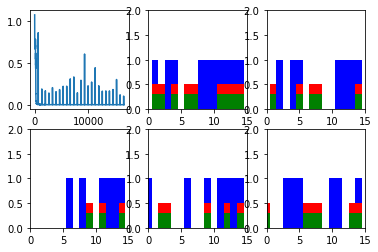

Step 200 Loss 0.000128886


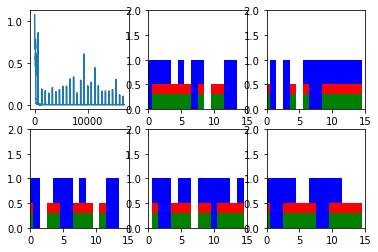

Step 300 Loss 0.000117784


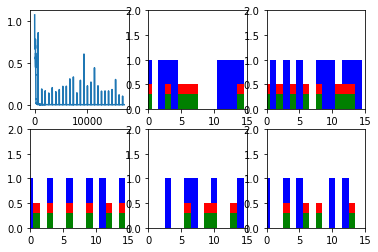

Step 400 Loss 9.71227e-05


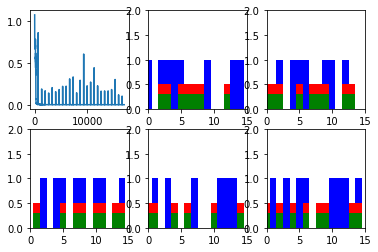

Step 500 Loss 0.000123592


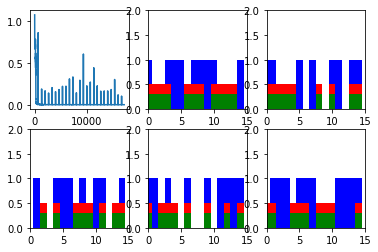

Step 600 Loss 9.55327e-05


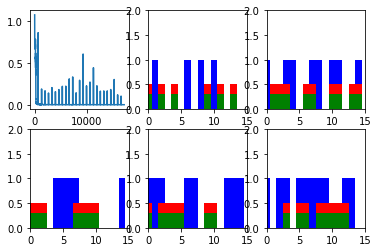

New data, epoch 26
Step 0 Loss 0.335973


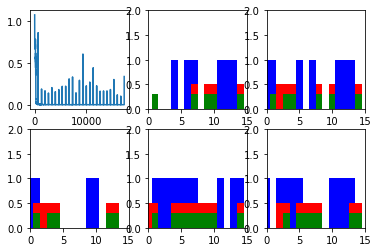

Step 100 Loss 0.000105191


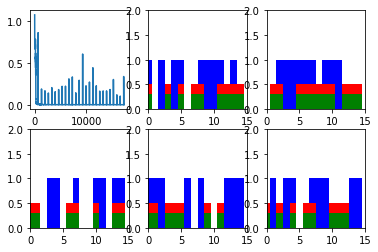

Step 200 Loss 8.83545e-05


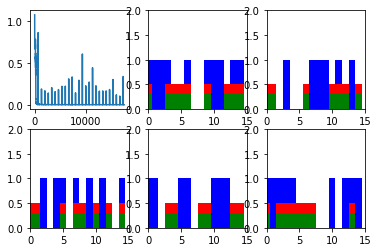

Step 300 Loss 0.000136374


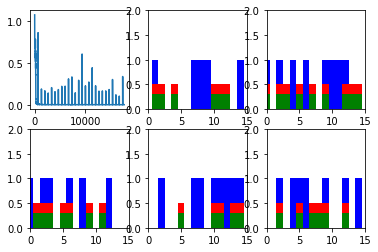

Step 400 Loss 0.000127442


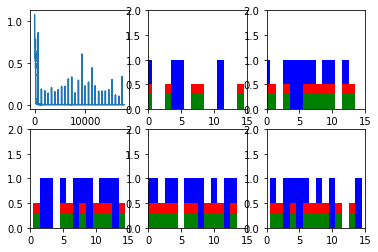

Step 500 Loss 0.00013204


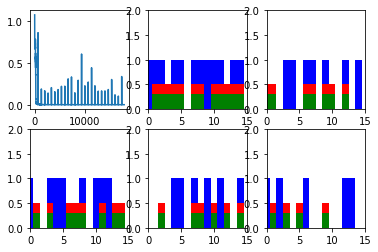

Step 600 Loss 0.000120849


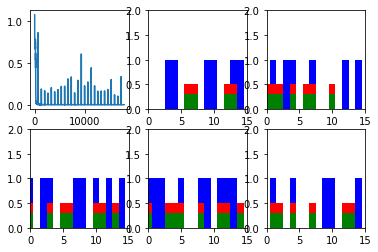

New data, epoch 27
Step 0 Loss 0.136352


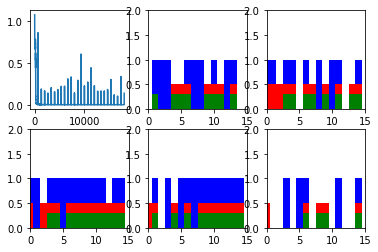

Step 100 Loss 0.000108485


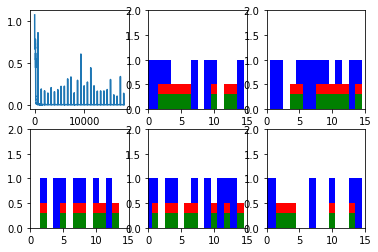

Step 200 Loss 0.000117909


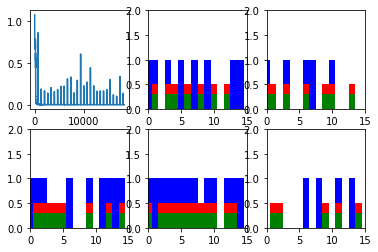

Step 300 Loss 0.000103518


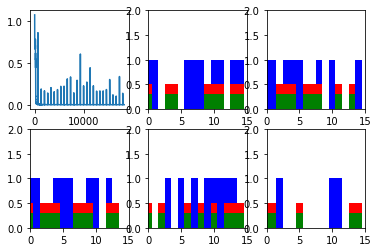

Step 400 Loss 0.0001361


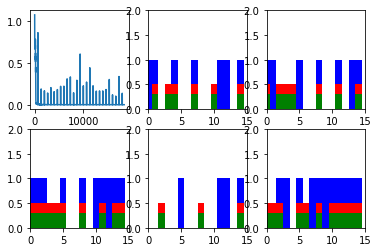

Step 500 Loss 0.000109846


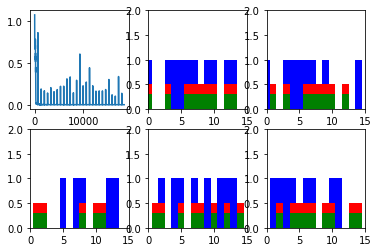

Step 600 Loss 9.70598e-05


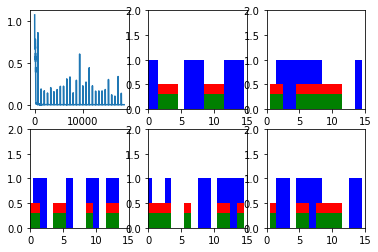

New data, epoch 28
Step 0 Loss 0.200221


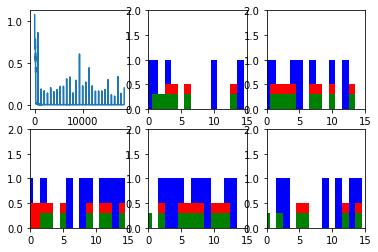

Step 100 Loss 0.000115796


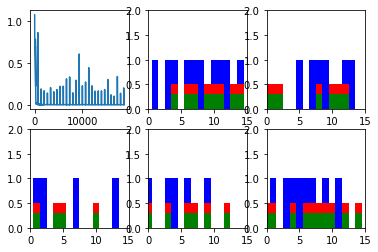

Step 200 Loss 0.00010158


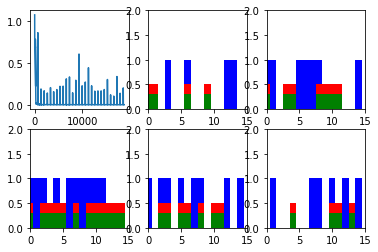

Step 300 Loss 0.000104796


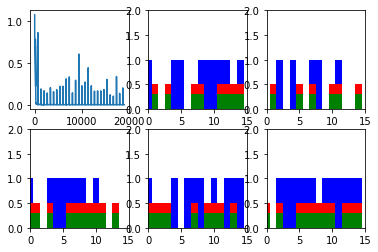

Step 400 Loss 0.000126111


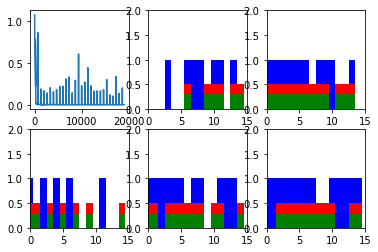

Step 500 Loss 0.000107671


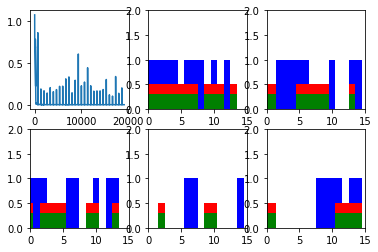

Step 600 Loss 9.82627e-05


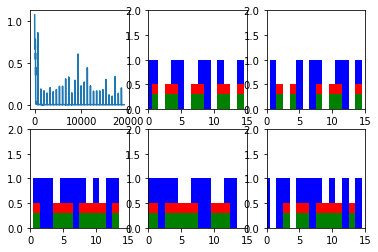

New data, epoch 29
Step 0 Loss 0.188697


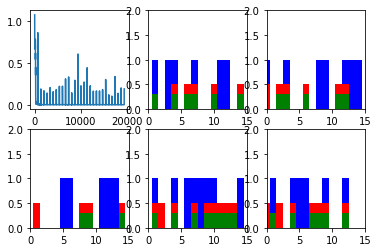

Step 100 Loss 0.000111646


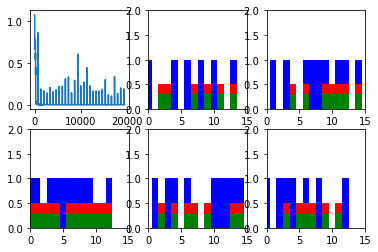

Step 200 Loss 9.46393e-05


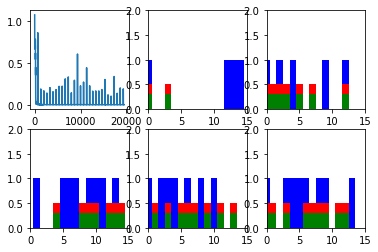

Step 300 Loss 0.000128723


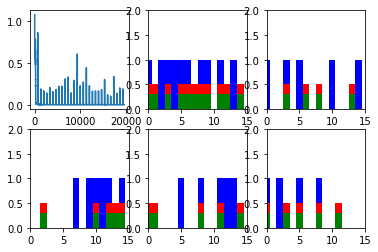

Step 400 Loss 0.000110066


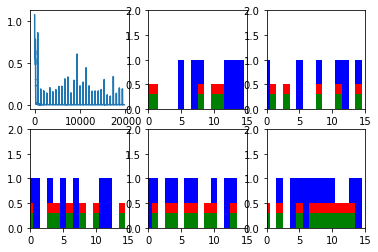

Step 500 Loss 0.0001063


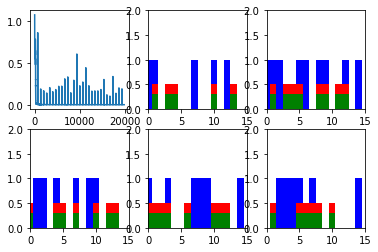

Step 600 Loss 8.6198e-05


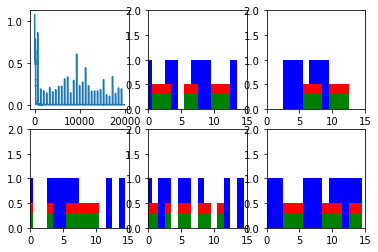

New data, epoch 30
Step 0 Loss 0.266215


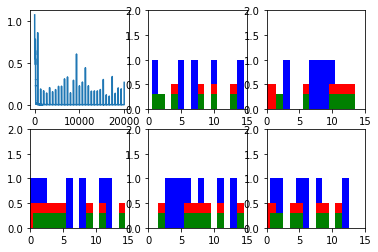

Step 100 Loss 0.00010094


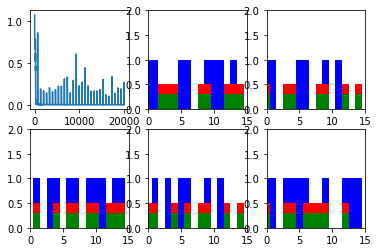

Step 200 Loss 0.000101605


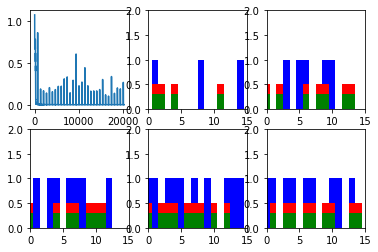

Step 300 Loss 0.000106907


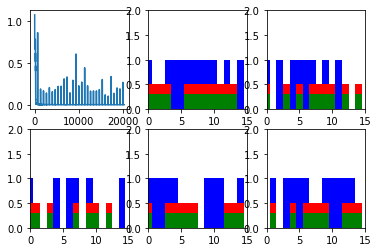

Step 400 Loss 0.000103863


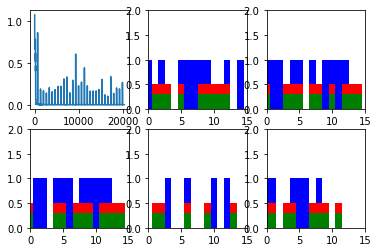

Step 500 Loss 0.00010917


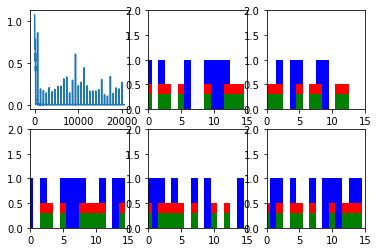

Step 600 Loss 0.000106408


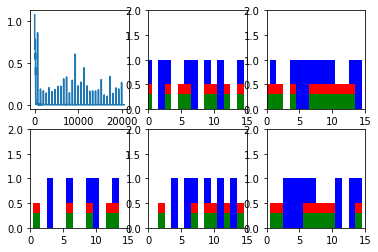

New data, epoch 31
Step 0 Loss 0.221394


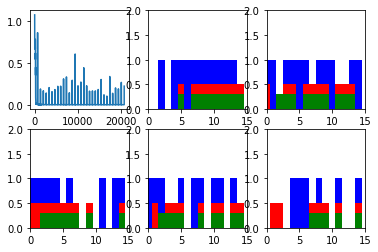

Step 100 Loss 9.20422e-05


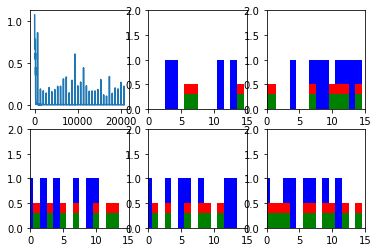

Step 200 Loss 0.000118946


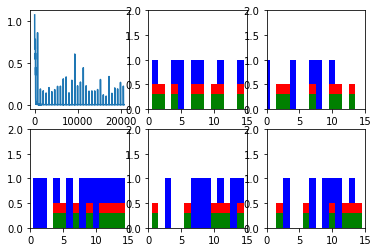

Step 300 Loss 9.02325e-05


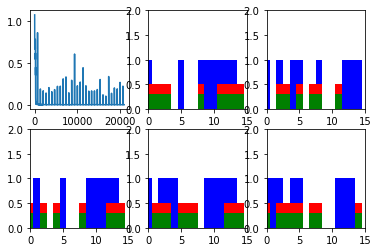

Step 400 Loss 8.63526e-05


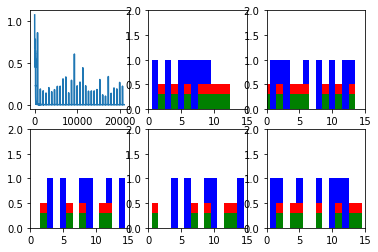

Step 500 Loss 8.74328e-05


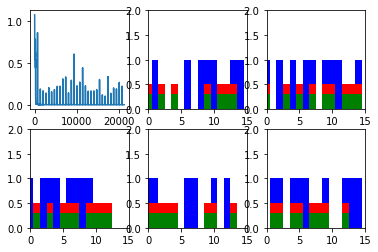

Step 600 Loss 9.5865e-05


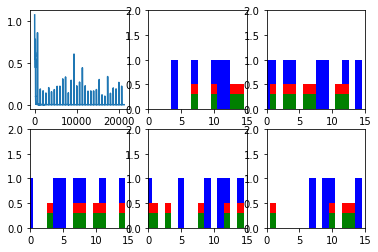

New data, epoch 32
Step 0 Loss 0.194487


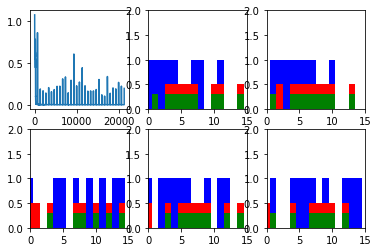

Step 100 Loss 0.000126888


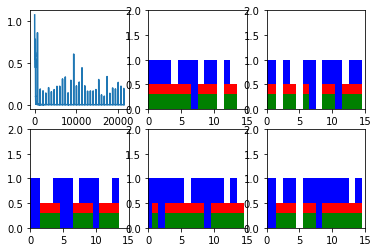

Step 200 Loss 0.000103802


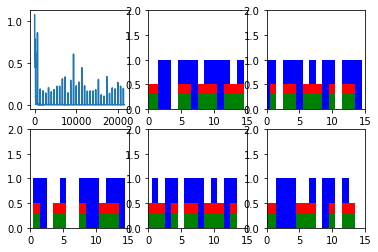

Step 300 Loss 0.000137502


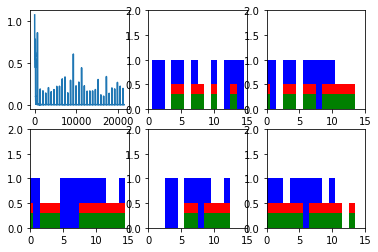

Step 400 Loss 9.48006e-05


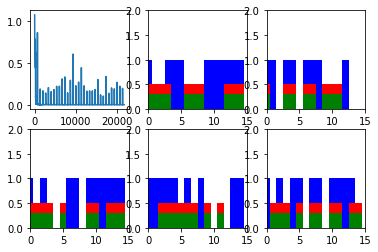

Step 500 Loss 7.96414e-05


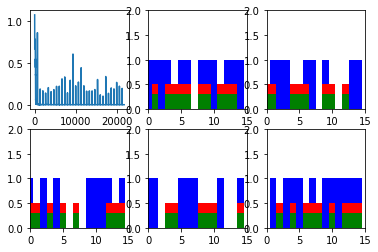

Step 600 Loss 9.77938e-05


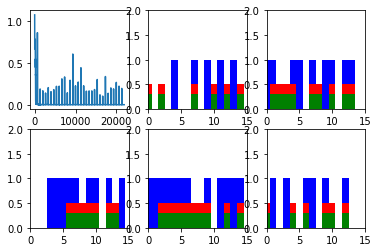

New data, epoch 33
Step 0 Loss 0.104813


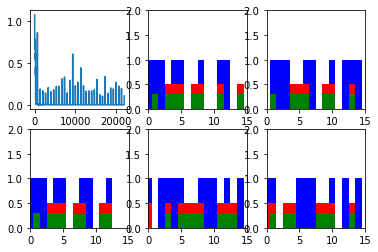

Step 100 Loss 0.000127914


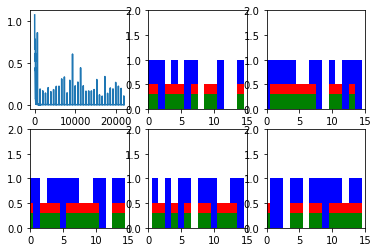

Step 200 Loss 9.22038e-05


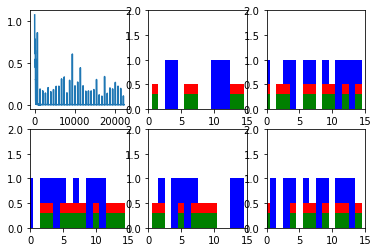

Step 300 Loss 9.46989e-05


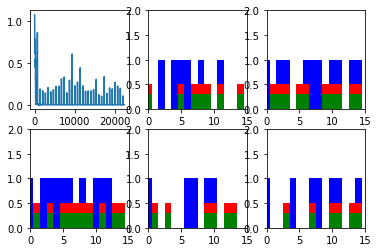

Step 400 Loss 0.000103478


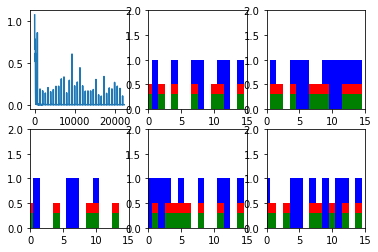

Step 500 Loss 8.83379e-05


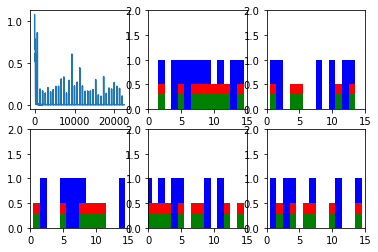

Step 600 Loss 8.76237e-05


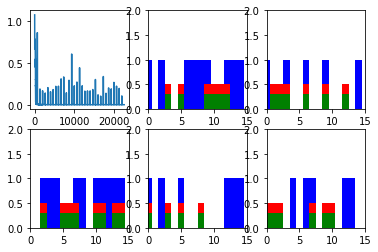

New data, epoch 34
Step 0 Loss 0.314226


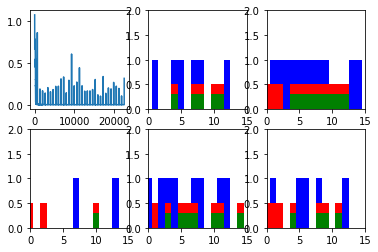

Step 100 Loss 9.21173e-05


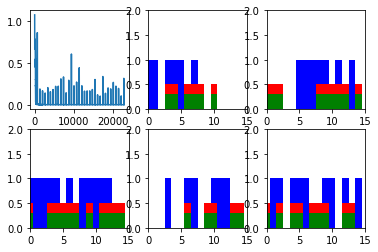

Step 200 Loss 0.000101261


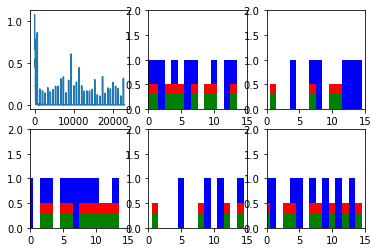

Step 300 Loss 9.08193e-05


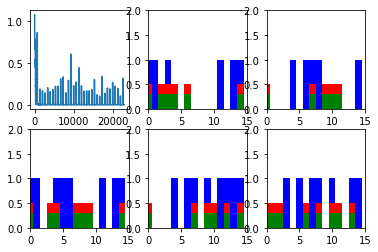

Step 400 Loss 9.37992e-05


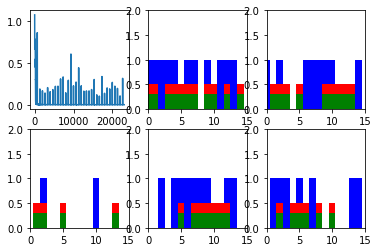

Step 500 Loss 8.74092e-05


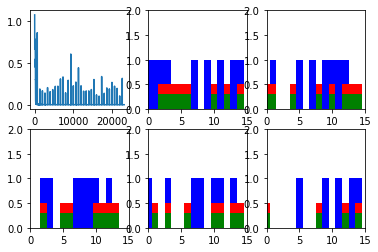

Step 600 Loss 9.08691e-05


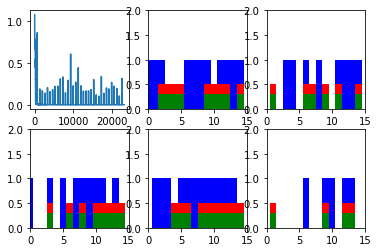

New data, epoch 35
Step 0 Loss 0.333031


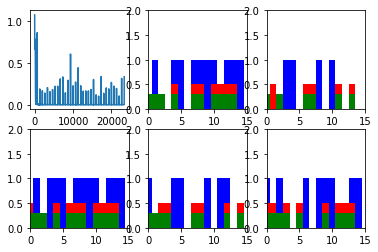

Step 100 Loss 0.000123826


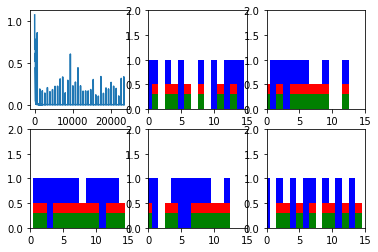

Step 200 Loss 0.00010889


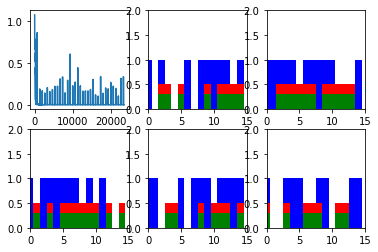

Step 300 Loss 7.71169e-05


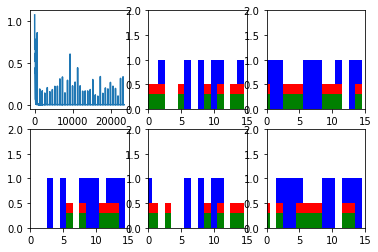

Step 400 Loss 0.000103733


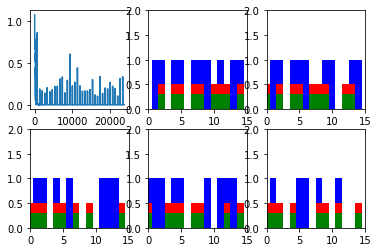

Step 500 Loss 0.000103615


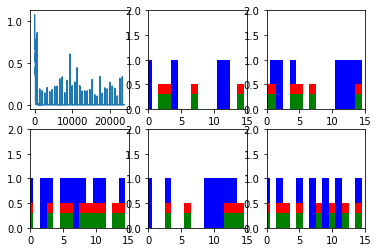

Step 600 Loss 0.000129801


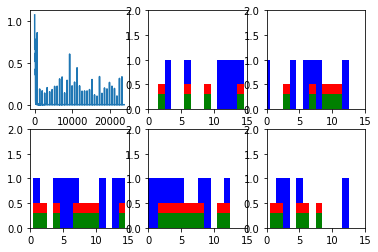

New data, epoch 36
Step 0 Loss 0.289156


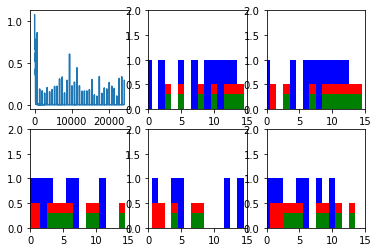

Step 100 Loss 8.70863e-05


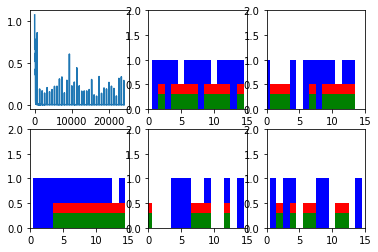

Step 200 Loss 9.31525e-05


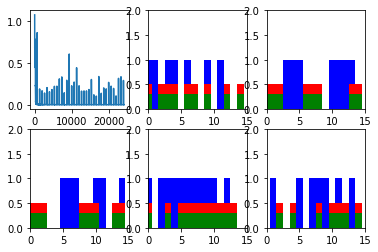

Step 300 Loss 9.1351e-05


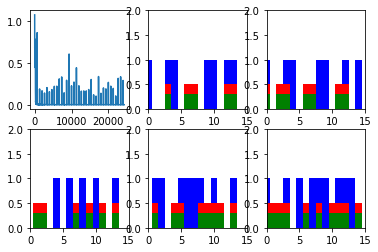

Step 400 Loss 8.61955e-05


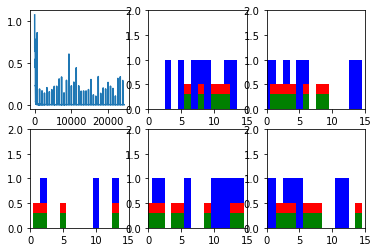

Step 500 Loss 0.000100541


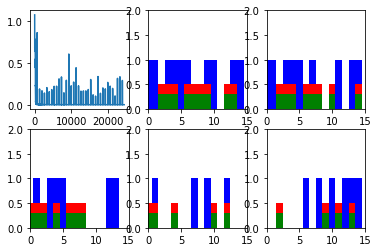

Step 600 Loss 7.85854e-05


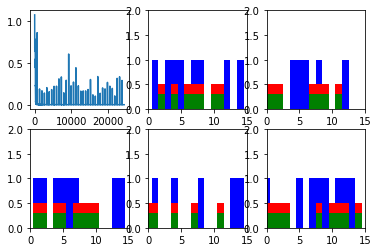

New data, epoch 37
Step 0 Loss 0.14173


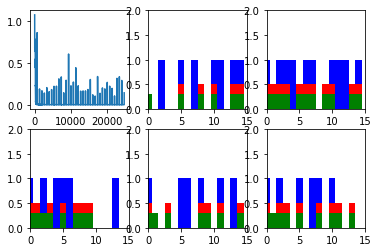

Step 100 Loss 8.04861e-05


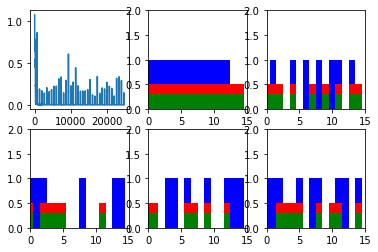

Step 200 Loss 8.91256e-05


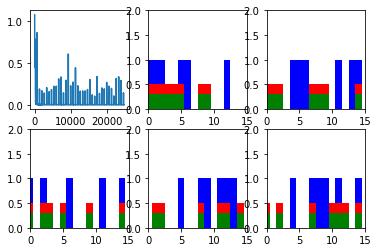

Step 300 Loss 7.52521e-05


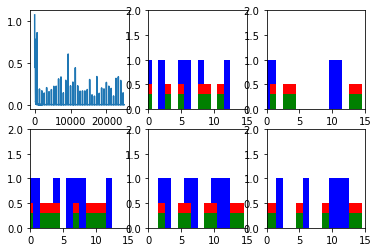

Step 400 Loss 9.27843e-05


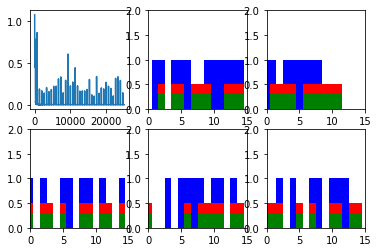

Step 500 Loss 7.5409e-05


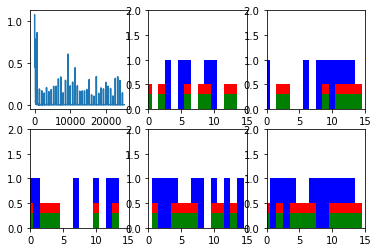

Step 600 Loss 6.54573e-05


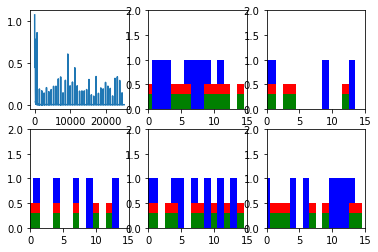

New data, epoch 38
Step 0 Loss 0.168025


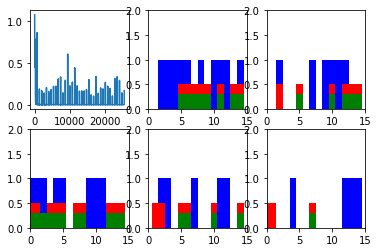

Step 100 Loss 7.82702e-05


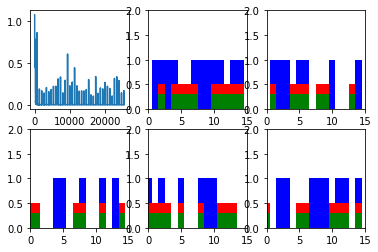

Step 200 Loss 7.31258e-05


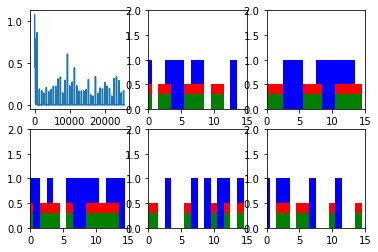

Step 300 Loss 8.6889e-05


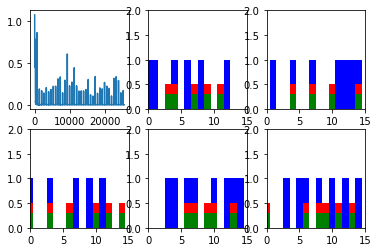

Step 400 Loss 7.48513e-05


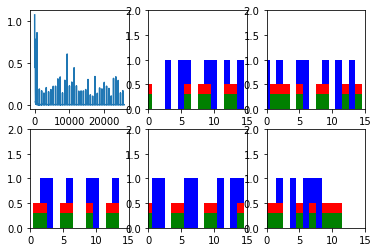

Step 500 Loss 8.71001e-05


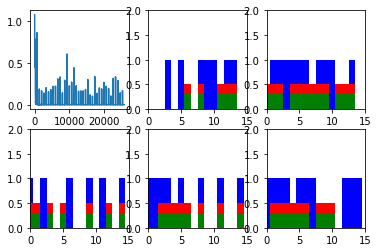

Step 600 Loss 7.46084e-05


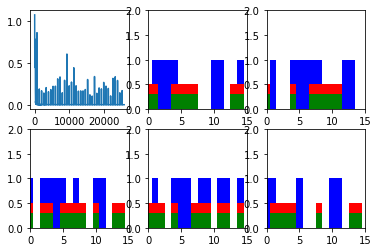

New data, epoch 39
Step 0 Loss 0.140448


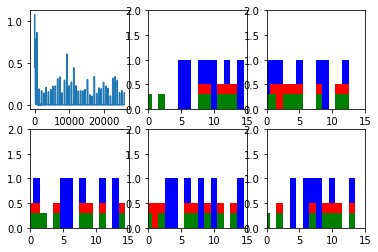

Step 100 Loss 6.53294e-05


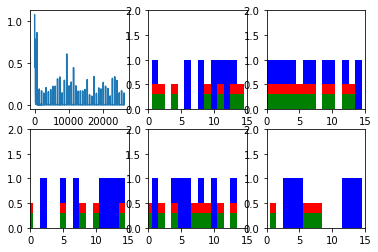

Step 200 Loss 7.09421e-05


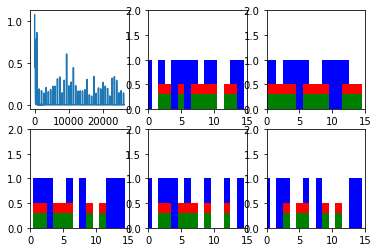

Step 300 Loss 8.13163e-05


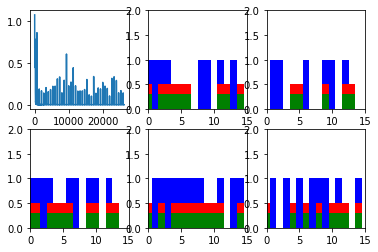

Step 400 Loss 6.94206e-05


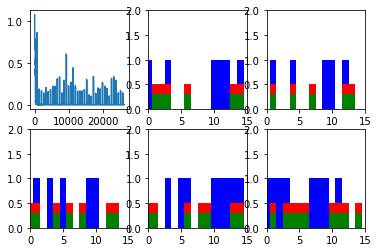

Step 500 Loss 7.38536e-05


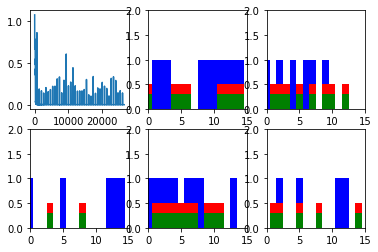

Step 600 Loss 7.22758e-05


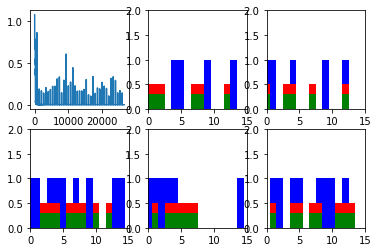

New data, epoch 40
Step 0 Loss 0.267783


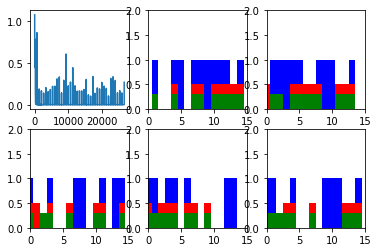

Step 100 Loss 9.2548e-05


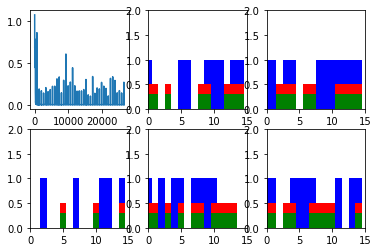

Step 200 Loss 7.92952e-05


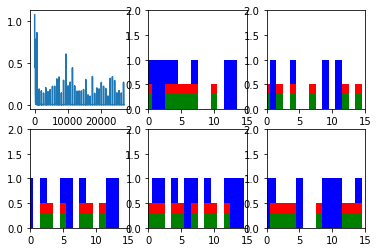

Step 300 Loss 0.000101118


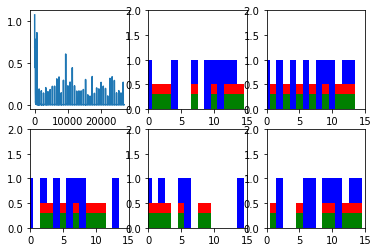

Step 400 Loss 8.89266e-05


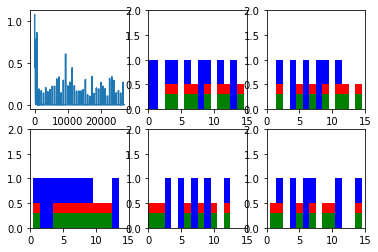

Step 500 Loss 0.000114515


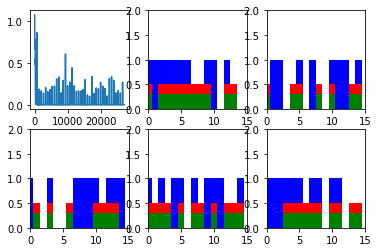

Step 600 Loss 8.119e-05


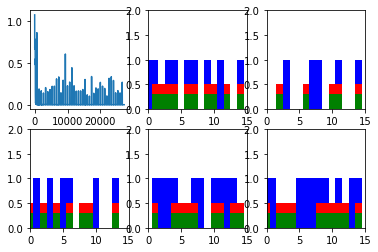

New data, epoch 41
Step 0 Loss 0.408305


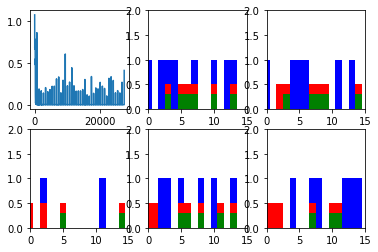

Step 100 Loss 7.30073e-05


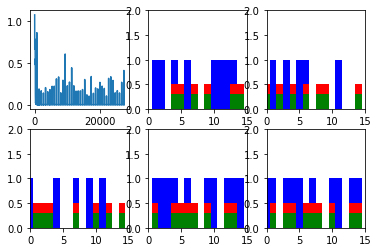

Step 200 Loss 8.06134e-05


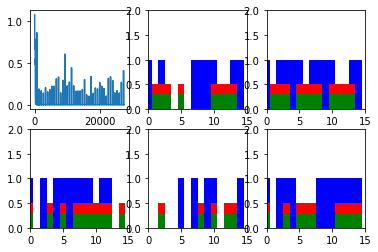

Step 300 Loss 7.57719e-05


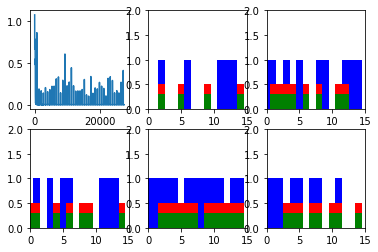

Step 400 Loss 8.56084e-05


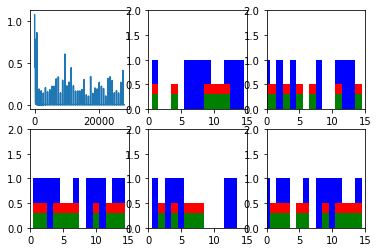

Step 500 Loss 7.63245e-05


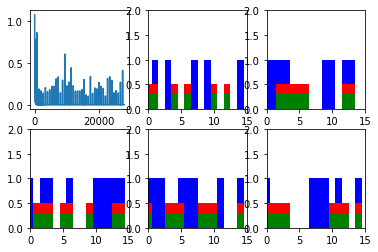

Step 600 Loss 9.10474e-05


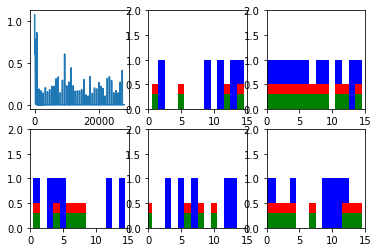

New data, epoch 42
Step 0 Loss 0.149331


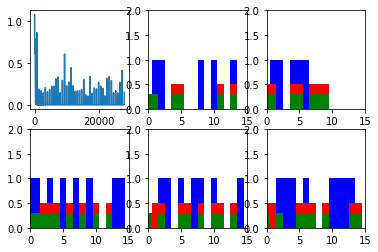

Step 100 Loss 7.33135e-05


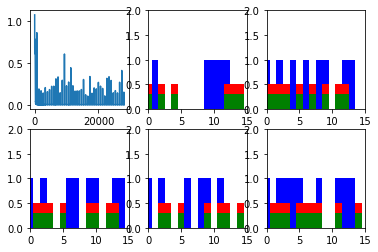

Step 200 Loss 7.75084e-05


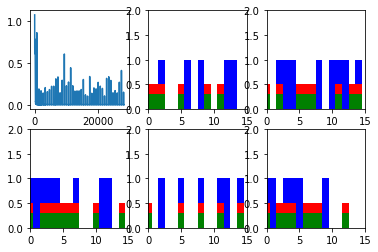

Step 300 Loss 6.84132e-05


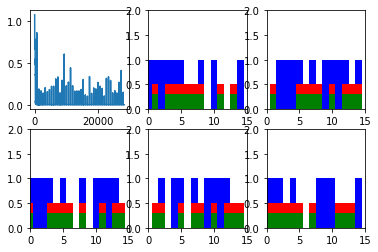

Step 400 Loss 7.43597e-05


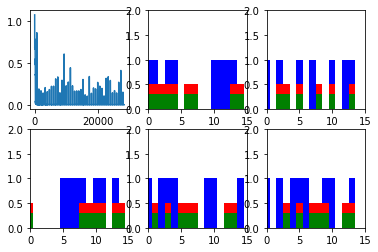

Step 500 Loss 6.64966e-05


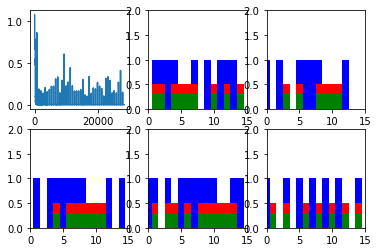

Step 600 Loss 7.06794e-05


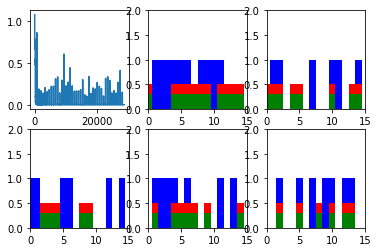

New data, epoch 43
Step 0 Loss 0.183595


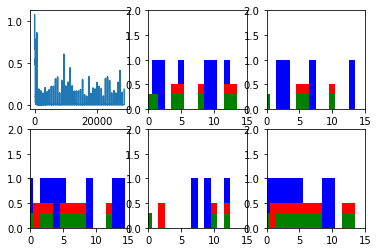

Step 100 Loss 9.51624e-05


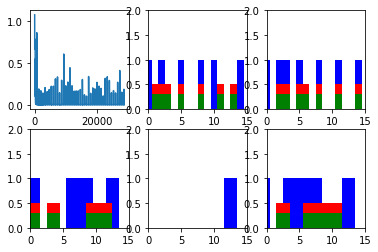

Step 200 Loss 7.80805e-05


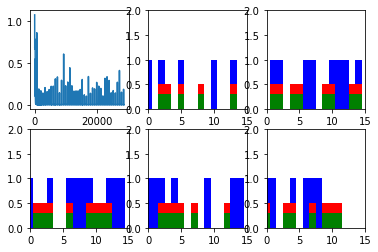

Step 300 Loss 5.6478e-05


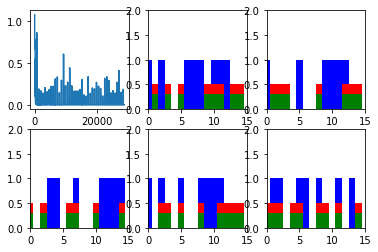

Step 400 Loss 7.54684e-05


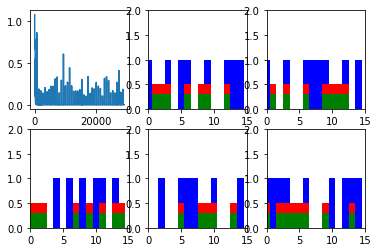

Step 500 Loss 8.81604e-05


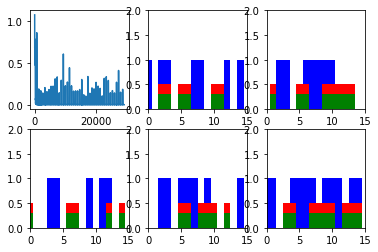

Step 600 Loss 7.36332e-05


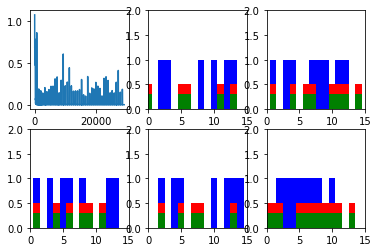

New data, epoch 44
Step 0 Loss 0.170031


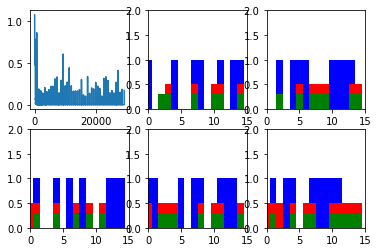

Step 100 Loss 8.19336e-05


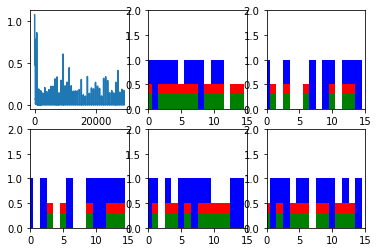

Step 200 Loss 7.27388e-05


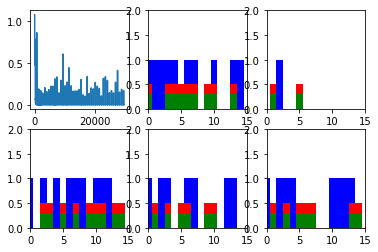

Step 300 Loss 6.92274e-05


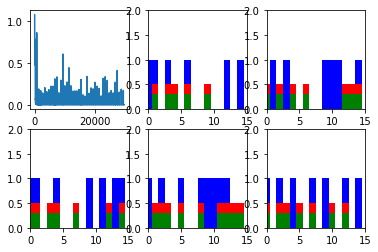

Step 400 Loss 7.5376e-05


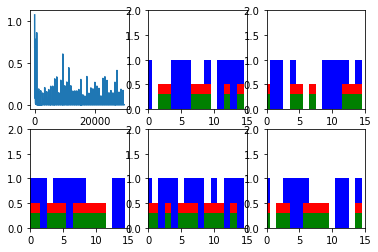

Step 500 Loss 7.75806e-05


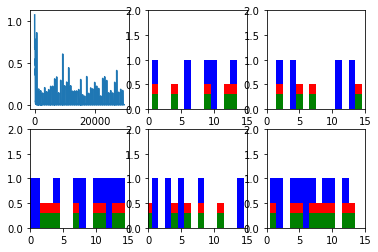

Step 600 Loss 7.7711e-05


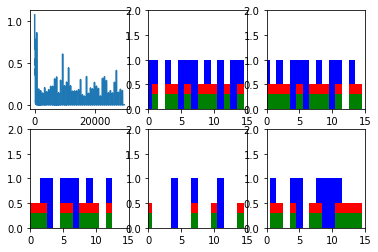

New data, epoch 45
Step 0 Loss 0.156922


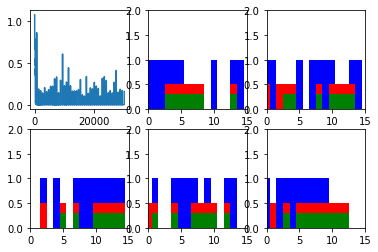

Step 100 Loss 7.10639e-05


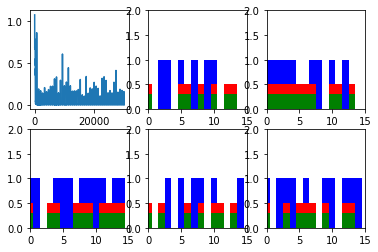

Step 200 Loss 6.82139e-05


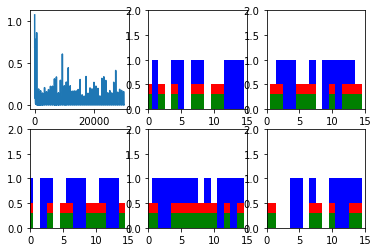

Step 300 Loss 6.03736e-05


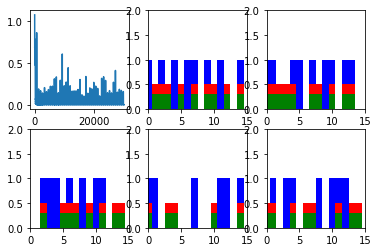

Step 400 Loss 7.2428e-05


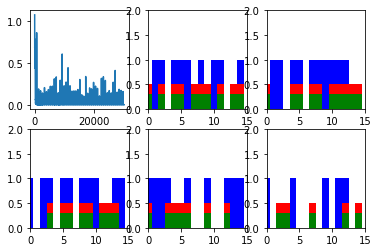

Step 500 Loss 6.73861e-05


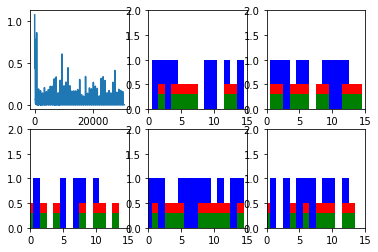

Step 600 Loss 8.98598e-05


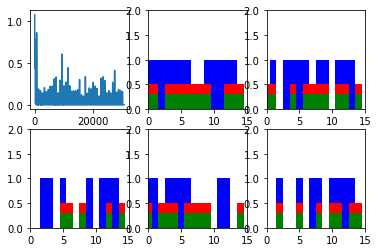

New data, epoch 46
Step 0 Loss 0.185018


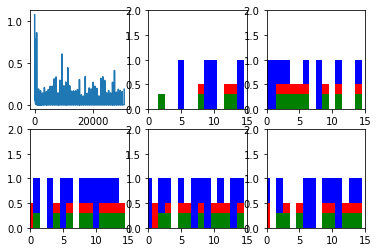

Step 100 Loss 9.03489e-05


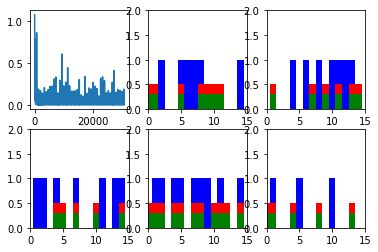

Step 200 Loss 7.28189e-05


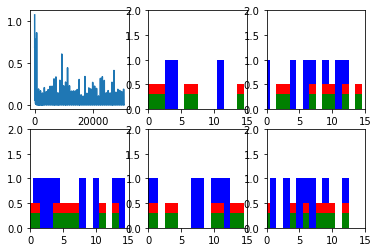

Step 300 Loss 6.61082e-05


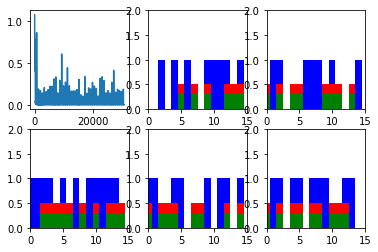

Step 400 Loss 7.18989e-05


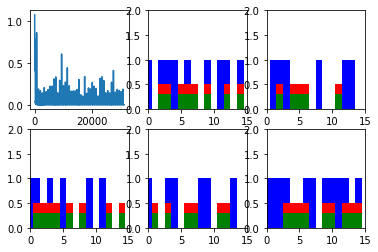

Step 500 Loss 8.10503e-05


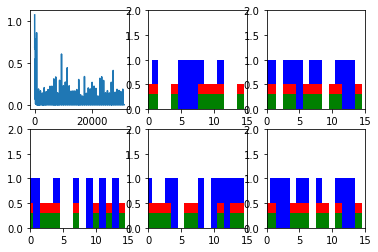

Step 600 Loss 9.72063e-05


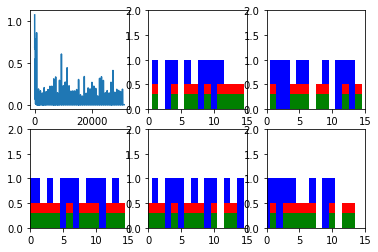

New data, epoch 47
Step 0 Loss 0.351795


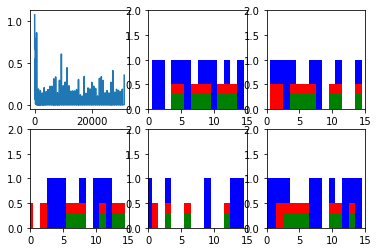

Step 100 Loss 6.42634e-05


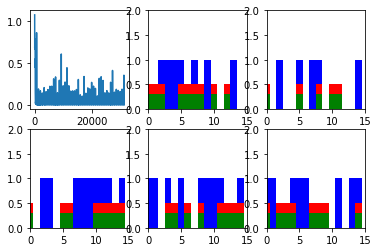

Step 200 Loss 7.24717e-05


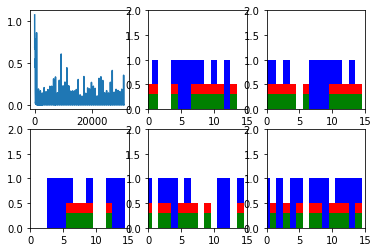

Step 300 Loss 8.65393e-05


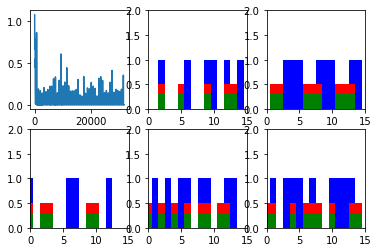

Step 400 Loss 8.17806e-05


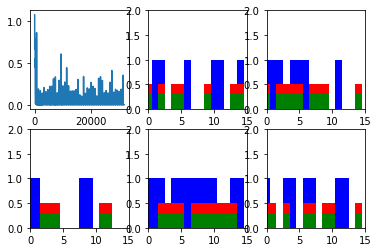

Step 500 Loss 6.02936e-05


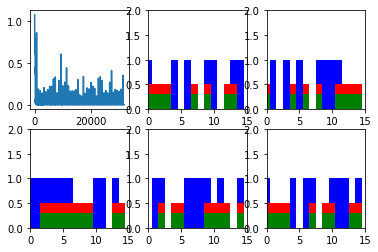

Step 600 Loss 6.36633e-05


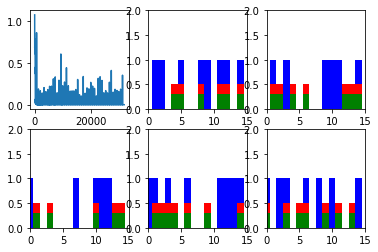

New data, epoch 48
Step 0 Loss 0.177593


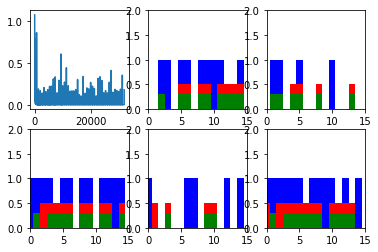

Step 100 Loss 8.86898e-05


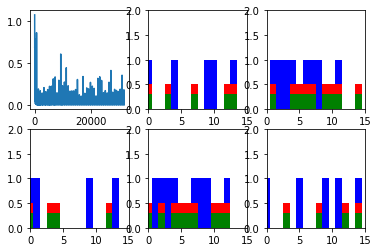

Step 200 Loss 8.61674e-05


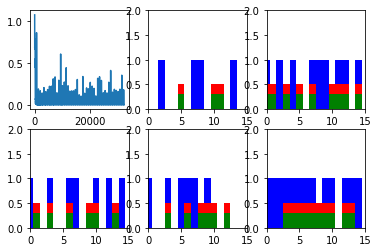

Step 300 Loss 7.82841e-05


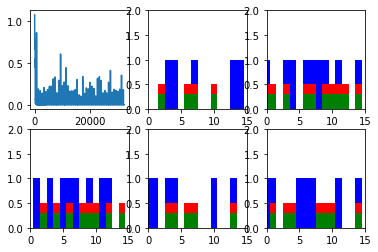

Step 400 Loss 5.60583e-05


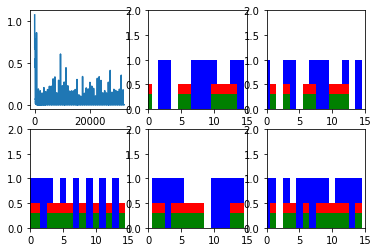

Step 500 Loss 6.74334e-05


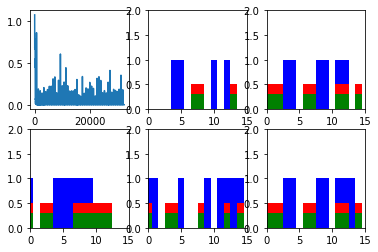

Step 600 Loss 0.000221146


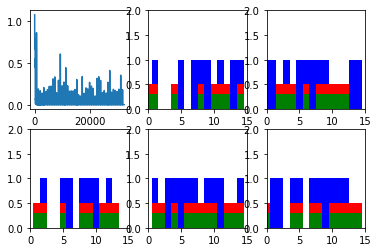

New data, epoch 49
Step 0 Loss 0.295538


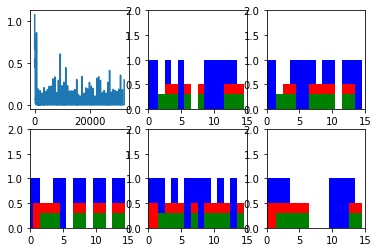

Step 100 Loss 9.06835e-05


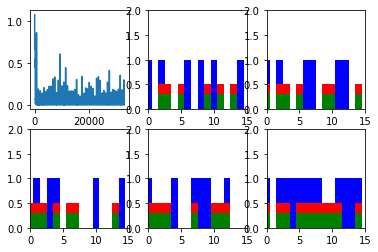

Step 200 Loss 9.61242e-05


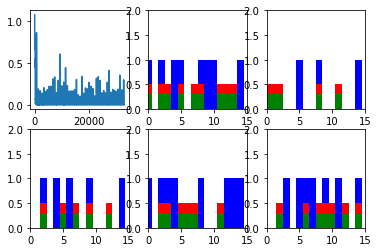

Step 300 Loss 7.75299e-05


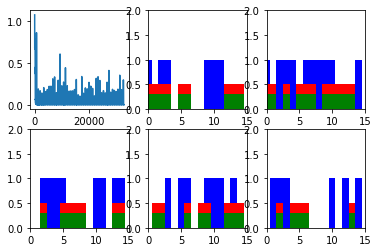

Step 400 Loss 6.6436e-05


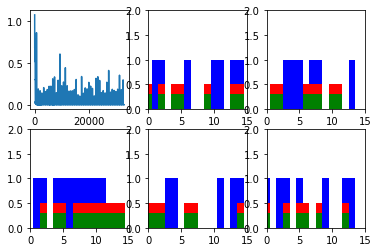

Step 500 Loss 6.97074e-05


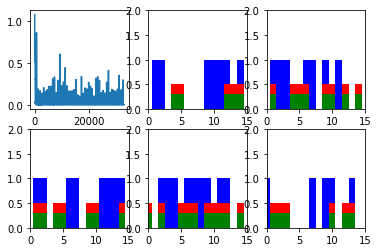

Step 600 Loss 7.54807e-05


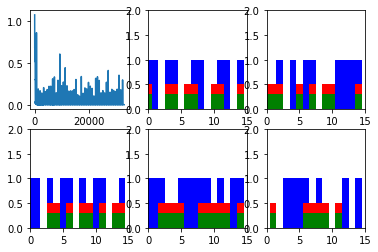

New data, epoch 50
Step 0 Loss 0.192232


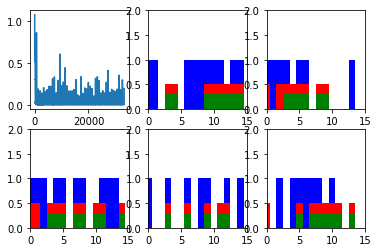

Step 100 Loss 6.05517e-05


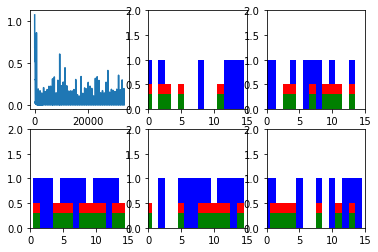

Step 200 Loss 7.48095e-05


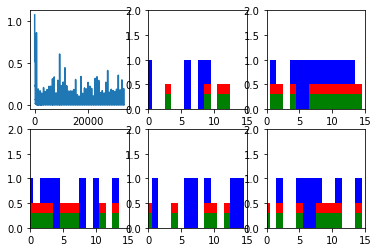

Step 300 Loss 7.14935e-05


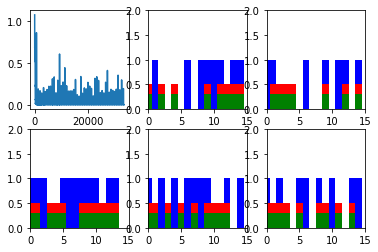

Step 400 Loss 6.54257e-05


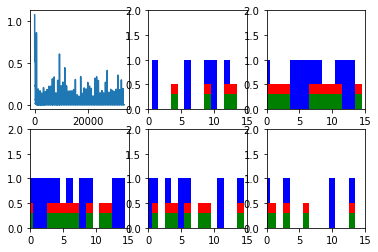

Step 500 Loss 6.63361e-05


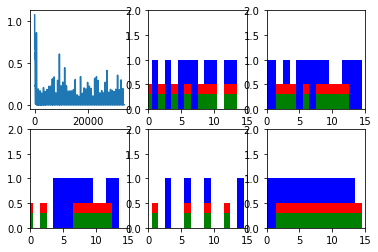

Step 600 Loss 6.48028e-05


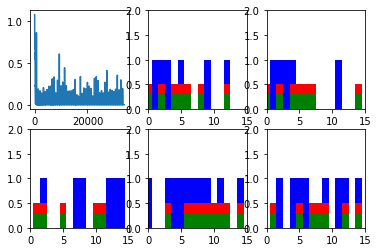

New data, epoch 51
Step 0 Loss 0.353748


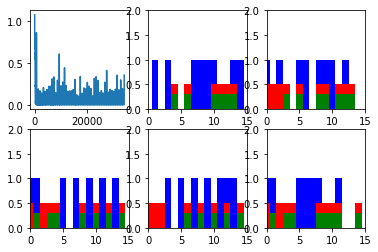

Step 100 Loss 6.11471e-05


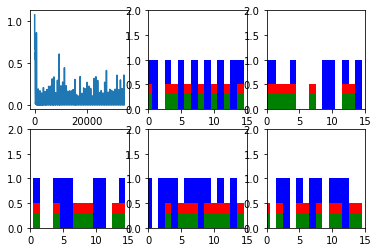

Step 200 Loss 5.17864e-05


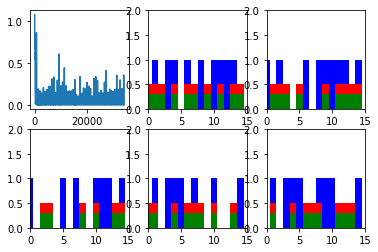

Step 300 Loss 8.39553e-05


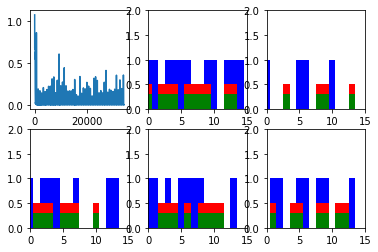

Step 400 Loss 6.36021e-05


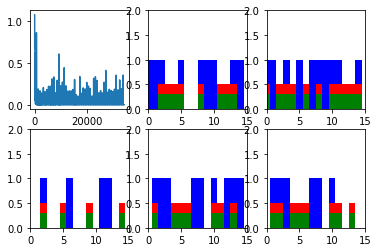

Step 500 Loss 8.304e-05


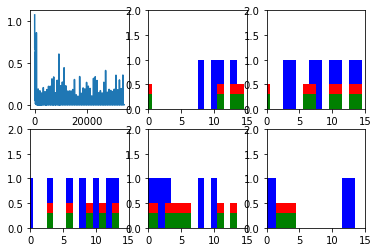

Step 600 Loss 6.42258e-05


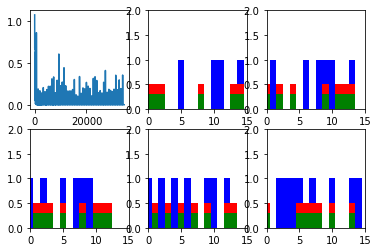

New data, epoch 52
Step 0 Loss 0.347465


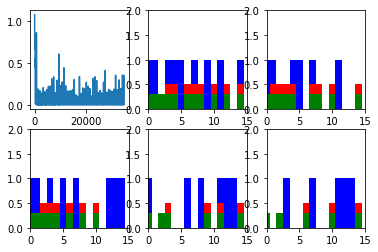

Step 100 Loss 6.83499e-05


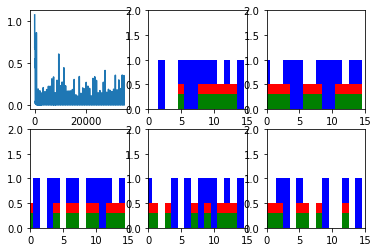

Step 200 Loss 5.91339e-05


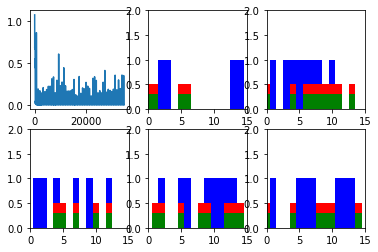

Step 300 Loss 6.30305e-05


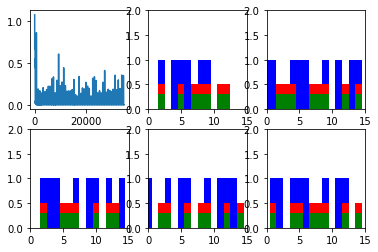

Step 400 Loss 6.71391e-05


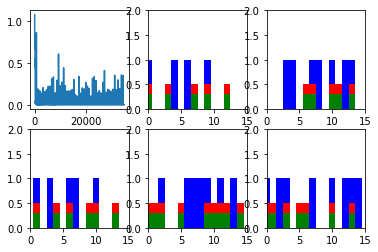

Step 500 Loss 7.89847e-05


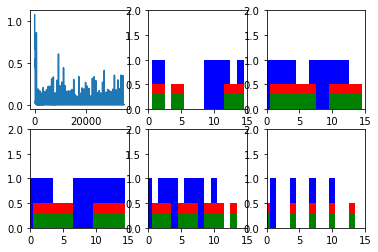

Step 600 Loss 6.2823e-05


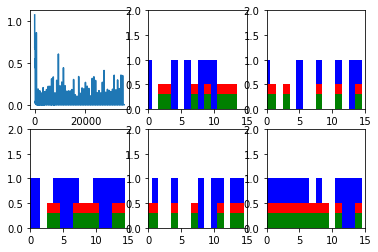

New data, epoch 53
Step 0 Loss 0.182313


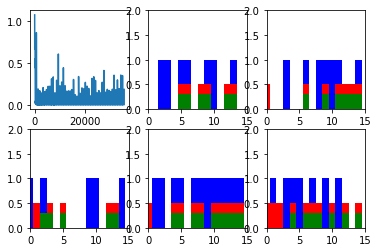

Step 100 Loss 6.59972e-05


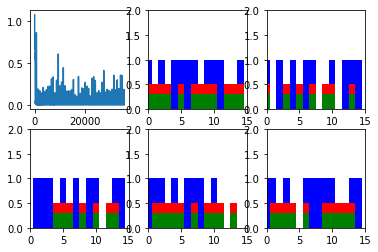

Step 200 Loss 6.81621e-05


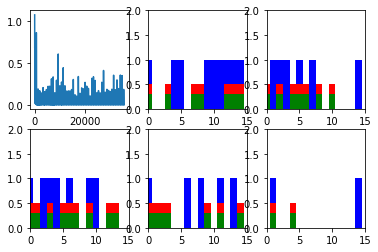

Step 300 Loss 5.27459e-05


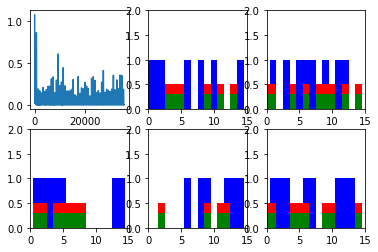

Step 400 Loss 7.22281e-05


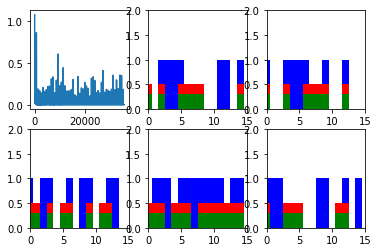

Step 500 Loss 5.79802e-05


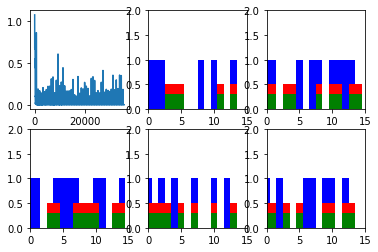

Step 600 Loss 5.96119e-05


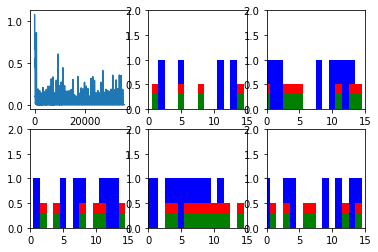

New data, epoch 54
Step 0 Loss 0.163043


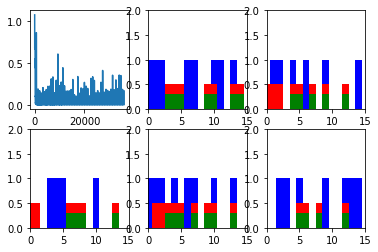

Step 100 Loss 5.07912e-05


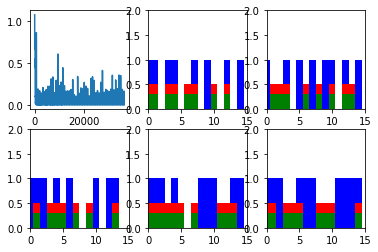

Step 200 Loss 4.4968e-05


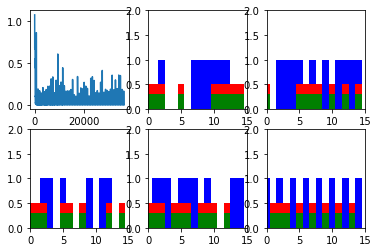

Step 300 Loss 6.54582e-05


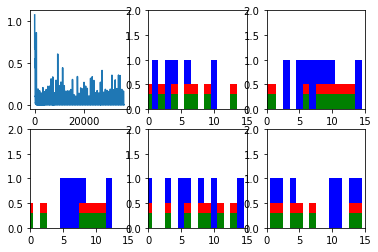

Step 400 Loss 5.5992e-05


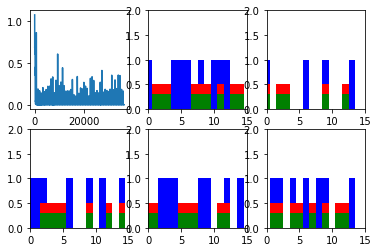

Step 500 Loss 5.57248e-05


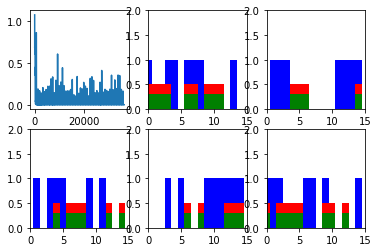

Step 600 Loss 6.04238e-05


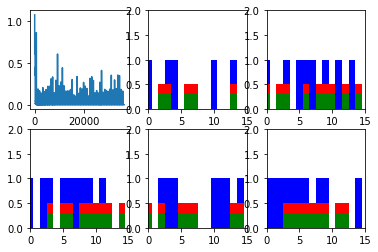

New data, epoch 55
Step 0 Loss 0.287925


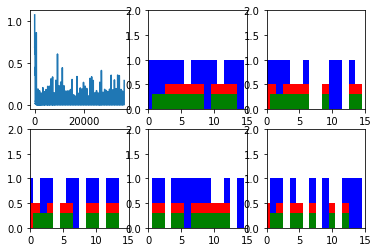

Step 100 Loss 7.91842e-05


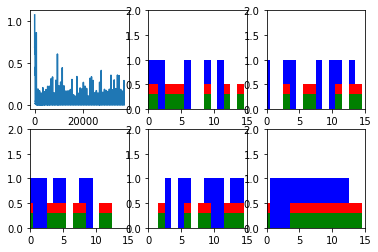

Step 200 Loss 7.0622e-05


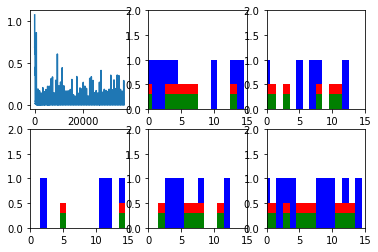

Step 300 Loss 6.63831e-05


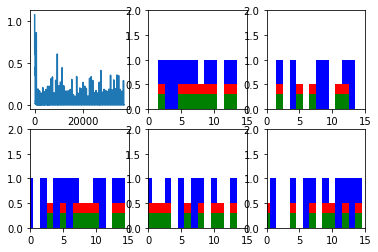

Step 400 Loss 6.91541e-05


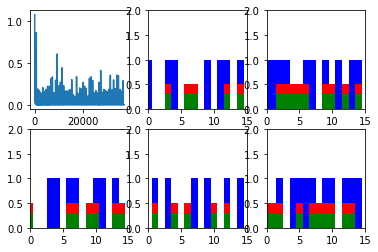

Step 500 Loss 6.604e-05


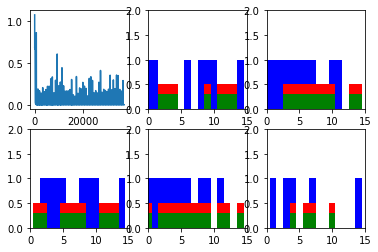

Step 600 Loss 7.13081e-05


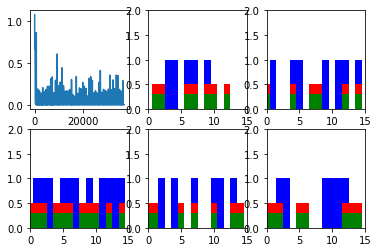

New data, epoch 56
Step 0 Loss 0.280532


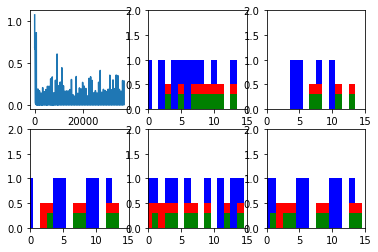

Step 100 Loss 6.45747e-05


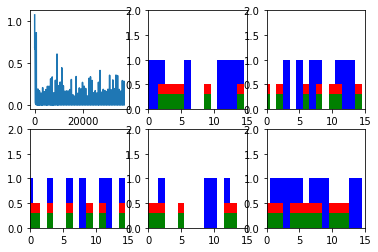

Step 200 Loss 6.26892e-05


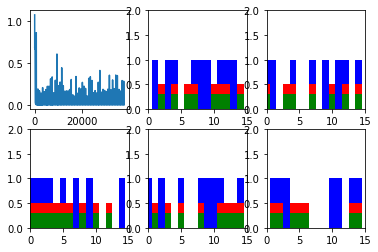

Step 300 Loss 6.48387e-05


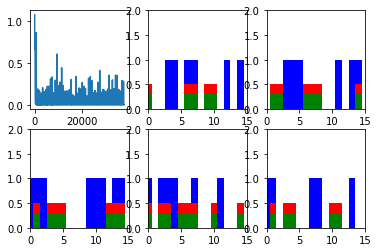

Step 400 Loss 5.96899e-05


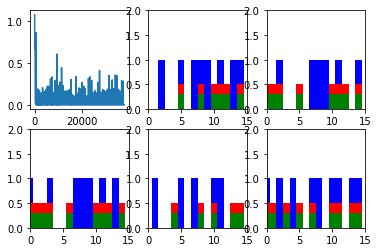

Step 500 Loss 6.31845e-05


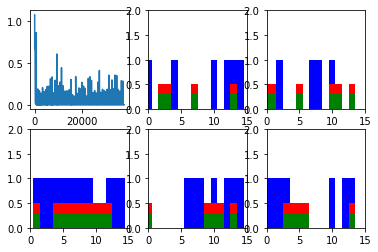

Step 600 Loss 6.62666e-05


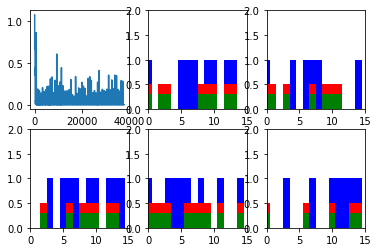

New data, epoch 57
Step 0 Loss 0.176732


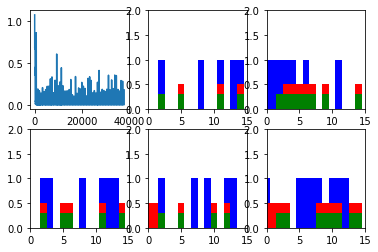

Step 100 Loss 7.71427e-05


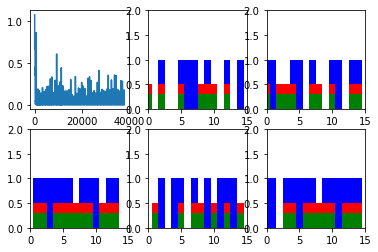

Step 200 Loss 5.79926e-05


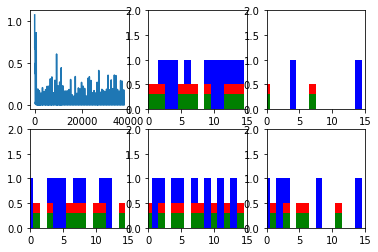

Step 300 Loss 6.61785e-05


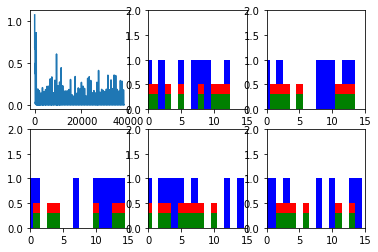

Step 400 Loss 6.30223e-05


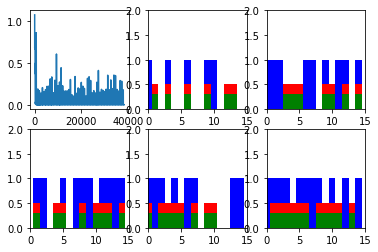

Step 500 Loss 7.10873e-05


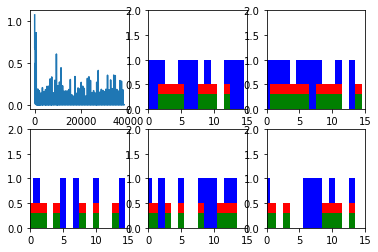

Step 600 Loss 5.27921e-05


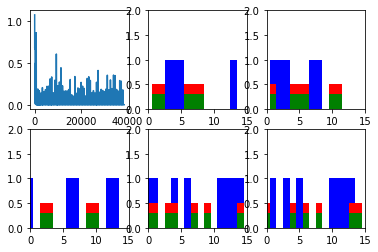

New data, epoch 58
Step 0 Loss 0.163352


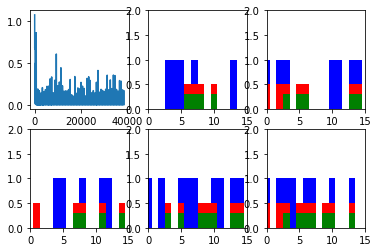

Step 100 Loss 5.87028e-05


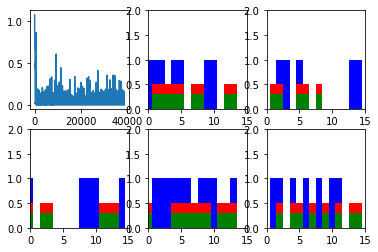

Step 200 Loss 5.14355e-05


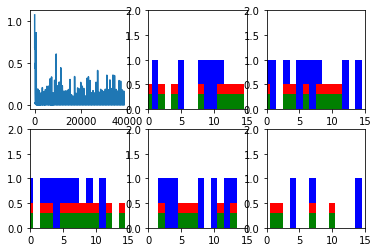

Step 300 Loss 4.6281e-05


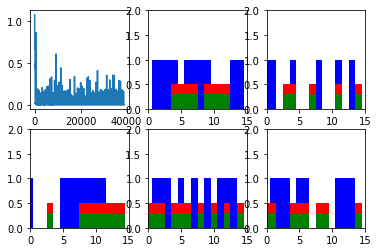

Step 400 Loss 5.73048e-05


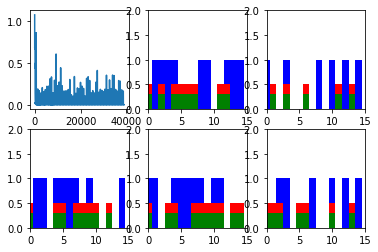

Step 500 Loss 5.87458e-05


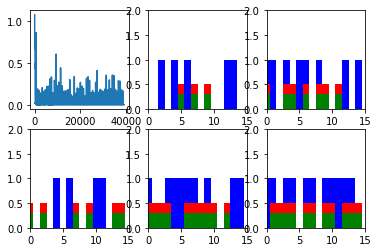

Step 600 Loss 5.37082e-05


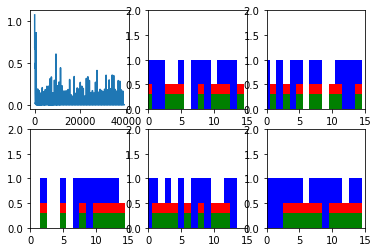

New data, epoch 59
Step 0 Loss 0.222389


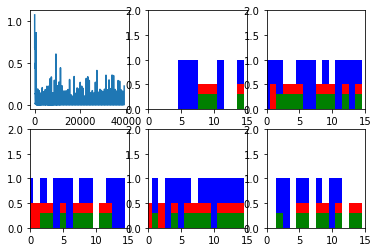

Step 100 Loss 6.1353e-05


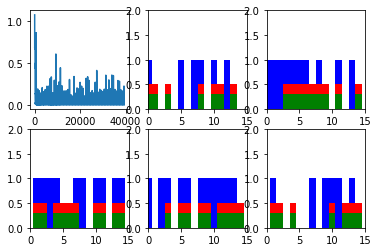

Step 200 Loss 5.933e-05


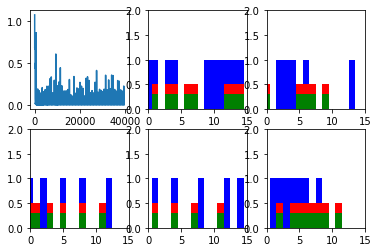

Step 300 Loss 6.21867e-05


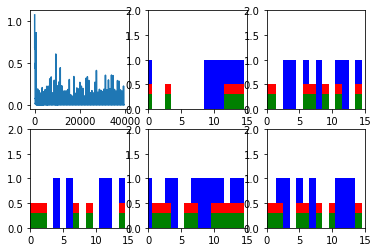

Step 400 Loss 6.53094e-05


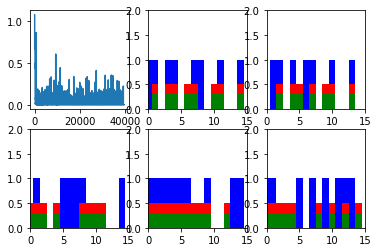

Step 500 Loss 4.4676e-05


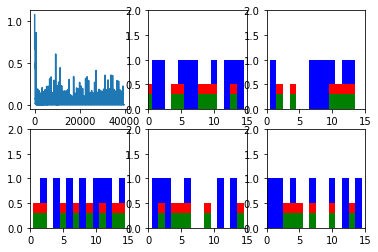

Step 600 Loss 4.7036e-05


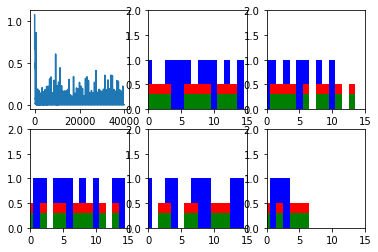

New data, epoch 60
Step 0 Loss 0.231439


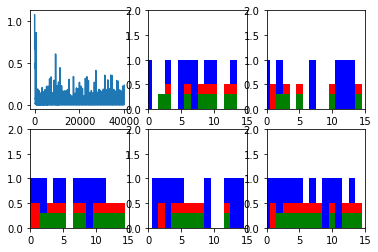

Step 100 Loss 7.60707e-05


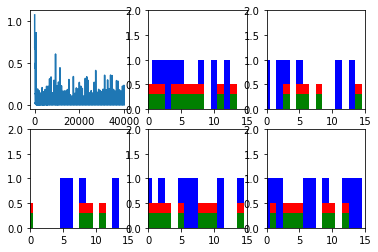

Step 200 Loss 7.43184e-05


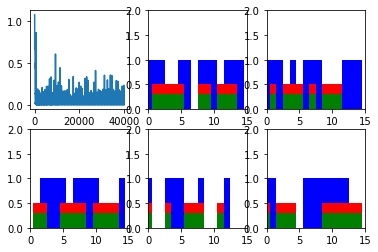

Step 300 Loss 7.02238e-05


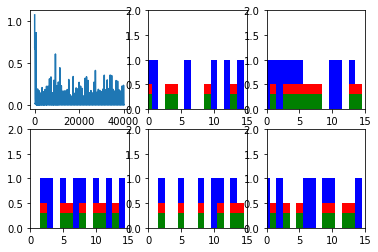

Step 400 Loss 7.85981e-05


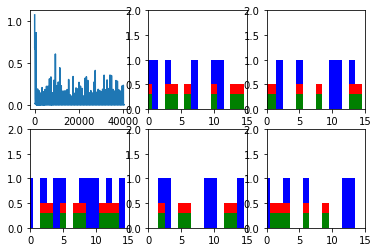

Step 500 Loss 7.9271e-05


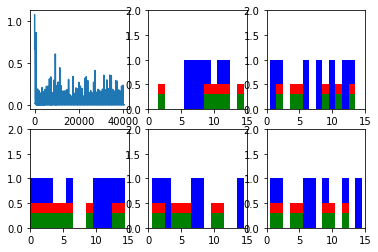

Step 600 Loss 6.82688e-05


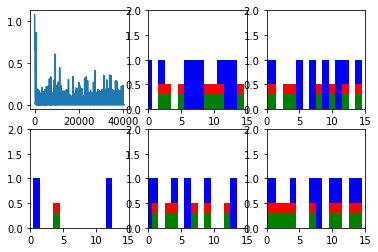

New data, epoch 61
Step 0 Loss 0.282176


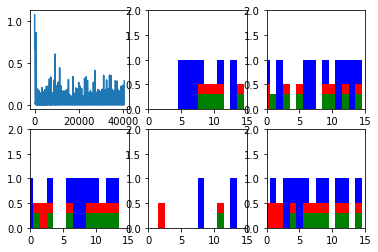

Step 100 Loss 6.60766e-05


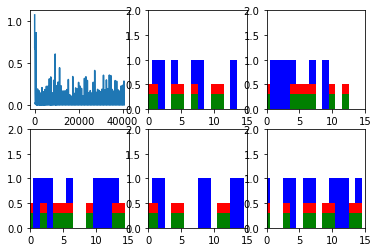

Step 200 Loss 5.44501e-05


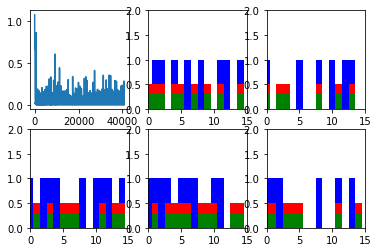

Step 300 Loss 6.15786e-05


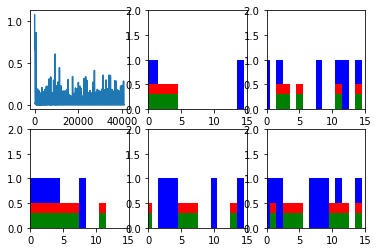

Step 400 Loss 7.65935e-05


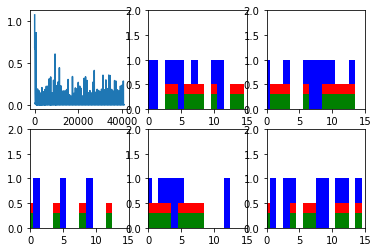

Step 500 Loss 5.68691e-05


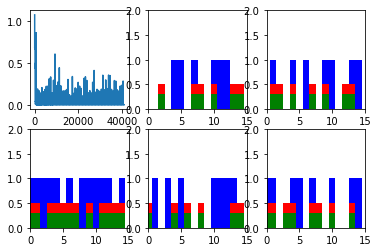

Step 600 Loss 5.60155e-05


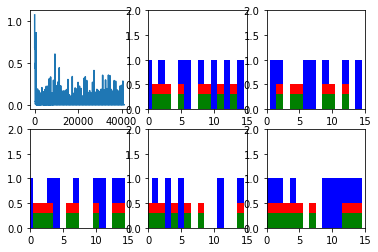

New data, epoch 62
Step 0 Loss 0.398481


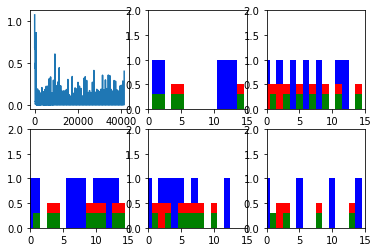

Step 100 Loss 8.43045e-05


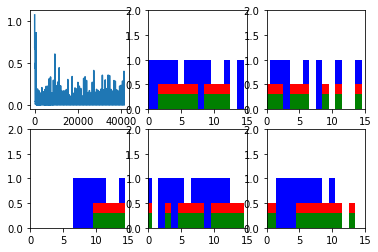

Step 200 Loss 6.83014e-05


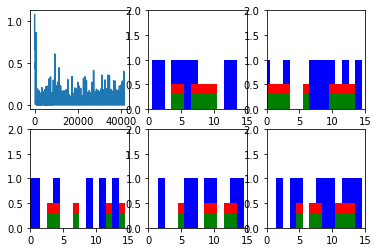

Step 300 Loss 7.33699e-05


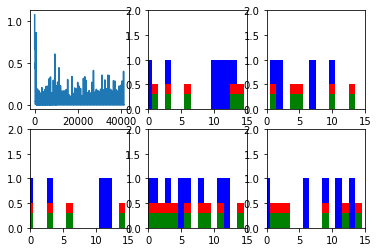

Step 400 Loss 6.80611e-05


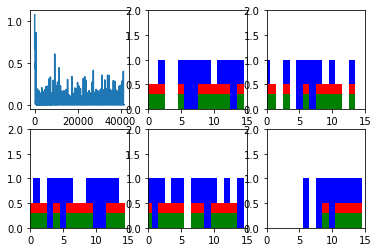

Step 500 Loss 5.18572e-05


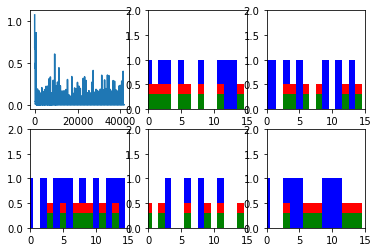

Step 600 Loss 6.01025e-05


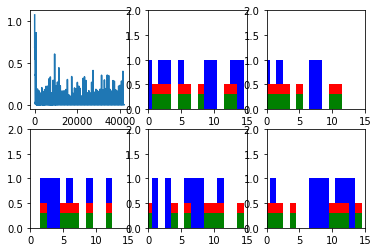

New data, epoch 63
Step 0 Loss 0.135307


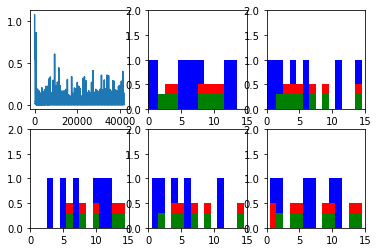

Step 100 Loss 6.96166e-05


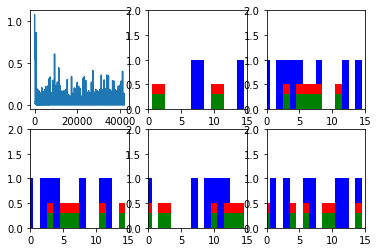

Step 200 Loss 5.71261e-05


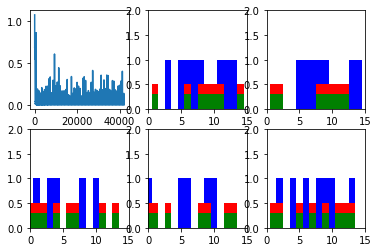

Step 300 Loss 5.52865e-05


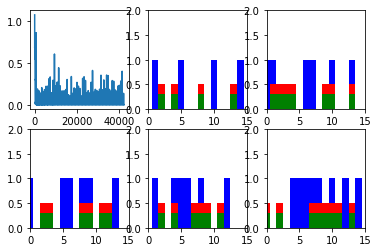

Step 400 Loss 6.40624e-05


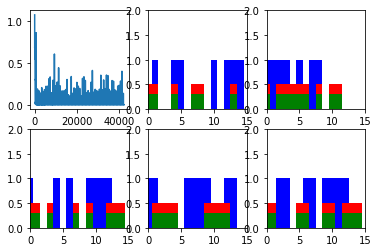

Step 500 Loss 5.28845e-05


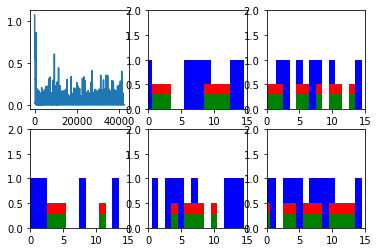

Step 600 Loss 8.90308e-05


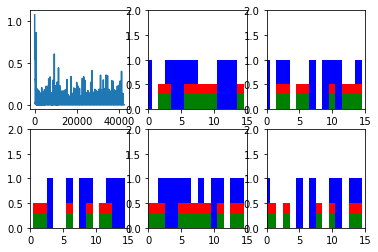

New data, epoch 64
Step 0 Loss 0.267879


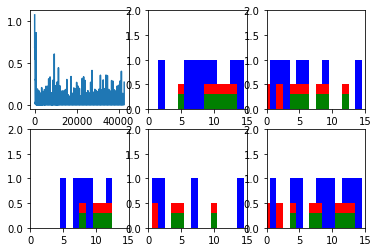

Step 100 Loss 5.45991e-05


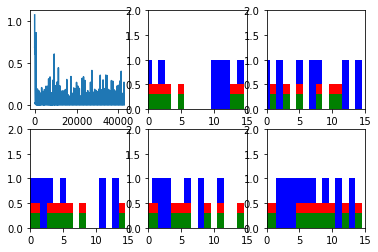

Step 200 Loss 7.16343e-05


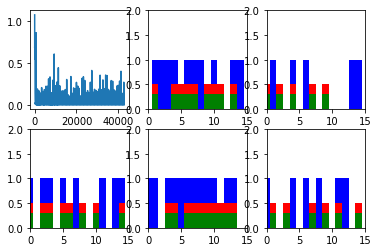

Step 300 Loss 7.91693e-05


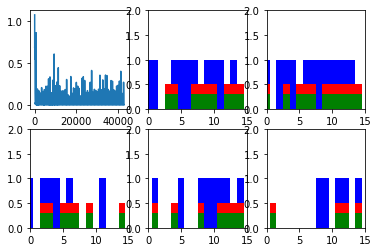

Step 400 Loss 6.0799e-05


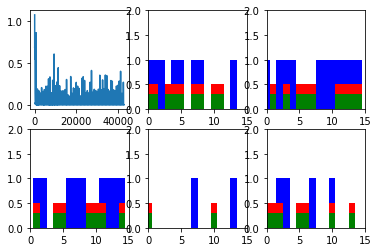

Step 500 Loss 6.19667e-05


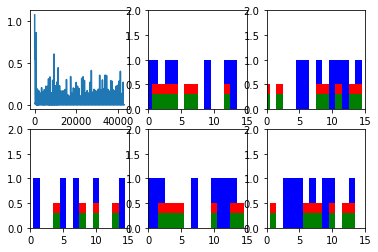

Step 600 Loss 5.87346e-05


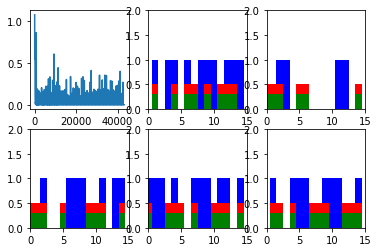

New data, epoch 65
Step 0 Loss 0.288019


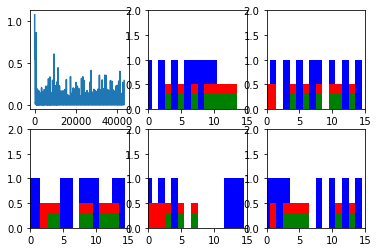

Step 100 Loss 7.10767e-05


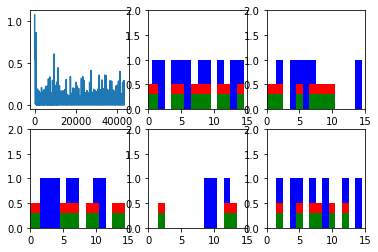

Step 200 Loss 5.50305e-05


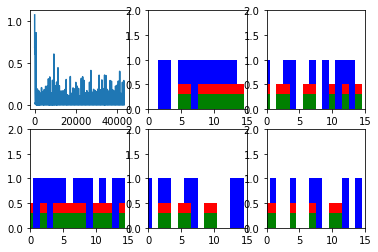

Step 300 Loss 7.03516e-05


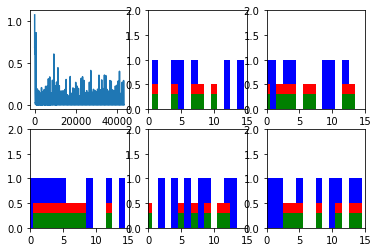

Step 400 Loss 6.39615e-05


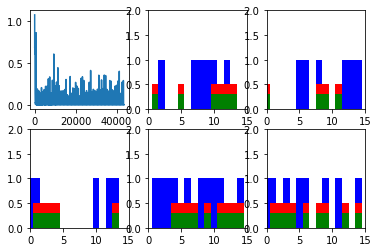

Step 500 Loss 6.25939e-05


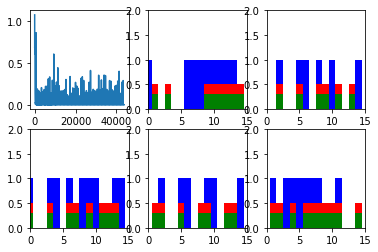

Step 600 Loss 5.95012e-05


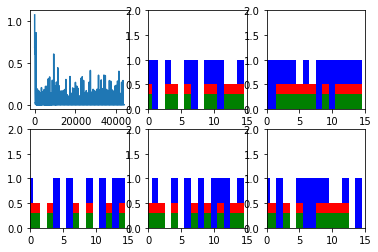

New data, epoch 66
Step 0 Loss 0.129842


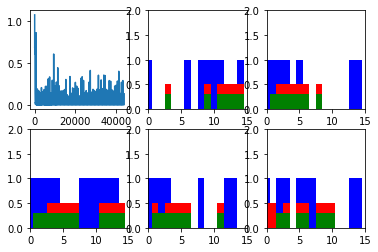

Step 100 Loss 5.35792e-05


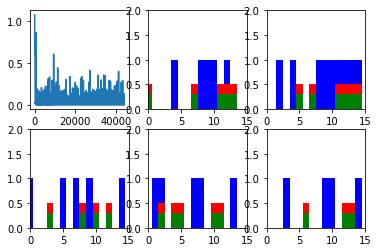

Step 200 Loss 5.30302e-05


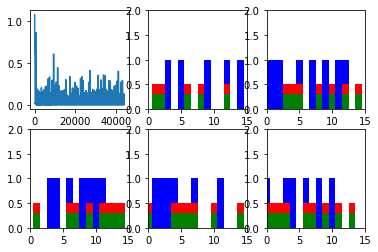

Step 300 Loss 5.56994e-05


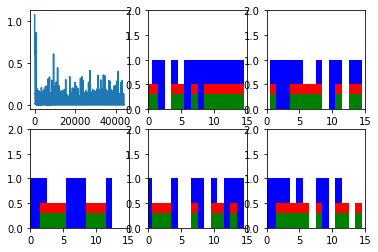

Step 400 Loss 6.21359e-05


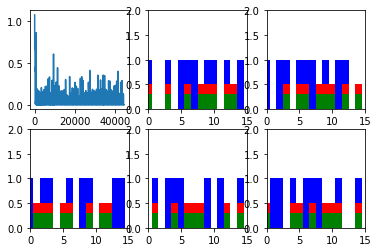

Step 500 Loss 6.02086e-05


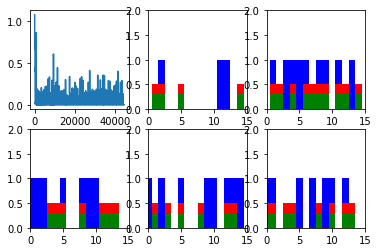

Step 600 Loss 5.52658e-05


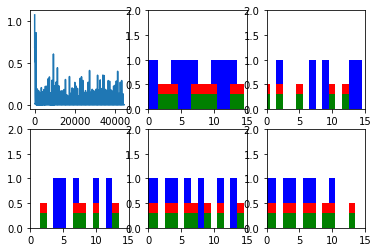

New data, epoch 67
Step 0 Loss 0.346257


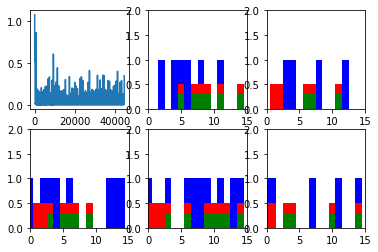

Step 100 Loss 4.77591e-05


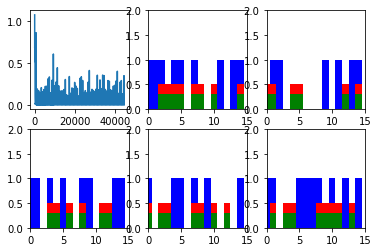

Step 200 Loss 5.76953e-05


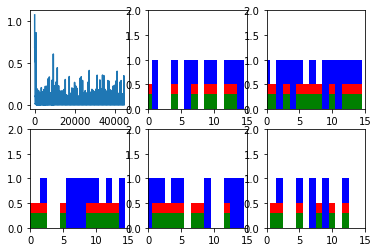

Step 300 Loss 5.72119e-05


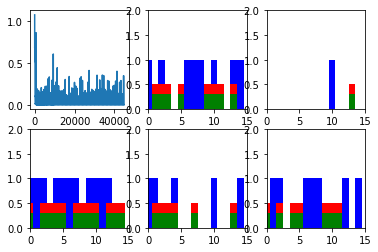

Step 400 Loss 6.69119e-05


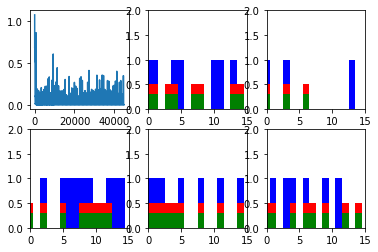

Step 500 Loss 4.91397e-05


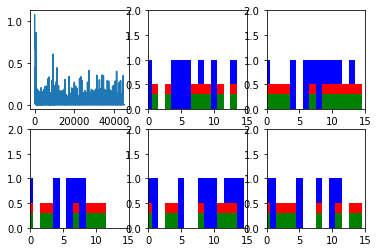

Step 600 Loss 5.35536e-05


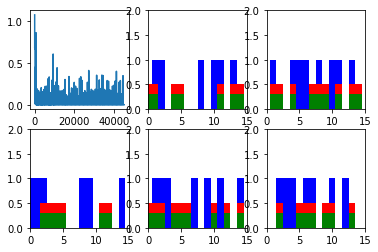

New data, epoch 68
Step 0 Loss 0.156423


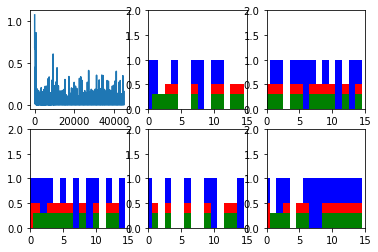

Step 100 Loss 5.99386e-05


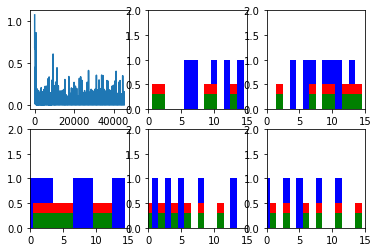

Step 200 Loss 8.14121e-05


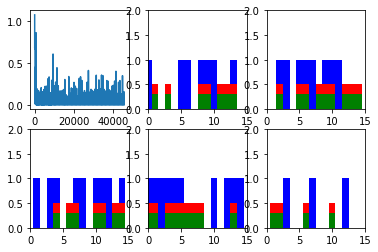

Step 300 Loss 5.68672e-05


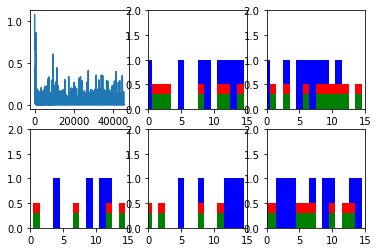

Step 400 Loss 7.11428e-05


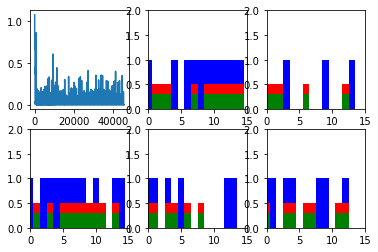

Step 500 Loss 6.84857e-05


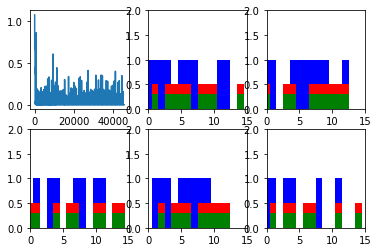

Step 600 Loss 5.08774e-05


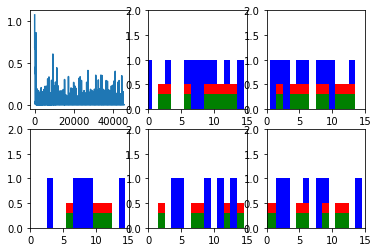

New data, epoch 69
Step 0 Loss 0.367932


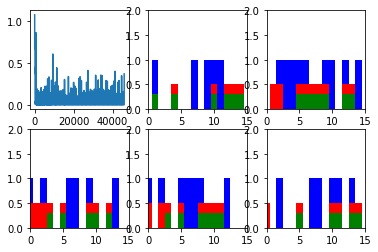

Step 100 Loss 6.10646e-05


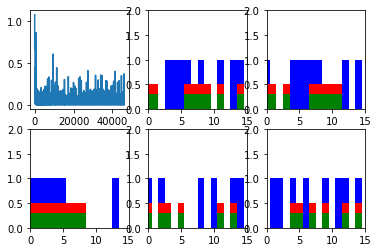

Step 200 Loss 5.93182e-05


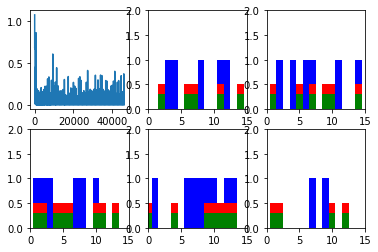

Step 300 Loss 6.07737e-05


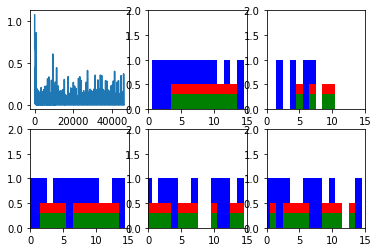

Step 400 Loss 5.33941e-05


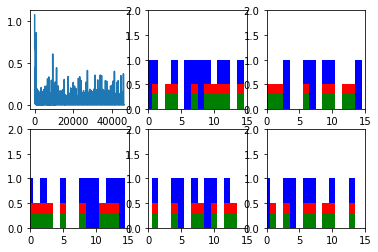

Step 500 Loss 5.16998e-05


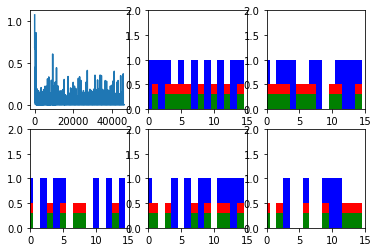

Step 600 Loss 5.59027e-05


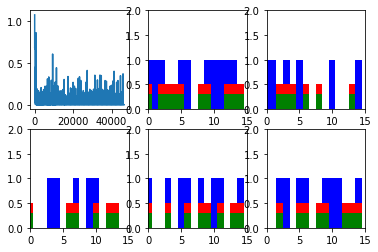

New data, epoch 70
Step 0 Loss 0.243568


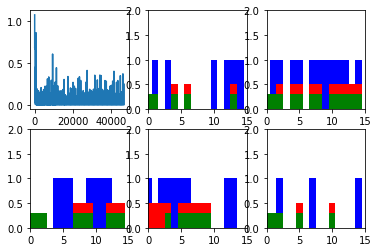

Step 100 Loss 5.08999e-05


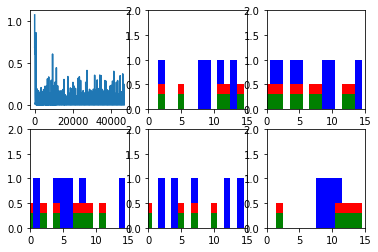

Step 200 Loss 5.23509e-05


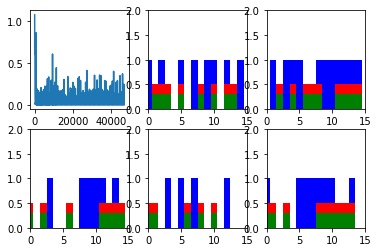

Step 300 Loss 5.52706e-05


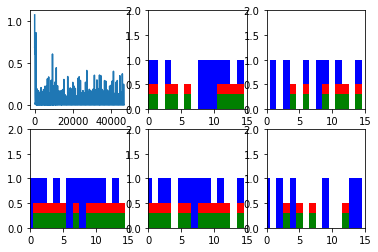

Step 400 Loss 5.01037e-05


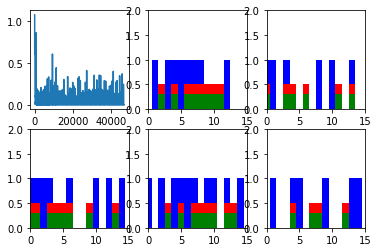

Step 500 Loss 3.97173e-05


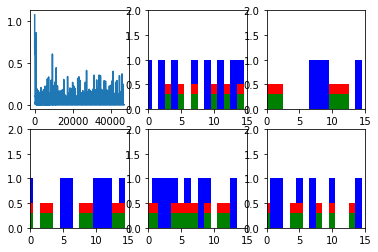

Step 600 Loss 5.36272e-05


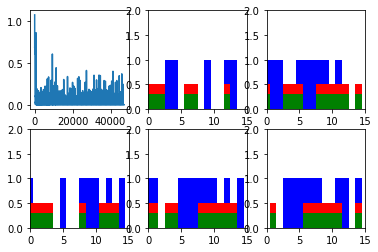

New data, epoch 71
Step 0 Loss 0.132964


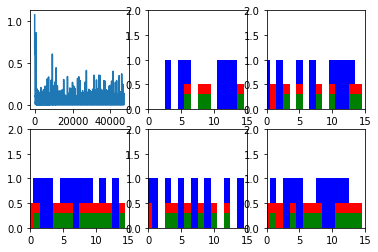

Step 100 Loss 5.51381e-05


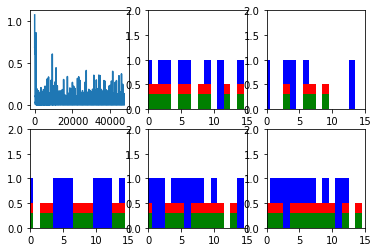

Step 200 Loss 5.35425e-05


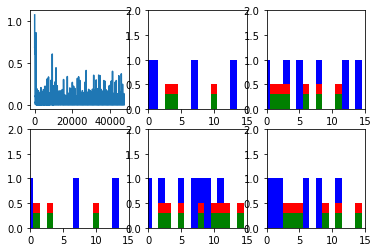

Step 300 Loss 3.73077e-05


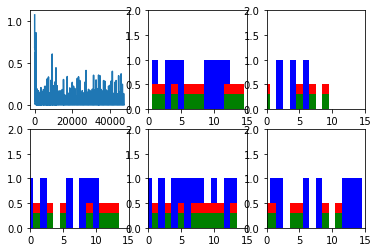

Step 400 Loss 4.67258e-05


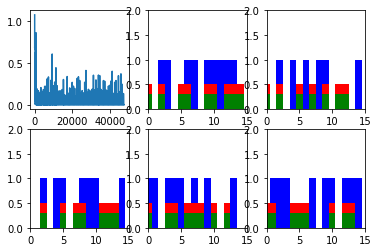

Step 500 Loss 4.99291e-05


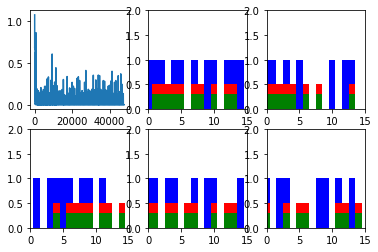

Step 600 Loss 4.54055e-05


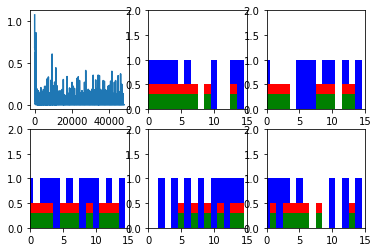

New data, epoch 72
Step 0 Loss 0.179711


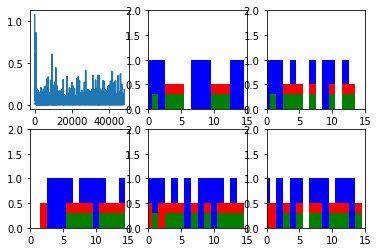

Step 100 Loss 5.0869e-05


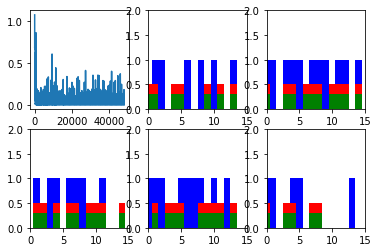

Step 200 Loss 5.27213e-05


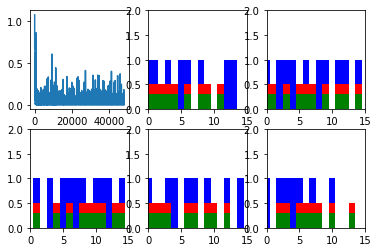

Step 300 Loss 5.64188e-05


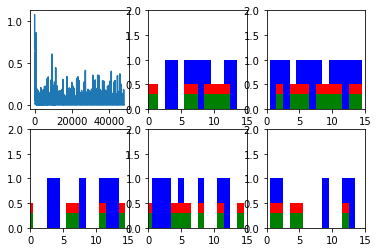

Step 400 Loss 6.46114e-05


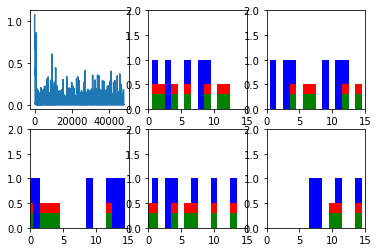

Step 500 Loss 5.82471e-05


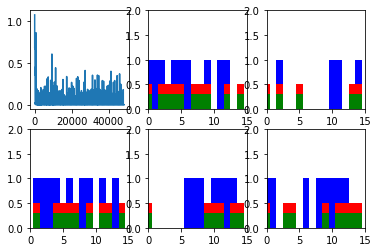

Step 600 Loss 5.68988e-05


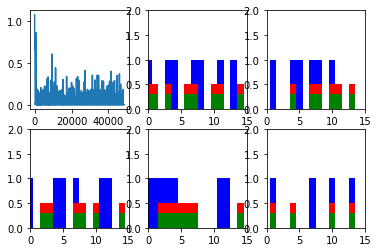

New data, epoch 73
Step 0 Loss 0.148336


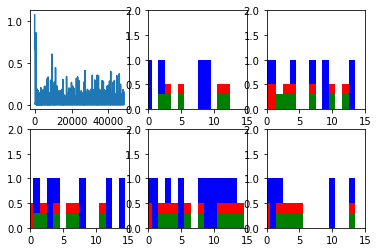

Step 100 Loss 5.0903e-05


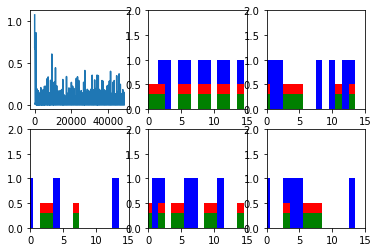

Step 200 Loss 4.4994e-05


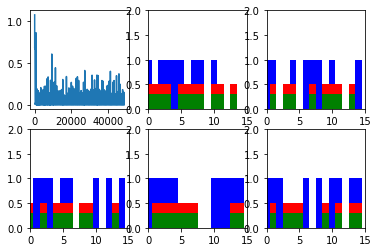

Step 300 Loss 4.56362e-05


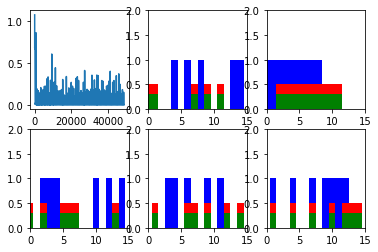

Step 400 Loss 5.62014e-05


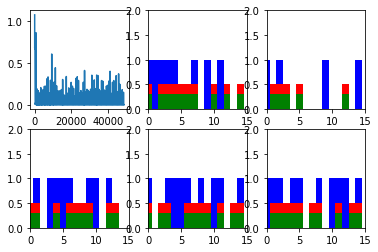

Step 500 Loss 4.96982e-05


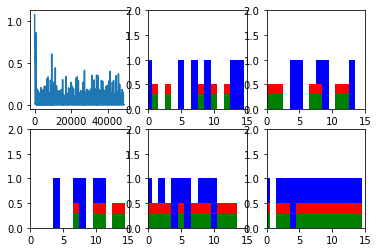

Step 600 Loss 4.39657e-05


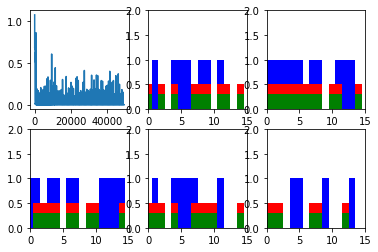

New data, epoch 74
Step 0 Loss 0.237479


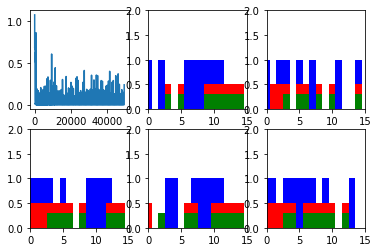

Step 100 Loss 9.41841e-05


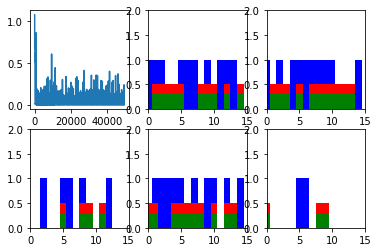

Step 200 Loss 5.48427e-05


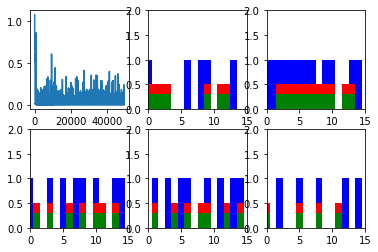

Step 300 Loss 5.11024e-05


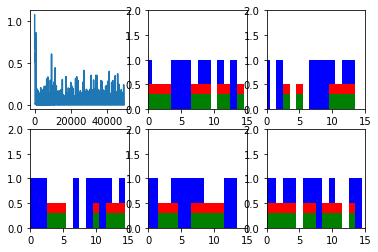

Step 400 Loss 5.54929e-05


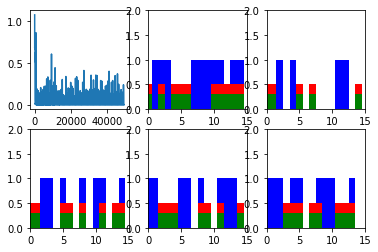

Step 500 Loss 4.9102e-05


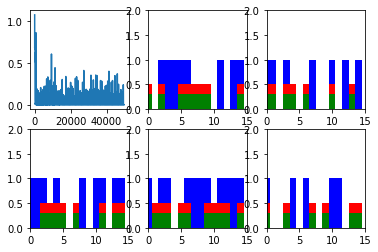

Step 600 Loss 5.70366e-05


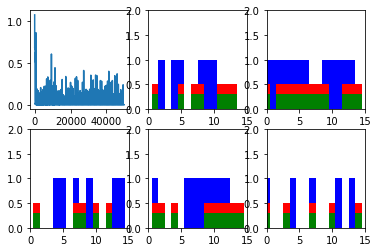

New data, epoch 75
Step 0 Loss 0.318287


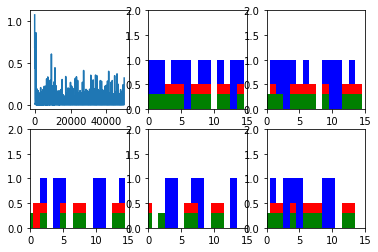

Step 100 Loss 4.82691e-05


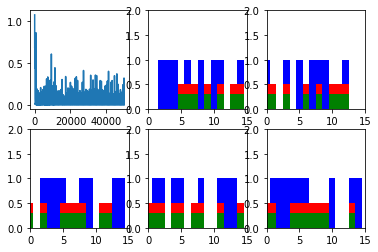

Step 200 Loss 4.46378e-05


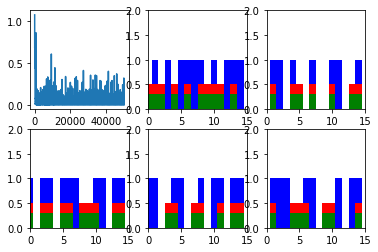

Step 300 Loss 5.5468e-05


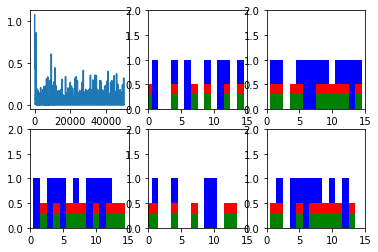

Step 400 Loss 4.7599e-05


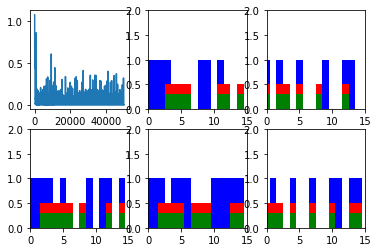

Step 500 Loss 4.953e-05


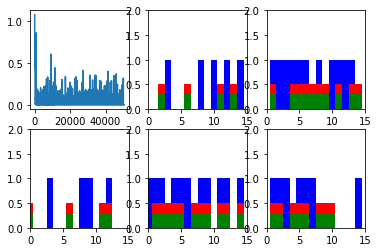

Step 600 Loss 5.77413e-05


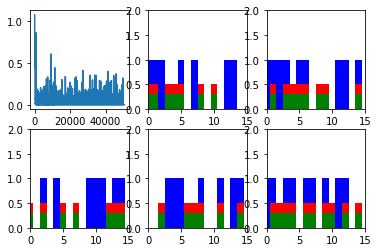

New data, epoch 76
Step 0 Loss 0.162051


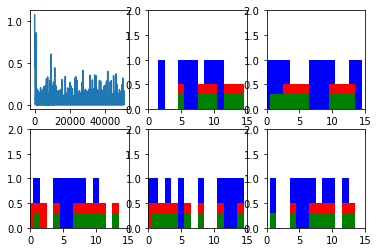

Step 100 Loss 4.94537e-05


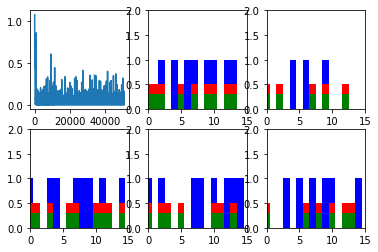

Step 200 Loss 5.07377e-05


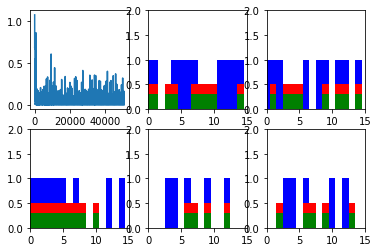

Step 300 Loss 5.43643e-05


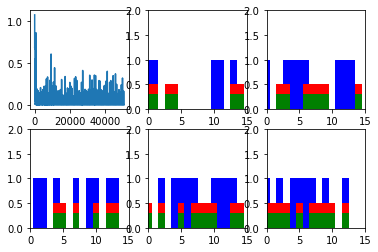

Step 400 Loss 4.43153e-05


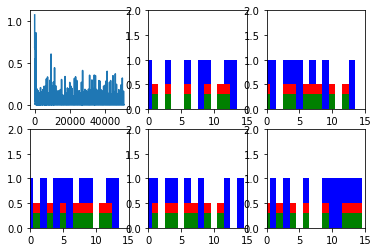

Step 500 Loss 4.11764e-05


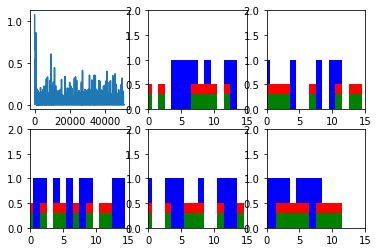

Step 600 Loss 4.86525e-05


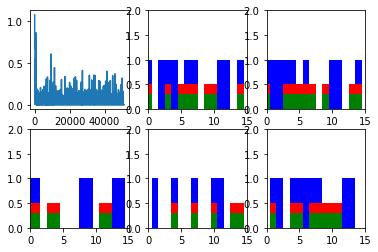

New data, epoch 77
Step 0 Loss 0.125889


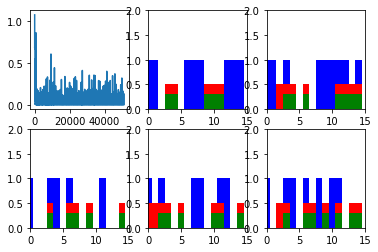

Step 100 Loss 4.2227e-05


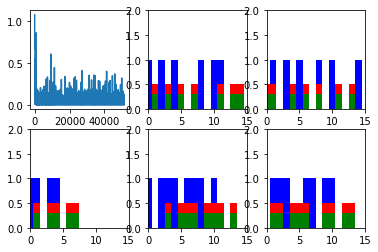

Step 200 Loss 4.06328e-05


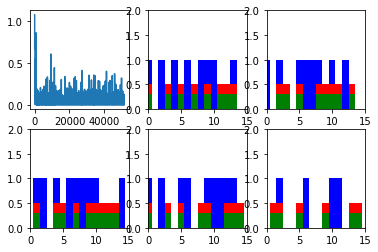

Step 300 Loss 5.27675e-05


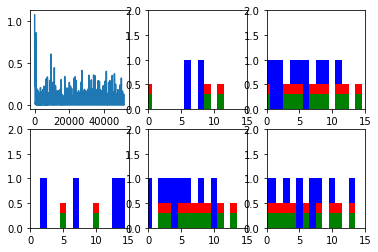

Step 400 Loss 4.82267e-05


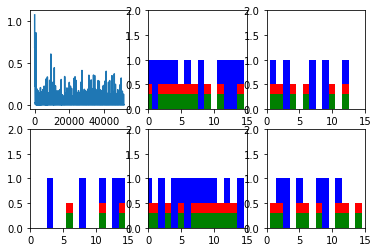

Step 500 Loss 4.4139e-05


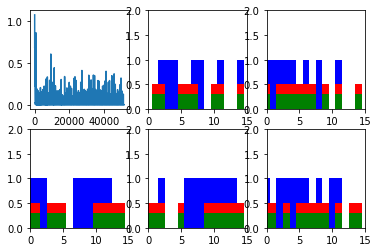

Step 600 Loss 4.80085e-05


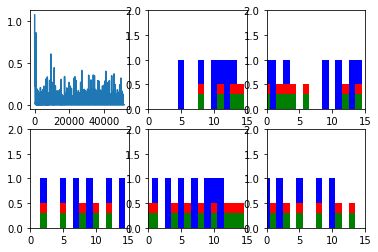

New data, epoch 78
Step 0 Loss 0.222535


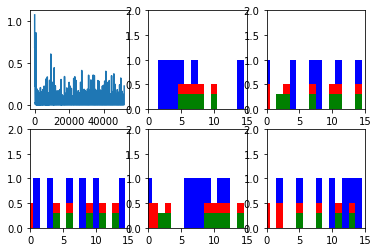

Step 100 Loss 4.60768e-05


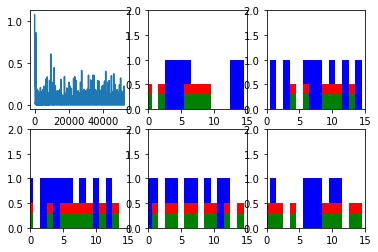

Step 200 Loss 4.66168e-05


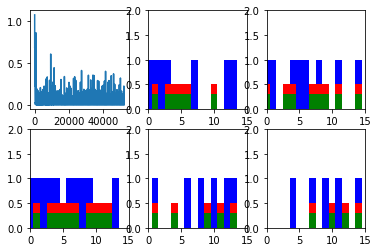

Step 300 Loss 6.77957e-05


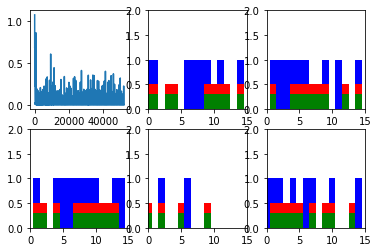

Step 400 Loss 5.28414e-05


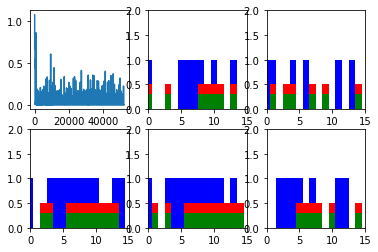

Step 500 Loss 5.37304e-05


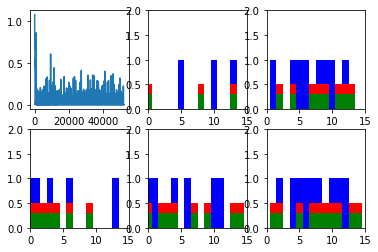

Step 600 Loss 5.03758e-05


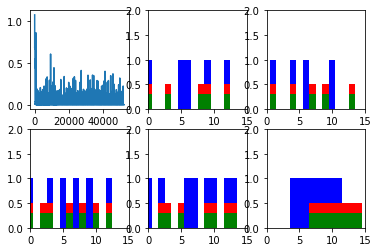

New data, epoch 79
Step 0 Loss 0.161458


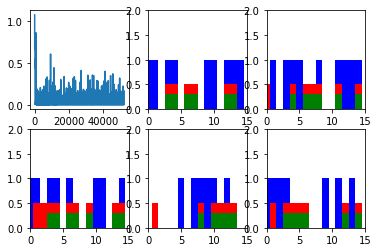

Step 100 Loss 4.89242e-05


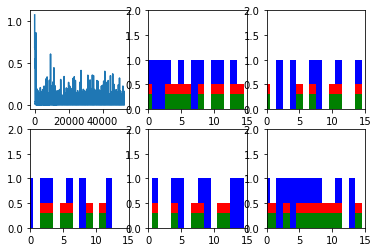

Step 200 Loss 4.16897e-05


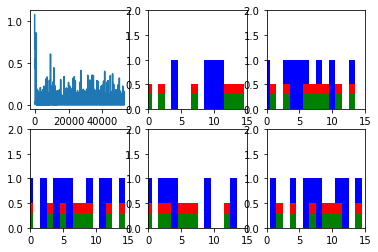

Step 300 Loss 4.35859e-05


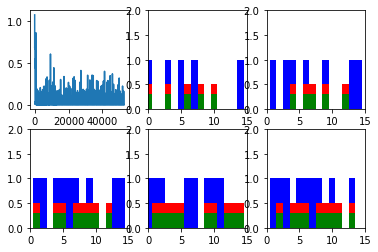

Step 400 Loss 4.58761e-05


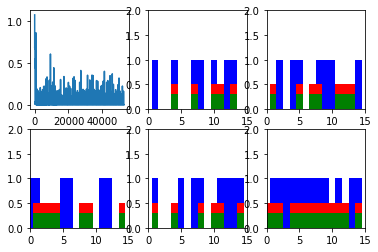

Step 500 Loss 5.19406e-05


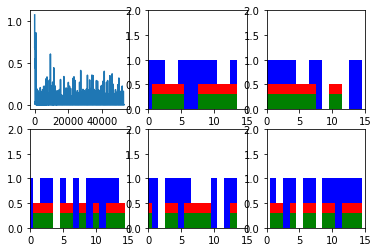

Step 600 Loss 4.18425e-05


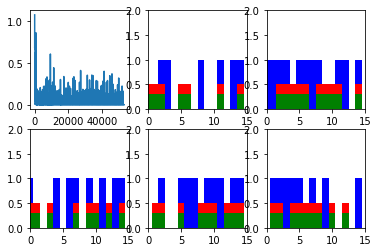

New data, epoch 80
Step 0 Loss 0.131393


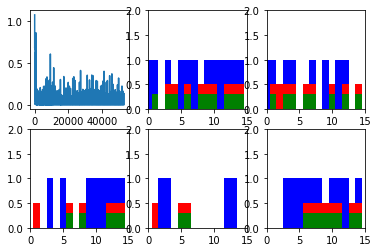

Step 100 Loss 4.50749e-05


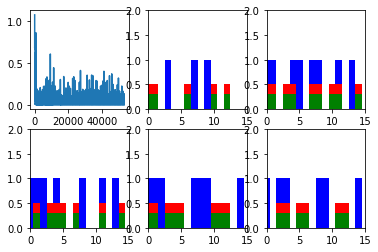

Step 200 Loss 4.04496e-05


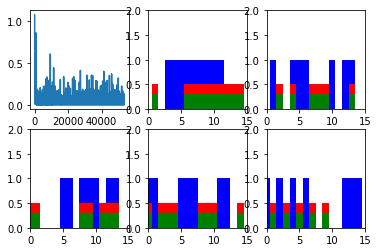

Step 300 Loss 4.89257e-05


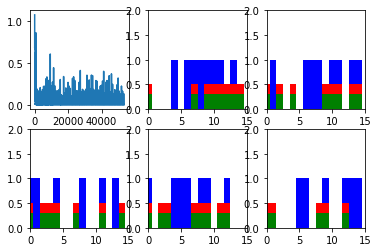

Step 400 Loss 4.59805e-05


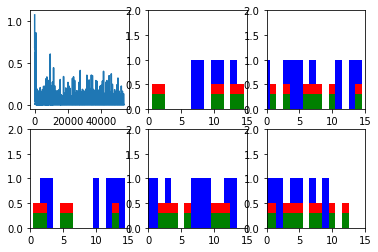

Step 500 Loss 3.94362e-05


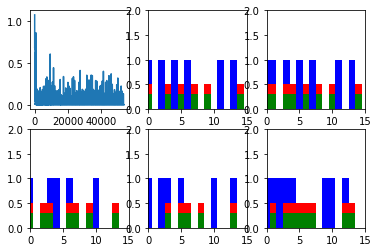

Step 600 Loss 5.18784e-05


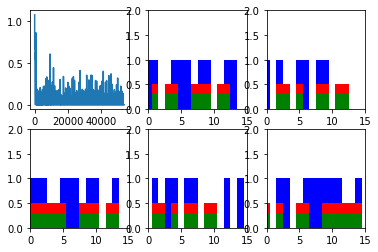

New data, epoch 81
Step 0 Loss 0.177967


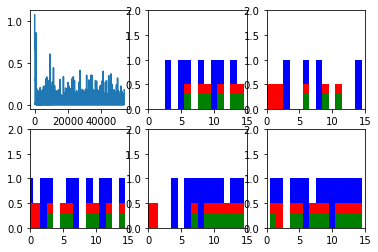

Step 100 Loss 4.18721e-05


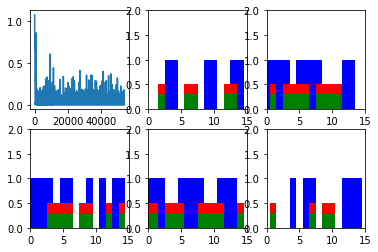

Step 200 Loss 4.64194e-05


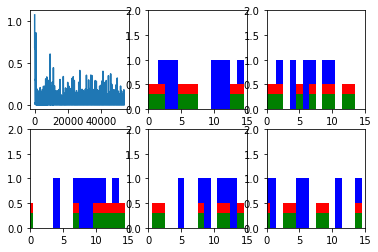

Step 300 Loss 4.73046e-05


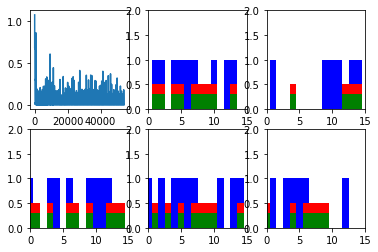

Step 400 Loss 4.6019e-05


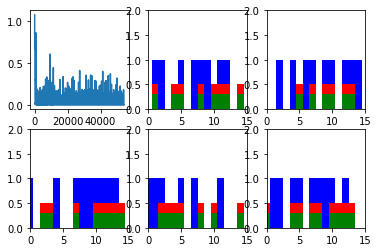

Step 500 Loss 4.45344e-05


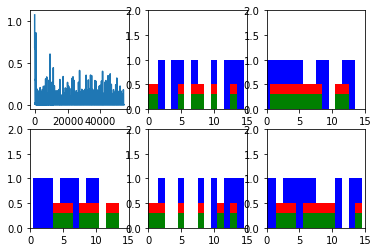

Step 600 Loss 4.38987e-05


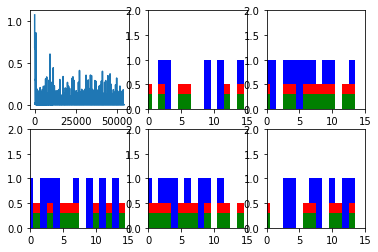

New data, epoch 82
Step 0 Loss 0.218162


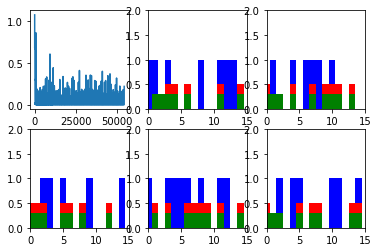

Step 100 Loss 4.39097e-05


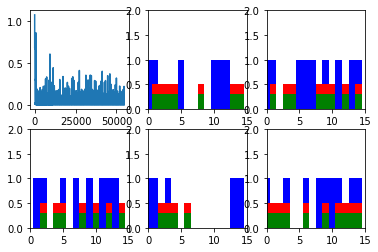

Step 200 Loss 5.53843e-05


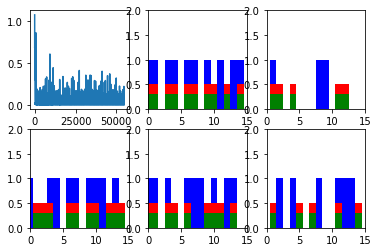

Step 300 Loss 4.82518e-05


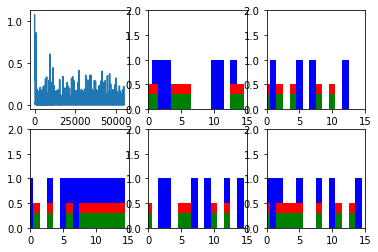

Step 400 Loss 4.77924e-05


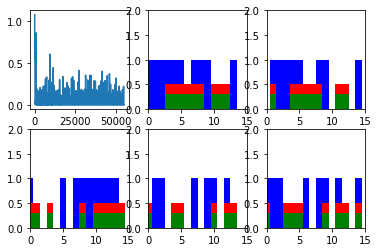

Step 500 Loss 5.25612e-05


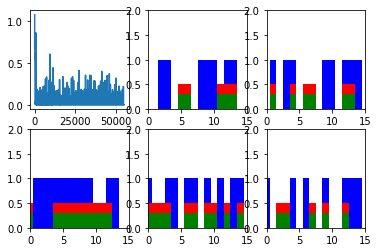

Step 600 Loss 5.15979e-05


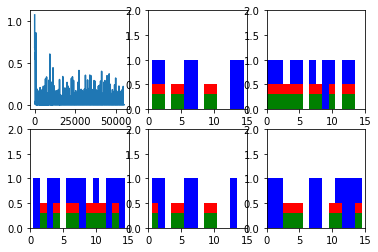

New data, epoch 83
Step 0 Loss 0.191057


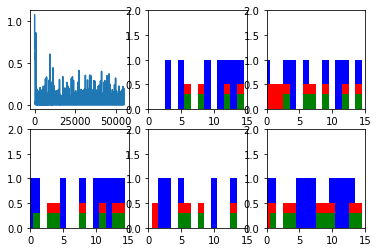

Step 100 Loss 5.36522e-05


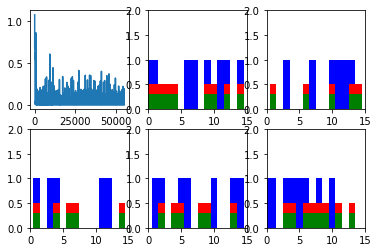

Step 200 Loss 3.69168e-05


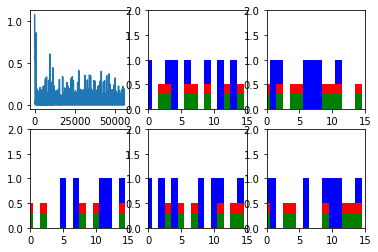

Step 300 Loss 4.326e-05


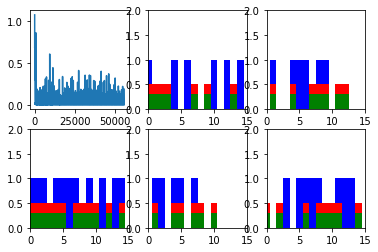

Step 400 Loss 4.47109e-05


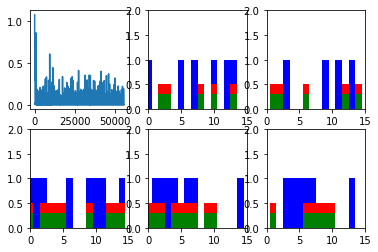

Step 500 Loss 4.01875e-05


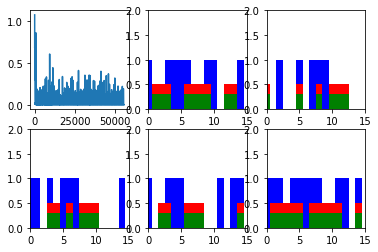

Step 600 Loss 4.21268e-05


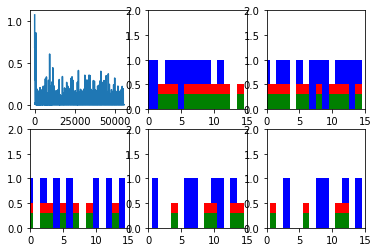

New data, epoch 84
Step 0 Loss 0.231948


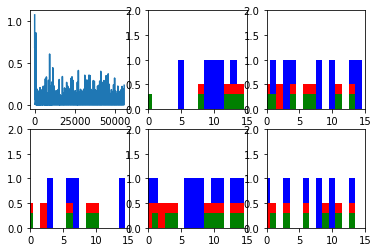

Step 100 Loss 4.17641e-05


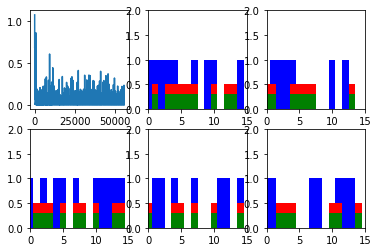

Step 200 Loss 4.37445e-05


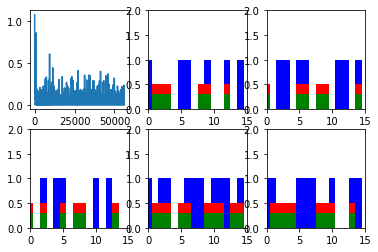

Step 300 Loss 3.64703e-05


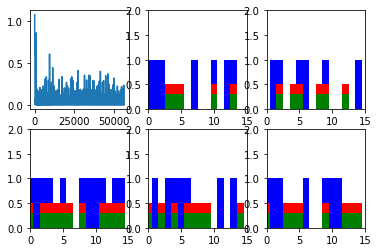

Step 400 Loss 4.52496e-05


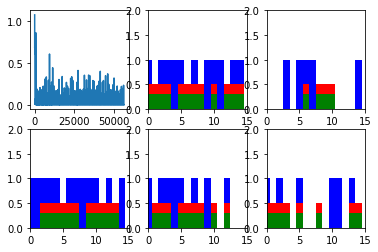

Step 500 Loss 4.90571e-05


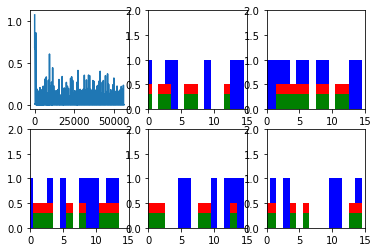

Step 600 Loss 4.17575e-05


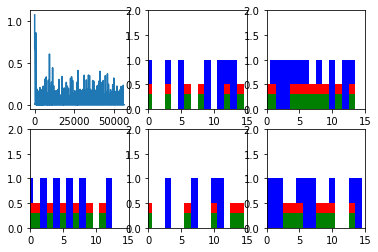

New data, epoch 85
Step 0 Loss 0.203053


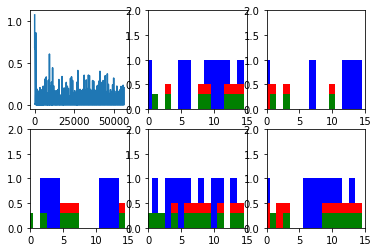

Step 100 Loss 3.86047e-05


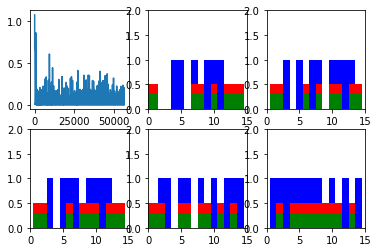

Step 200 Loss 4.33107e-05


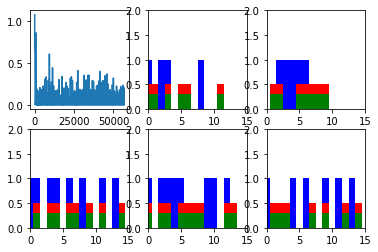

Step 300 Loss 4.29357e-05


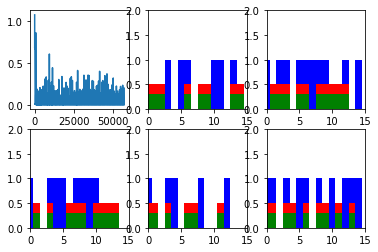

Step 400 Loss 4.02338e-05


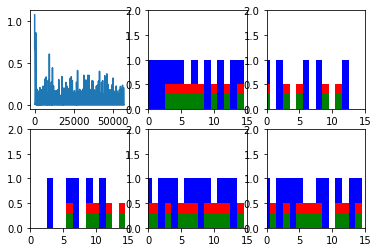

Step 500 Loss 4.66608e-05


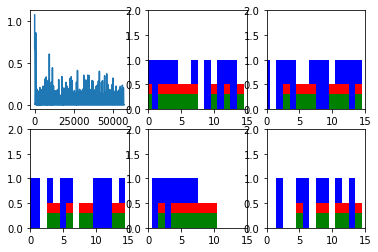

Step 600 Loss 3.46377e-05


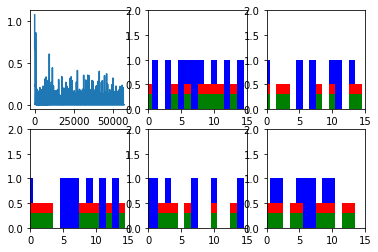

New data, epoch 86
Step 0 Loss 0.204208


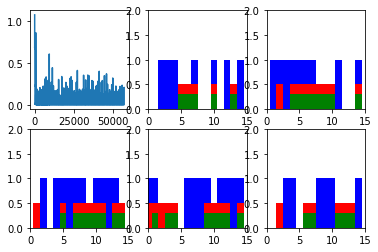

Step 100 Loss 3.90242e-05


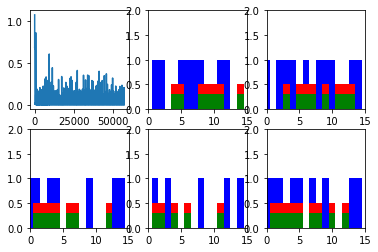

Step 200 Loss 4.6869e-05


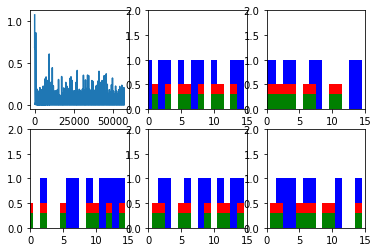

Step 300 Loss 4.25599e-05


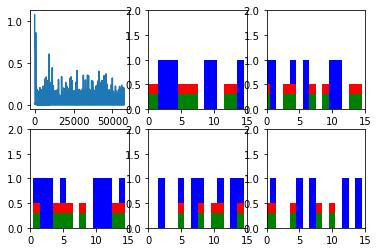

Step 400 Loss 5.18326e-05


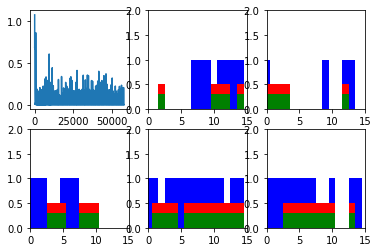

Step 500 Loss 5.00279e-05


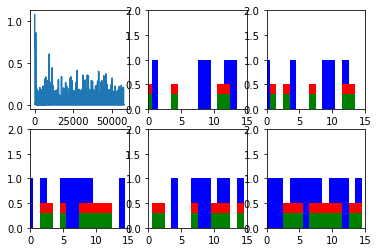

Step 600 Loss 3.78623e-05


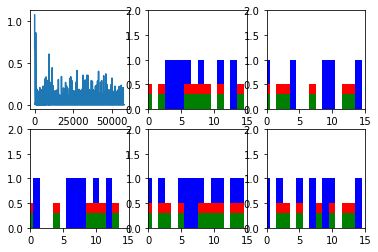

New data, epoch 87
Step 0 Loss 0.296417


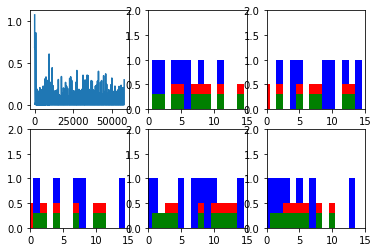

Step 100 Loss 6.40958e-05


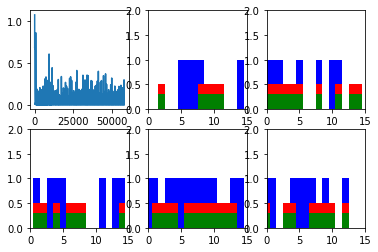

Step 200 Loss 4.60711e-05


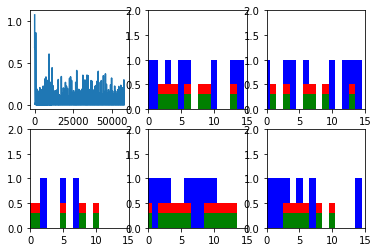

Step 300 Loss 5.49031e-05


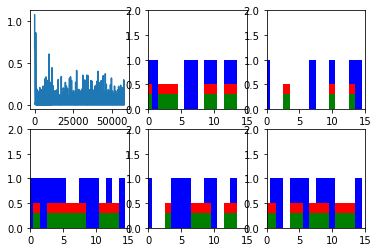

Step 400 Loss 4.61172e-05


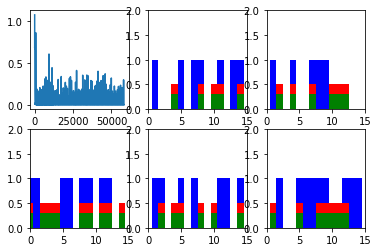

Step 500 Loss 4.18942e-05


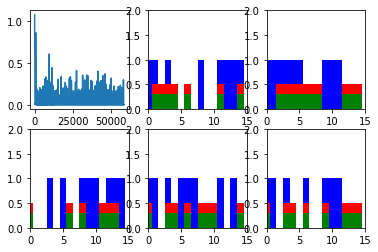

Step 600 Loss 4.416e-05


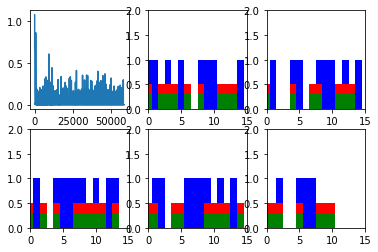

New data, epoch 88
Step 0 Loss 0.176012


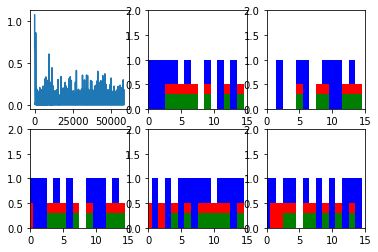

Step 100 Loss 4.18626e-05


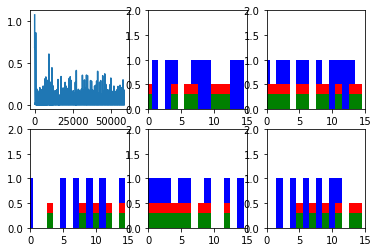

Step 200 Loss 4.64446e-05


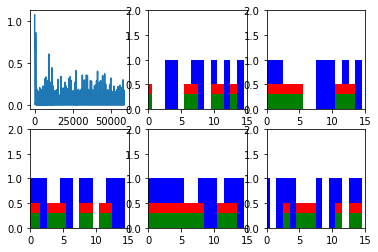

Step 300 Loss 3.76653e-05


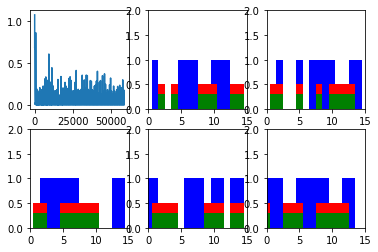

Step 400 Loss 4.46157e-05


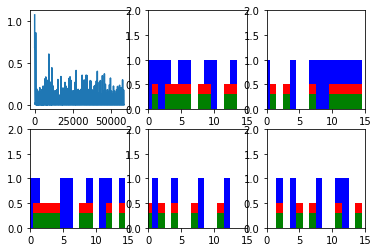

Step 500 Loss 4.4965e-05


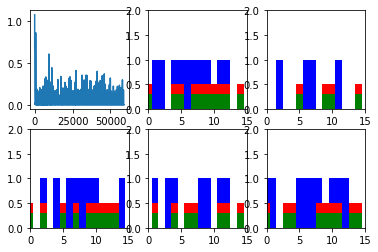

Step 600 Loss 4.29879e-05


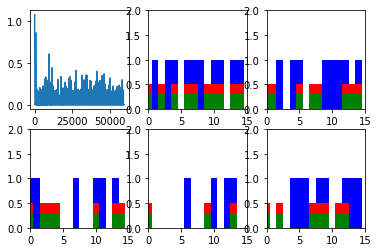

New data, epoch 89
Step 0 Loss 0.152412


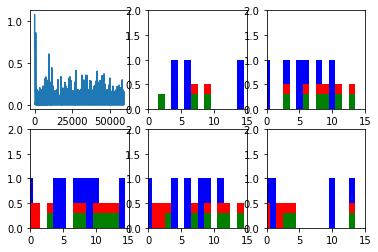

Step 100 Loss 5.23644e-05


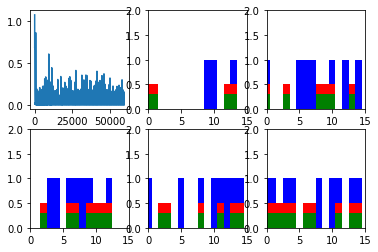

Step 200 Loss 3.31136e-05


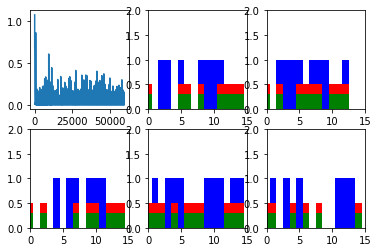

Step 300 Loss 3.60886e-05


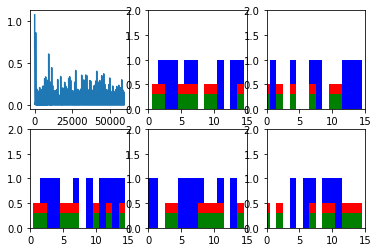

Step 400 Loss 4.57838e-05


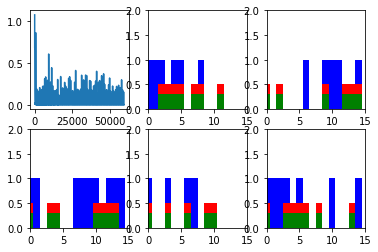

Step 500 Loss 4.77223e-05


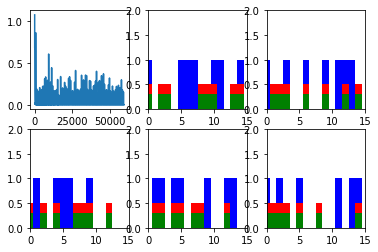

Step 600 Loss 4.40247e-05


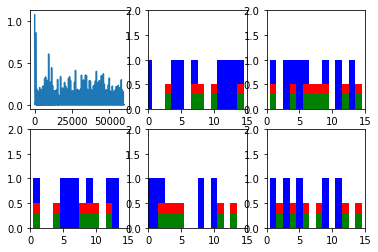

New data, epoch 90
Step 0 Loss 0.134392


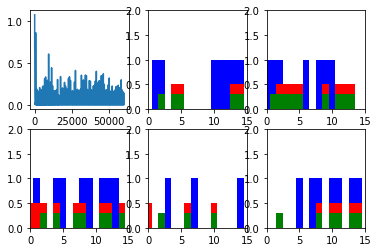

Step 100 Loss 3.91176e-05


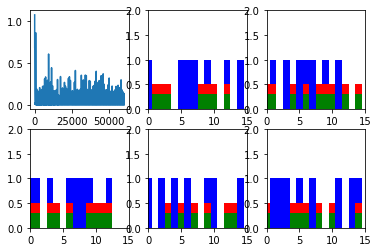

Step 200 Loss 4.44169e-05


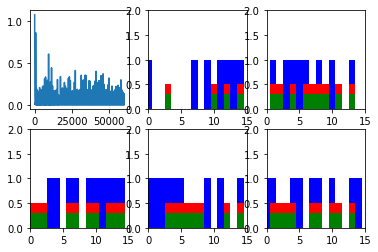

Step 300 Loss 4.03256e-05


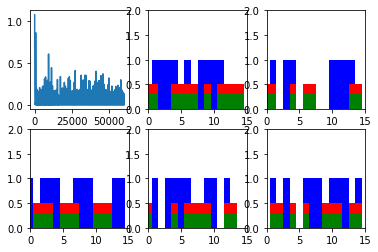

Step 400 Loss 4.8869e-05


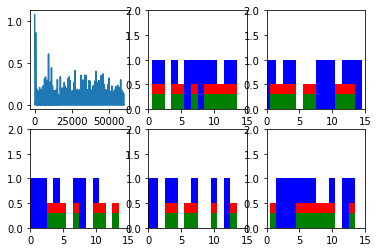

Step 500 Loss 3.18723e-05


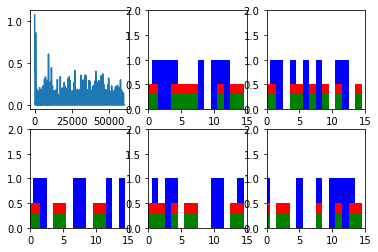

Step 600 Loss 5.30841e-05


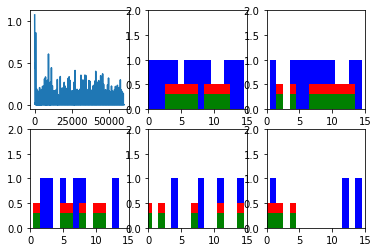

New data, epoch 91
Step 0 Loss 0.154506


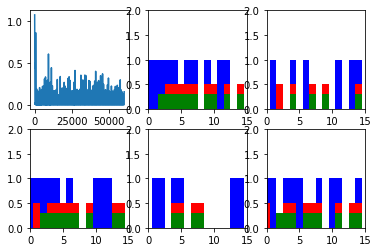

Step 100 Loss 5.38514e-05


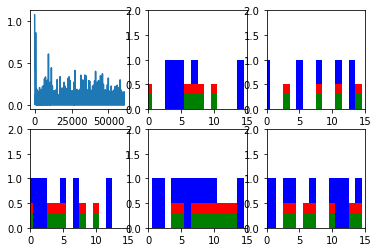

Step 200 Loss 6.56582e-05


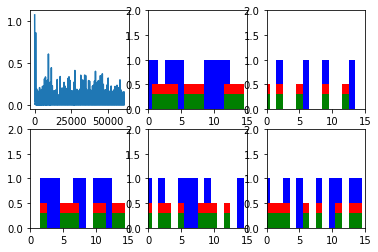

Step 300 Loss 6.16445e-05


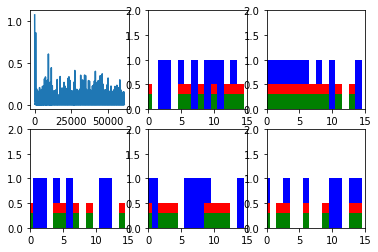

Step 400 Loss 4.8436e-05


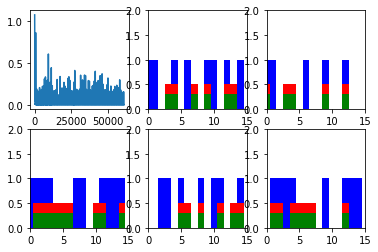

Step 500 Loss 3.73268e-05


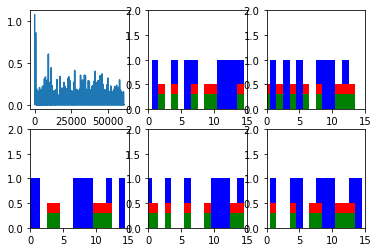

Step 600 Loss 5.77325e-05


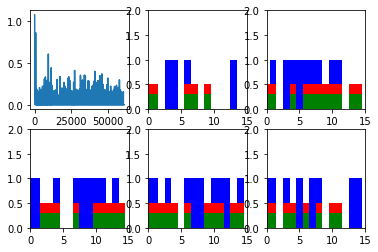

New data, epoch 92
Step 0 Loss 0.202538


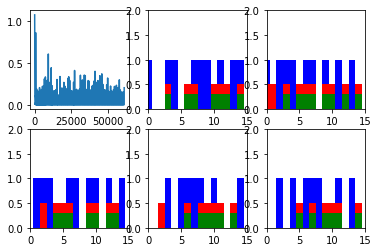

Step 100 Loss 5.07804e-05


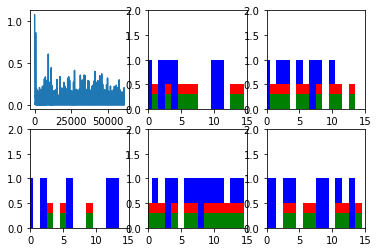

Step 200 Loss 4.95053e-05


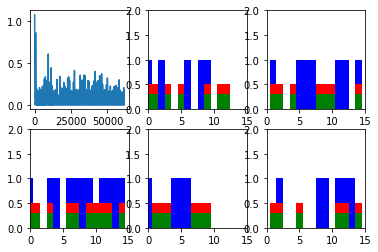

Step 300 Loss 5.1166e-05


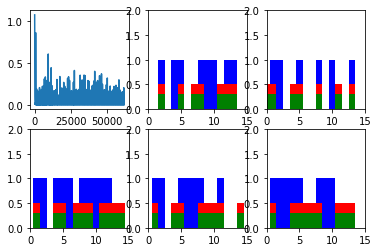

Step 400 Loss 4.58709e-05


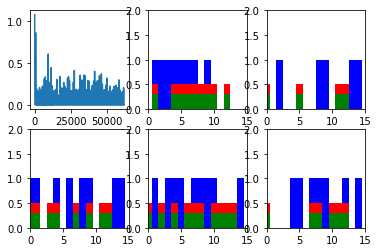

Step 500 Loss 4.6013e-05


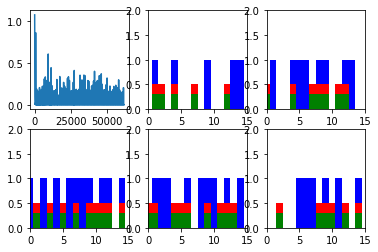

Step 600 Loss 5.00522e-05


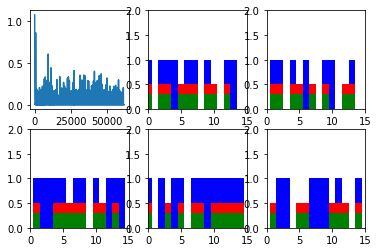

New data, epoch 93
Step 0 Loss 0.163677


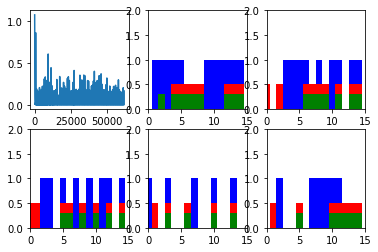

Step 100 Loss 3.70645e-05


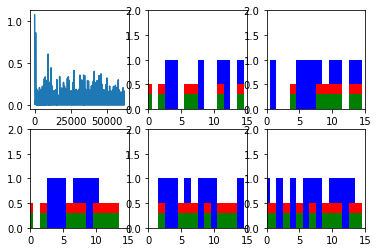

Step 200 Loss 3.75287e-05


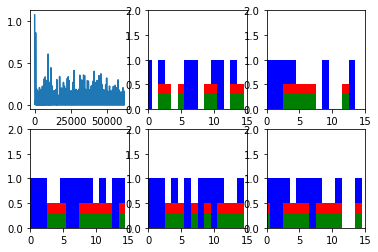

Step 300 Loss 4.01385e-05


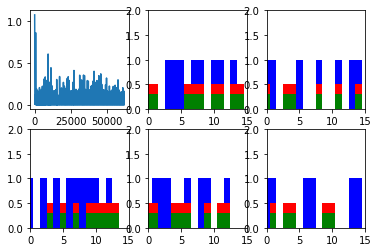

Step 400 Loss 5.70001e-05


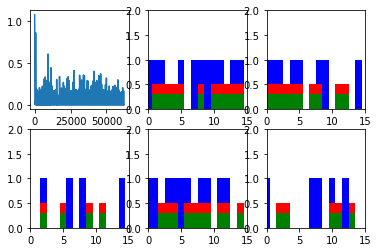

Step 500 Loss 4.07759e-05


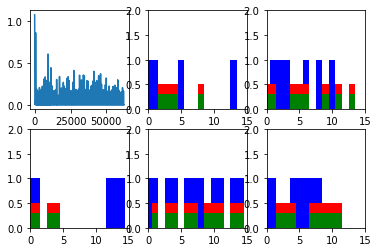

Step 600 Loss 4.41683e-05


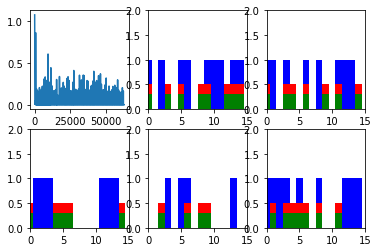

New data, epoch 94
Step 0 Loss 0.177907


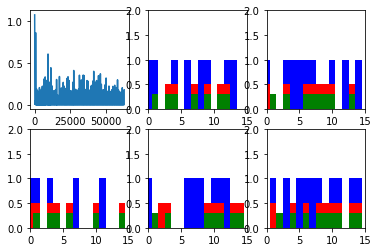

Step 100 Loss 3.92898e-05


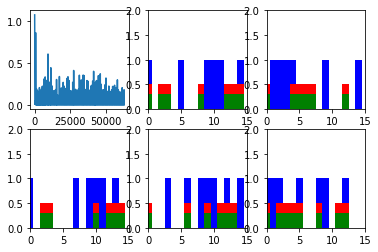

Step 200 Loss 3.53368e-05


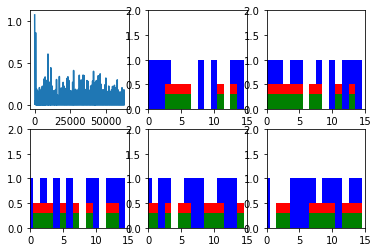

Step 300 Loss 4.13751e-05


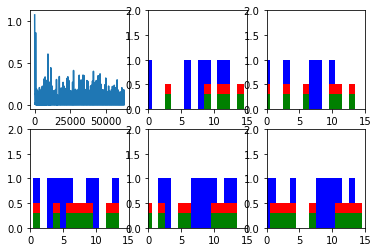

Step 400 Loss 3.63113e-05


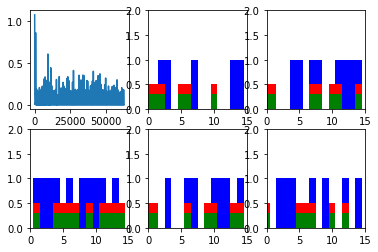

Step 500 Loss 3.91052e-05


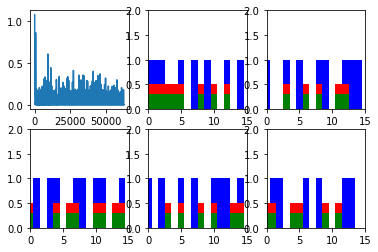

Step 600 Loss 3.46758e-05


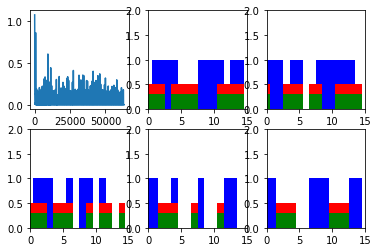

New data, epoch 95
Step 0 Loss 0.186947


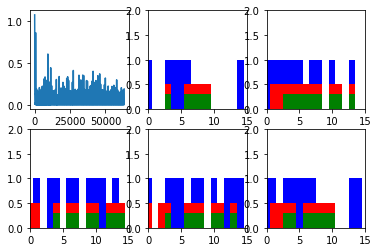

Step 100 Loss 5.92298e-05


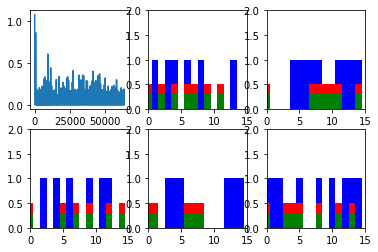

Step 200 Loss 4.22436e-05


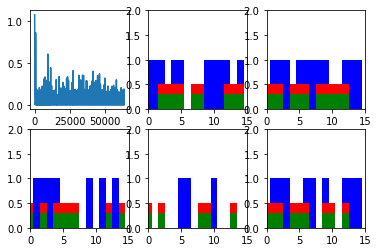

Step 300 Loss 5.05384e-05


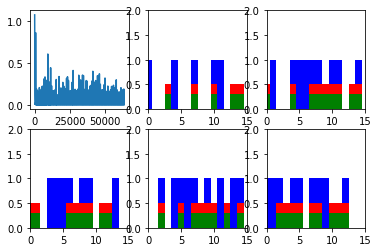

Step 400 Loss 5.01794e-05


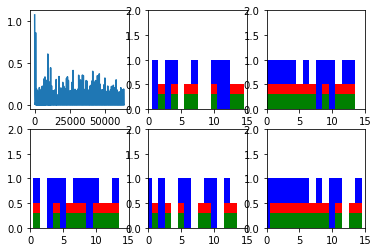

Step 500 Loss 3.78704e-05


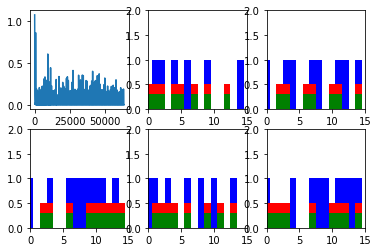

Step 600 Loss 5.28369e-05


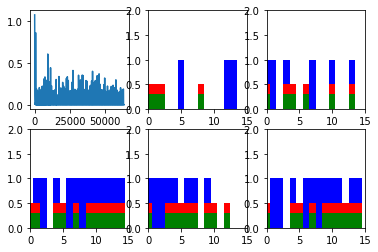

New data, epoch 96
Step 0 Loss 0.215081


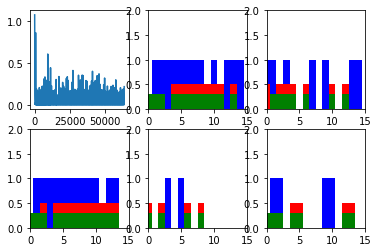

Step 100 Loss 4.1023e-05


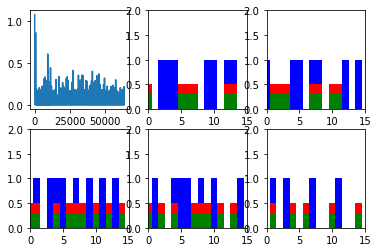

Step 200 Loss 4.59761e-05


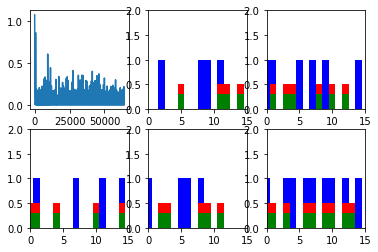

Step 300 Loss 4.48741e-05


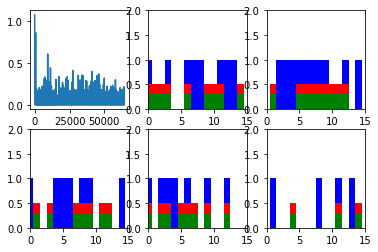

Step 400 Loss 4.47787e-05


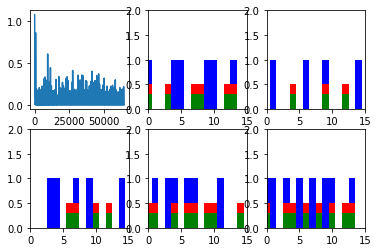

Step 500 Loss 4.9067e-05


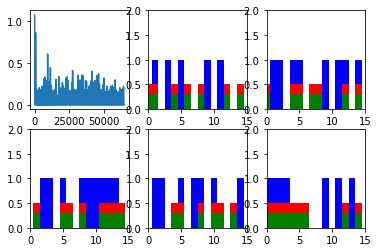

Step 600 Loss 4.1723e-05


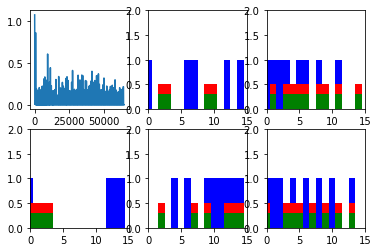

New data, epoch 97
Step 0 Loss 0.296952


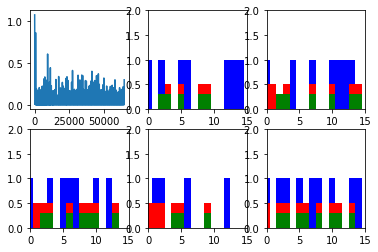

Step 100 Loss 4.12972e-05


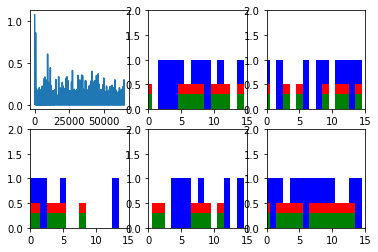

Step 200 Loss 3.91994e-05


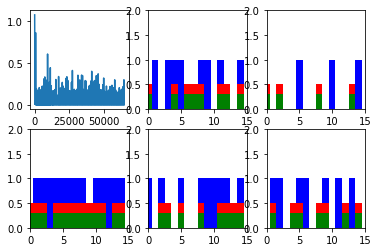

Step 300 Loss 3.1483e-05


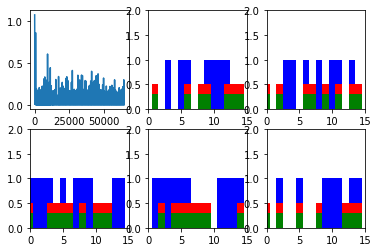

Step 400 Loss 3.69345e-05


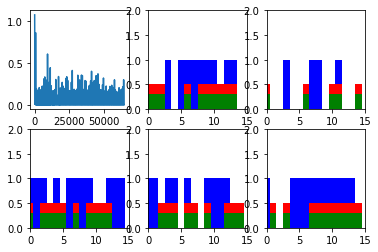

Step 500 Loss 3.78896e-05


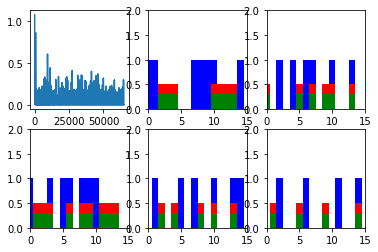

Step 600 Loss 4.1823e-05


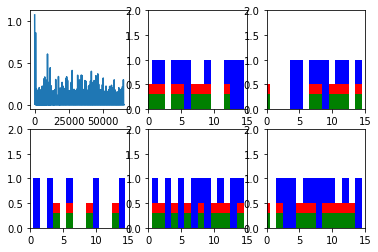

New data, epoch 98
Step 0 Loss 0.165632


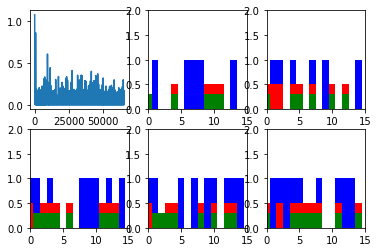

Step 100 Loss 4.16688e-05


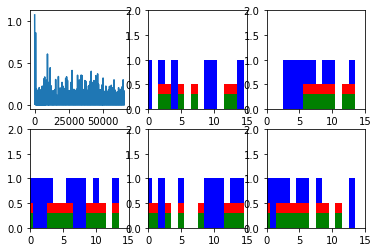

Step 200 Loss 3.55184e-05


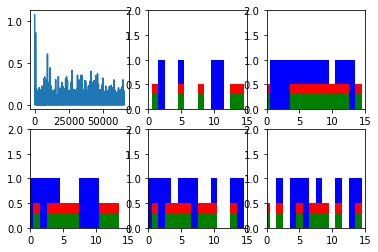

Step 300 Loss 4.12624e-05


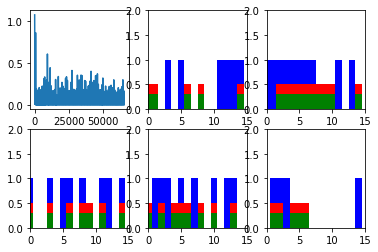

Step 400 Loss 3.65736e-05


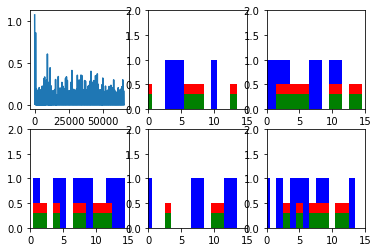

Step 500 Loss 4.25291e-05


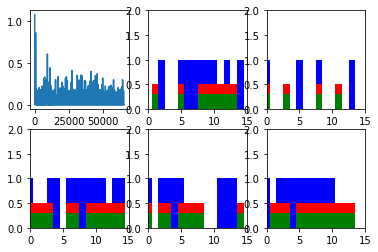

Step 600 Loss 3.83585e-05


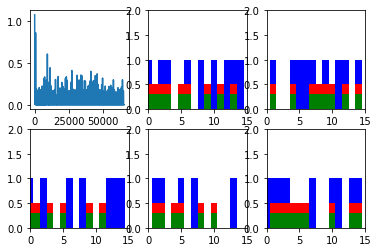

New data, epoch 99
Step 0 Loss 0.166703


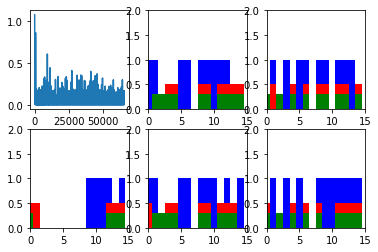

Step 100 Loss 3.71602e-05


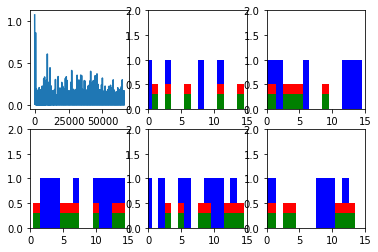

Step 200 Loss 4.16517e-05


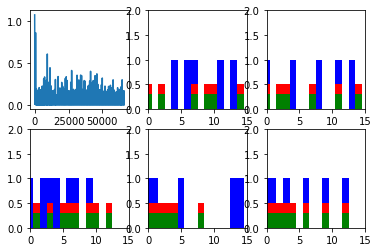

Step 300 Loss 3.91581e-05


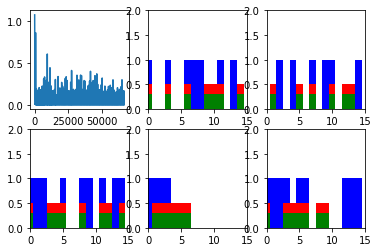

Step 400 Loss 4.73584e-05


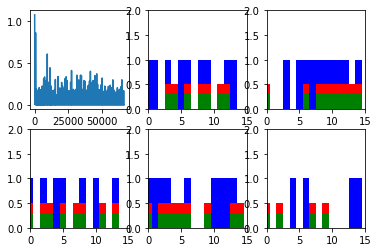

Step 500 Loss 3.76653e-05


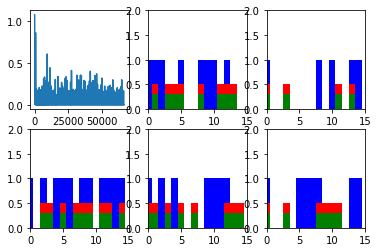

Step 600 Loss 5.16872e-05


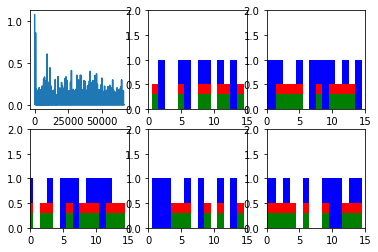

In [1]:

from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()


In [2]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()